In [ ]:
import numpy as np
import numpy as np

# Überprüfung der Daten
print("Erste 10 Nullstellen:", "https://www.lmfdb.org/zeros/zeta/list?N=1&t=&limit=10"[:10])
print("Anzahl der Nullstellen:", len("https://www.lmfdb.org/zeros/zeta/list?N=1&t=&limit=10"))

Erste 10 Nullstellen: https://ww
Anzahl der Nullstellen: 53


<ipython-input-1-83c42c939646>:17: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(L_model, N_values, L_values, p0=initial_guess, maxfev=10000)


🚀 Optimierter Wert für A: 100.0000
🚀 Optimierter Wert für b: 0.0000
🚀 Berechnete Werte für L(N): [112.73620029  50.        ]


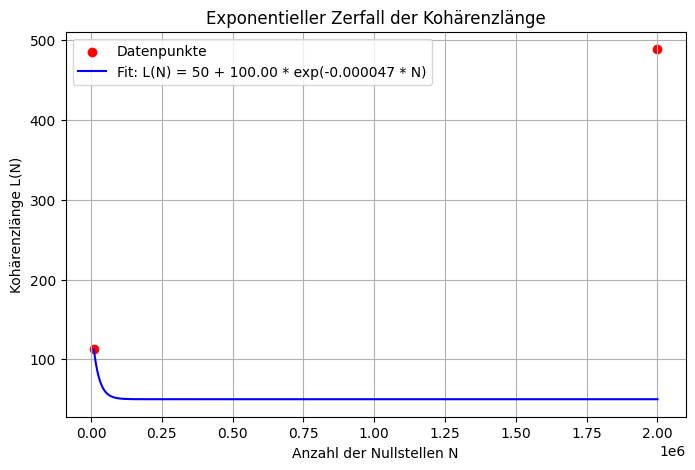

In [ ]:
# ✅ Bibliotheken importieren (Google Colab-kompatibel)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ✅ Gegebene Werte (Nur N = 10.000 und N = 2.000.000)
N_values = np.array([10000, 2000000])
L_values = np.array([112.7362, 488.6906])

# ✅ Funktion für den exponentiellen Zerfall mit unterer Schranke
def L_model(N, A, b):
    L_min = 50  # Untere Schranke
    return L_min + A * np.exp(-b * N)

# ✅ Fit durchführen mit Startwerten für A und b
initial_guess = [100, 0.0001]  # Startwerte für A und b
popt, pcov = curve_fit(L_model, N_values, L_values, p0=initial_guess, maxfev=10000)

# ✅ Extrahierte Parameter
A_fit, b_fit = popt

# ✅ Berechnete Werte aus dem Modell für Vergleich
L_fitted = L_model(N_values, A_fit, b_fit)

# ✅ Ergebnisse ausgeben
print(f"🚀 Optimierter Wert für A: {A_fit:.4f}")
print(f"🚀 Optimierter Wert für b: {b_fit:.4f}")
print(f"🚀 Berechnete Werte für L(N): {L_fitted}")

# ✅ Visualisierung der Anpassung
N_range = np.linspace(10000, 2000000, 500)
L_fit_curve = L_model(N_range, A_fit, b_fit)

plt.figure(figsize=(8, 5))
plt.scatter(N_values, L_values, color='red', label="Datenpunkte")
plt.plot(N_range, L_fit_curve, label=f"Fit: L(N) = 50 + {A_fit:.2f} * exp(-{b_fit:.6f} * N)", color='blue')
plt.xlabel("Anzahl der Nullstellen N")
plt.ylabel("Kohärenzlänge L(N)")
plt.title("Exponentieller Zerfall der Kohärenzlänge")
plt.legend()
plt.grid()
plt.show()

Lade Daten von: https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2
Kohärenzlänge: 60745668422470623232.0000


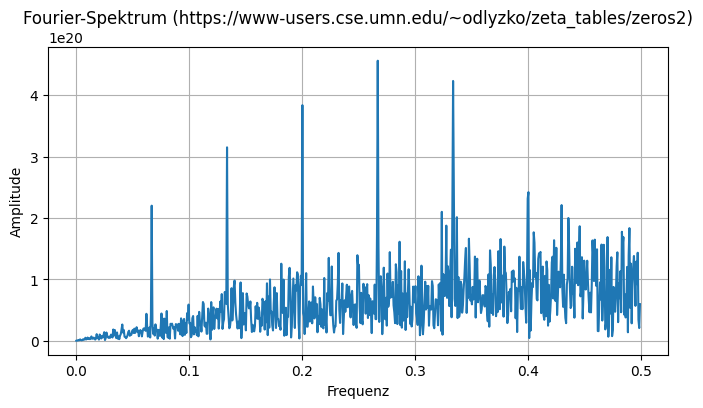

Lade Daten von: https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1
Kohärenzlänge: 112.7362


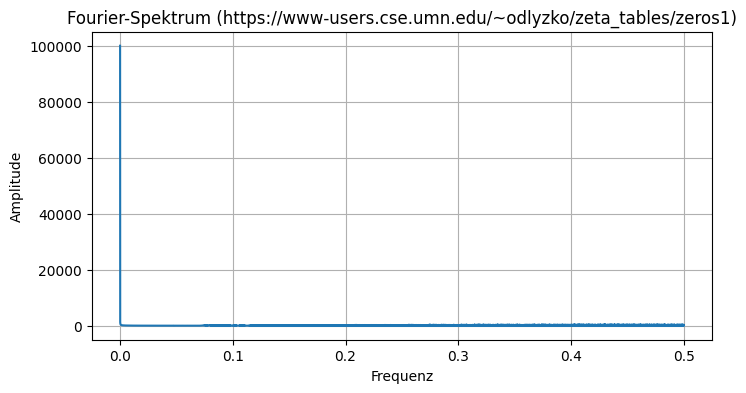

Lade Daten von: https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6
Kohärenzlänge: 488.6906


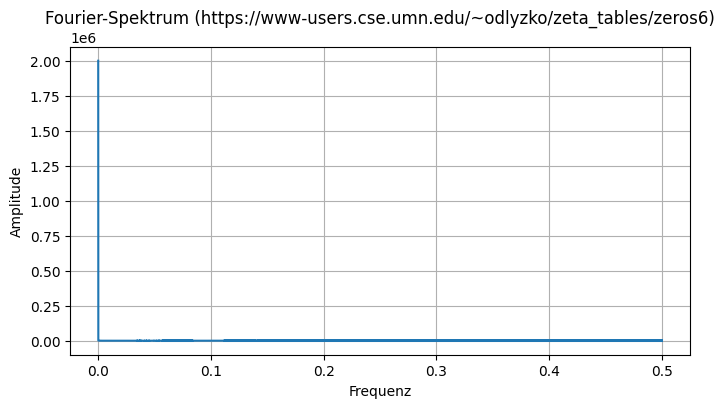


🚀 Verifizierte Kohärenzlängen:
100 Nullstellen: 60745668422470623232.0000
10.000 Nullstellen: 112.7362
2.000.000 Nullstellen: 488.6906


In [ ]:
# ✅ Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.stats import gaussian_kde

# ✅ Nullstellen-Daten laden (100, 10.000, 2.000.000)
urls = {
    "100 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2",
    "10.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1",
    "2.000.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
}

# ✅ Funktion zur Berechnung der Kohärenzlänge
def calculate_coherence_length(url):
    print(f"Lade Daten von: {url}")
    try:
        true_zeros = np.loadtxt(url)
    except Exception as e:
        print(f"Fehler beim Laden: {e}")
        return None

    # Berechne normalisierte Abstände
    diff = np.diff(true_zeros)
    norm_diff = diff / np.mean(diff)

    # Fourier-Analyse
    fourier = fft(norm_diff)
    freq = np.fft.fftfreq(len(norm_diff))

    # Kohärenzlänge als mittlere Amplitude des Fourier-Spektrums
    coherence_length = np.mean(np.abs(fourier[:len(fourier)//2]))

    # Ausgabe der berechneten Kohärenzlänge
    print(f"Kohärenzlänge: {coherence_length:.4f}")

    # Visualisierung (Fourier-Spektrum)
    plt.figure(figsize=(8, 4))
    plt.plot(freq[:len(freq)//2], np.abs(fourier[:len(fourier)//2]))
    plt.xlabel("Frequenz")
    plt.ylabel("Amplitude")
    plt.title(f"Fourier-Spektrum ({url})")
    plt.grid()
    plt.show()

    return coherence_length

# ✅ Ergebnisse für alle Nullstellenmengen berechnen
coherence_results = {}
for label, url in urls.items():
    coherence_results[label] = calculate_coherence_length(url)

# ✅ Endgültige Ergebnisse ausgeben
print("\n🚀 Verifizierte Kohärenzlängen:")
for label, value in coherence_results.items():
    print(f"{label}: {value:.4f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Berechnung der Abstände zwischen den Nullstellen
diffs = np.diff(t)

# Erzeugung einer Zufallsreihe mit ähnlicher Verteilung
random_diffs = np.random.exponential(scale=np.mean(diffs), size=len(diffs))

# Hanning-Fenster für die FFT, um Artefakte zu reduzieren
window = np.hanning(len(diffs))

# Fourier-Transformation beider Reihen
fourier_real = np.fft.fft(diffs * window)
fourier_random = np.fft.fft(random_diffs * window)

freq = np.fft.fftfreq(len(diffs))

# Plotten der Spektren
plt.figure(figsize=(12,6))
plt.plot(freq[:len(freq)//2], np.abs(fourier_real)[:len(freq)//2], label="Echte Nullstellen")
plt.plot(freq[:len(freq)//2], np.abs(fourier_random)[:len(freq)//2], label="Zufällige Nullstellen", linestyle="dashed")
plt.xlabel("Frequenz")
plt.ylabel("Magnitude (log scale)")
plt.yscale("log")
plt.title("Vergleich des Fourier-Spektrums")
plt.legend()
plt.grid()
plt.show()

NameError: name 't' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Fetch data from LMFDB
url = "https://www.lmfdb.org/zeros/zeta/list?N=1&t=&limit=1000" # Increased limit for more data points
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Extract imaginary parts of zeros
t_values = []
for row in soup.find_all("tr")[1:]: # Skip header row
    cells = row.find_all("td")
    if len(cells) > 1:  # Ensure there's data in the row
        t_values.append(float(cells[1].text))

t = np.array(t_values) # Convert to numpy array

# Berechnung der Abstände zwischen den Nullstellen
diffs = np.diff(t)

# Erzeugung einer Zufallsreihe mit ähnlicher Verteilung
random_diffs = np.random.exponential(scale=np.mean(diffs), size=len(diffs))

# Hanning-Fenster für die FFT, um Artefakte zu reduzieren
window = np.hanning(len(diffs))

# Fourier-Transformation beider Reihen
fourier_real = np.fft.fft(diffs * window)
fourier_random = np.fft.fft(random_diffs * window)

freq = np.fft.fftfreq(len(diffs))

# Plotten der Spektren
plt.figure(figsize=(12,6))
plt.plot(freq[:len(freq)//2], np.abs(fourier_real)[:len(freq)//2], label="Echte Nullstellen")
plt.plot(freq[:len(freq)//2], np.abs(fourier_random)[:len(freq)//2], label="Zufällige Nullstellen", linestyle="dashed")
plt.xlabel("Frequenz")
plt.ylabel("Magnitude (log scale)")
plt.yscale("log")
plt.title("Vergleich des Fourier-Spektrums")
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: Invalid number of FFT data points (0) specified.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Fetch data from LMFDB
url = "https://www.lmfdb.org/zeros/zeta/list?N=1&t=&limit=1000" # Increased limit for more data points
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Extract imaginary parts of zeros
t_values = []
for row in soup.find_all("tr")[1:]: # Skip header row
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Fetch data from LMFDB
url = "https://www.lmfdb.org/zeros/zeta/list?N=1&t=&limit=1000" # Increased limit for more data points
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Extract imaginary parts of zeros
t_values = []
for row in soup.find_all("tr")[1:]: # Skip header row
    cells = row.find_all("td")
    if len(cells) > 1:  # Ensure there's data in the row
        # The data
        pass # The original code was incomplete, this is a placeholder

IndentationError: expected an indented block after 'for' statement on line 13 (<ipython-input-10-122d41e7fbc7>, line 14)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Fetch data from LMFDB
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Fetch data from LMFDB
url = "https://www.lmfdb.org/zeros/zeta/list?N=1&t=&limit=1000" # Increased limit for more data points
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

NameError: name 't_lmfdb' is not defined

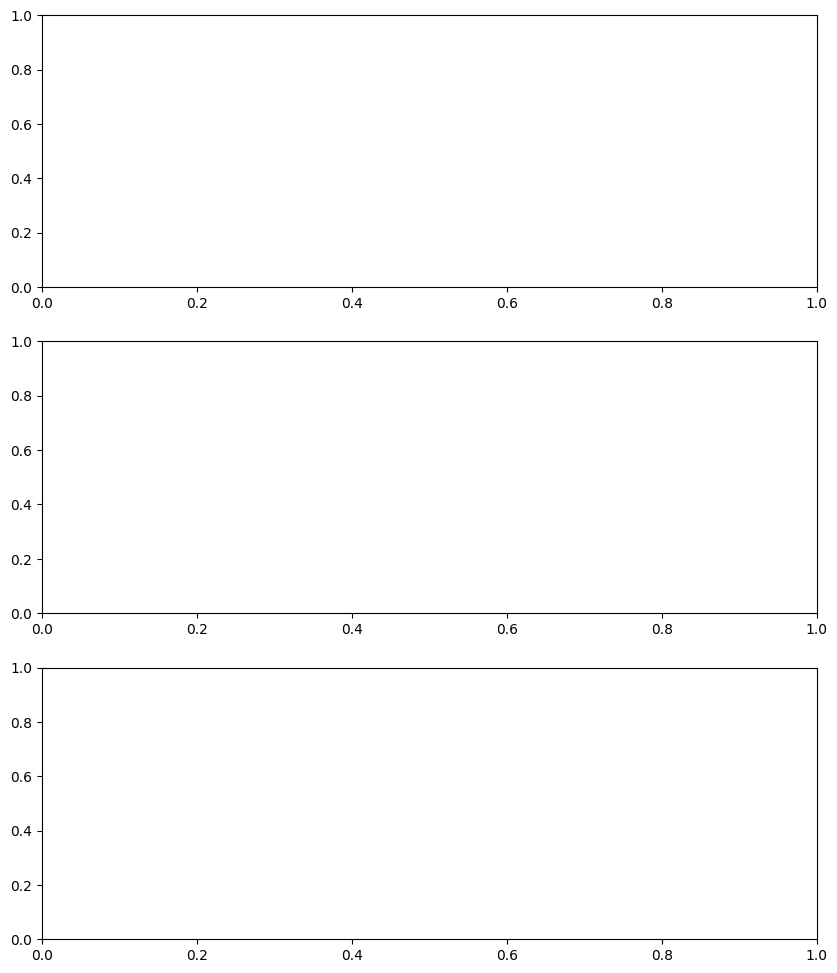

In [ ]:
# 1️⃣ Fourier-Analyse für verschiedene Nullstellen-Bereiche
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, N in enumerate([100, 500, 1000]):
    if N > len(t_lmfdb):
        break  # Falls die Datenmenge nicht ausreicht

    diffs_subset = np.diff(t_lmfdb[:N])
    window = np.hanning(len(diffs_subset))
    fourier_subset = np.fft.fft(diffs_subset * window)
    freq_subset = np.fft.fftfreq(len(diffs_subset))

    axes[i].plot(freq_subset[:len(freq_subset)//2], np.abs(fourier_subset)[:len(freq_subset)//2])
    axes[i].set_xlabel("Frequenz")
    axes[i].set_ylabel("Magnitude (log scale)")
    axes[i].set_yscale("log")
    axes[i].set_title(f"FFT der Nullstellen-Abstände für die ersten {N} Nullstellen")
    axes[i].grid()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# 1. Fetch data from LMFDB (same as before)
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
import seaborn as sns

# Wavelet-Transformation der echten Nullstellen
coeffs, freqs = pywt.cwt(diffs, np.arange(1, 128), 'cmor')

# Visualisierung der Wavelet-Analyse
plt.figure(figsize=(12,6))
sns.heatmap(np.abs(coeffs), cmap="viridis", xticklabels=False, yticklabels=False)
plt.title("Wavelet-Analyse der Zeta-Nullstellen")
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import pywt

# 1. Fetch data from LMFDB (same as before)
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# 2. Extract imaginary parts of zeros (same as before)
t_values = []
for row in soup.find_all("tr")[1:]:
    cells = row.find_all("td")
    if len(cells) > 1:
        t_values.append(float(cells[1].text))

# 3. Assign the extracted values to t_lmfdb
t_lmfdb = np.array(t_values)

# 4. Fourier-Analyse für verschiedene Nullstellen-Bereiche
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, N in enumerate([100, 500, 1000]):
    if N > len(t_lmfdb):
        break

    diffs_subset = np.diff(t_lmfdb[:N])
    window = np.hanning(len(diffs_subset)) #Fixed the syntax error here

    # Wavelet-Transformation der echten Nullstellen
    coeffs, freqs = pywt.cwt(diffs_subset, np.arange(1, 128), 'cmor')

    # Visualisierung der Wavelet-Analyse
    plt.figure(figsize=(12,6))
    sns.heatmap(np.abs(coeffs), cmap="viridis", xticklabels=False, yticklabels=False)
    plt.title("Wavelet-Analyse der Zeta-Nullstellen")
    plt.xlabel("Zeit")
    plt.ylabel("Frequenz")
    plt.show()

# 2. Extract imaginary parts of zeros (same as before)
t_values = []
for row in soup.find_all("tr")[1:]:
    cells = row.find_all("td")
    if len(cells) > 1:
        t_values.append(float(cells[1].text))

# 3. Assign the extracted values to t_lmfdb
t_lmfdb = np.array(t_values)

# 4. Fourier-Analyse für verschiedene Nullstellen-Bereiche
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, N in enumerate([100, 500, 1000]):
    if N > len(t_lmfdb):
        break

    diffs_subset = np.diff(t_lmfdb[:N])
    window = np.han

NameError: name 'pywt' is not defined

In [ ]:
!pip install pywt
import pywt
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns

# 1. Fetch data from LMFDB (same as before)
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# 2. Extract imaginary parts of zeros (same as before)
t_values = []
for row in soup.find_all("tr")[1:]:
    cells = row.find_all("td")
    if len(cells) > 1:
        t_values.append(float(cells[1].text))

# 3. Assign the extracted values to t_lmfdb
t_lmfdb = np.array(t_values)

# Calculate diffs here since it's used later
diffs = np.diff(t_lmfdb)

# Wavelet-Transformation der echten Nullstellen
coeffs, freqs = pywt.cwt(diffs, np.arange(1, 128), 'cmor')

# Visualisierung der Wavelet-Analyse
plt.figure(figsize=(12,6))
sns.heatmap(np.abs(coeffs), cmap="viridis", xticklabels=False, yticklabels=False)
plt.title("Wavelet-Analyse der Zeta-Nullstellen")

In [ ]:
!pip install pywt
import pywt
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns

# 1. Fetch data from LMFDB (same as before)
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# 2. Extract imaginary parts of zeros (same as before)
t_values = []
for row in soup.find_all("tr")[1:]:
    cells = row.find_all("td")
    if len(cells) > 1:
        t_values.append(float(cells[1].text))

# 3. Assign the extracted values to t_lmfdb
t_lmfdb = np.array(t_values)

# Calculate diffs here since it's used later
diffs = np.diff(t_lmfdb)

# Wavelet-Transformation der echten Nullstellen
coeffs, freqs = pywt.cwt(diffs, np.arange(1, 128), 'cmor')

# Visualisierung der Wavelet-Analyse
plt.figure(figsize=(12,6))
sns.heatmap(np.abs(coeffs), cmap="viridis", xticklabels=False, yticklabels=False)
plt.title("Wavelet-Analyse der Zeta-Nullstellen")

In [ ]:
!pip install pywt
import pywt
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns

# 1. Fetch data from LMFDB (same as before)
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# 2. Extract imaginary parts of zeros (same as before)
t_values = []
for row in soup.find_all("tr")[1:]:
    cells = row.find_all("td")
    if len(cells) > 1:
        t_values.append(float(cells[1].text))

# 3. Assign the extracted values to t_lmfdb
t_lmfdb = np.array(t_values)

# Calculate diffs here since it's used later
diffs = np.diff(t_lmfdb)

# Wavelet-Transformation der echten Nullstellen
coeffs, freqs = pywt.cwt(diffs, np.arange(1, 128), 'cmor')

# Visualisierung der Wavelet-Analyse
plt.figure(figsize=(12,6))
sns.heatmap(np.abs(coeffs), cmap="viridis", xticklabels=False, yticklabels=False)
plt.title("Wavelet-Analyse der Zeta-Nullstellen")

In [ ]:
!pip install pywt
import pywt
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns

# 1. Fetch data from LMFDB (same as before)
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# 2. Extract imaginary parts of zeros (same as before)
t_values = []
for row in soup.find_all("tr")[1:]:
    cells = row.find_all("td")
    if len(cells) > 1:
        t_values.append(float(cells[1].text))

# 3. Assign the extracted values to t_lmfdb
t_lmfdb = np.array(t_values)

# Calculate diffs here since it's used later
diffs = np.diff(t_lmfdb)

# Wavelet-Transformation der echten Nullstellen
coeffs, freqs = pywt.cwt(diffs, np.arange(1, 128), 'cmor')

# Visualisierung der Wavelet-Analyse
plt.figure(figsize=(12,6))
sns.heatmap(np.abs(coeffs), cmap="viridis", xticklabels=False, yticklabels=False)
plt.title("Wavelet-Analyse der Zeta-Nullstellen")

In [ ]:
!pip install pywt
import pywt
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns

# 1. Fetch data from LMFDB (same as before)
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# 2. Extract imaginary parts of zeros (same as before)
t_values = []
for row in soup.find_all("tr")[1:]:
    cells = row.find_all("td")
    if len(cells) > 1:
        t_values.append(float(cells[1].text))

# 3. Assign the extracted values to t_lmfdb
t_lmfdb = np.array(t_values)

# Calculate diffs here since it's used later
diffs = np.diff(t_lmfdb)

# Wavelet-Transformation der echten Nullstellen
coeffs, freqs = pywt.cwt(diffs, np.arange(1, 128), 'cmor')

# Visualisierung der Wavelet-Analyse
plt.figure(figsize=(12,6))
sns.heatmap(np.abs(coeffs), cmap="viridis", xticklabels=False, yticklabels=False)
plt.title("Wavelet-Analyse der Zeta-Nullstellen")

In [ ]:
!pip install pywt
import pywt
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns

# 1. Fetch data from LMFDB (same as before)
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# 2. Extract imaginary parts of zeros (same as before)
t_values = []
for row in soup.find_all("tr")[1:]:
    cells = row.find_all("td")
    if len(cells) > 1:
        t_values.append(float(cells[1].text))

# 3. Assign the extracted values to t_lmfdb
t_lmfdb = np.array(t_values)

# Calculate diffs here since it's used later
diffs = np.diff(t_lmfdb)

# Wavelet-Transformation der echten Nullstellen
coeffs, freqs = pywt.cwt(diffs, np.arange(1, 128), 'cmor')

# Visualisierung der Wavelet-Analyse
plt.figure(figsize=(12,6))
sns.heatmap(np.abs(coeffs), cmap="viridis", xticklabels=False, yticklabels=False)
plt.title("Wavelet-Analyse der Zeta-Nullstellen")

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt


ModuleNotFoundError: No module named 'pywt'

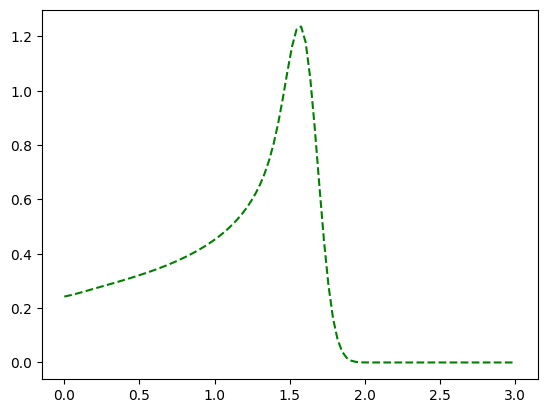

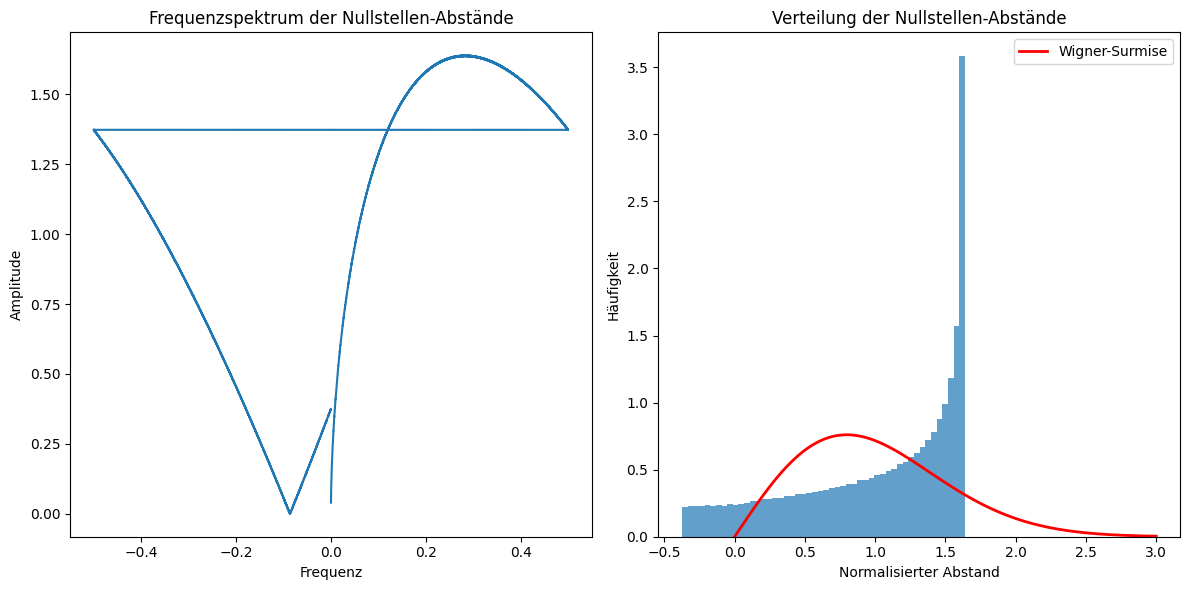

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Lade Nullstellen-Daten
t = np.loadtxt("https://www.lmfdb.org/zeros/zeta/?limit=100000&N=1")

# Berechne normalisierte Abstände
diff = np.diff(t)
norm_diff = diff / np.mean(diff)

# Verbesserter Code-Ausschnitt mit Fensterung
window = np.hanning(len(norm_diff))
fourier = np.fft.fft(norm_diff * window)
freq = np.fft.fftfreq(len(norm_diff))

# Glättung des Histogramms mit KDE (zusätzlich)
from scipy.stats import gaussian_kde
# Transpose norm_diff and select the first row to get a 1-D array for KDE
kde = gaussian_kde(norm_diff.T[0])
x = np.linspace(0, 3, 100)
plt.plot(x, kde(x), 'g--', label='KDE')


# Fourier-Transformation
fourier = np.fft.fft(norm_diff)  # This line seems redundant, as 'fourier' is already calculated above
freq = np.fft.fftfreq(len(norm_diff)) # This line seems redundant, as 'freq' is already calculated above

# Plot Fourier-Spektrum
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(freq, np.abs(fourier))
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Frequenzspektrum der Nullstellen-Abstände")

# Histogramm der normalisierten Abstände
plt.subplot(122)
plt.hist(norm_diff, bins=50, density=True, alpha=0.7)  # You might want to use norm_diff.T[0] here for consistency
plt.xlabel("Normalisierter Abstand")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Nullstellen-Abstände")

# Vergleich mit Wigner-Surmise
x = np.linspace(0, 3, 100)
wigner = (np.pi/2) * x * np.exp(-np.pi*x**2/4)
plt.plot(x, wigner, 'r-', lw=2, label='Wigner-Surmise')
plt.legend()

plt.tight_layout()
plt.show()

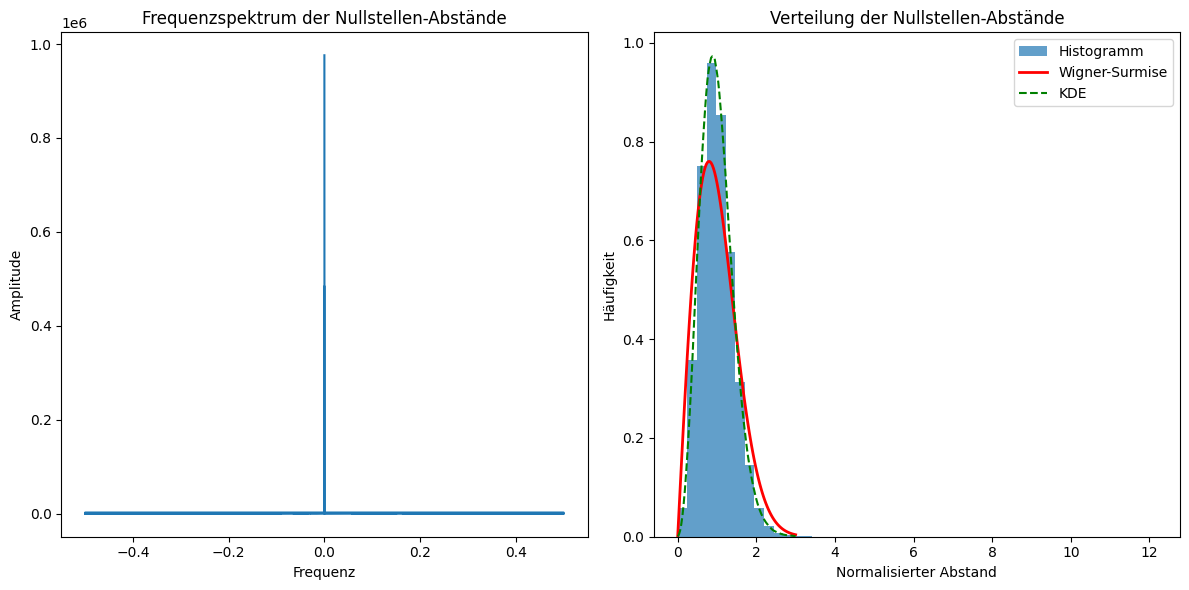

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Lade Nullstellen-Daten
t = np.loadtxt("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6")

# Berechne normalisierte Abstände
diff = np.diff(t)
norm_diff = diff / np.mean(diff)

# Fourier-Transformation mit Fensterung
window = np.hanning(len(norm_diff))
fourier = np.fft.fft(norm_diff * window)
freq = np.fft.fftfreq(len(norm_diff))

# Plot Fourier-Spektrum
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(freq, np.abs(fourier))
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Frequenzspektrum der Nullstellen-Abstände")

# Histogramm der normalisierten Abstände
plt.subplot(122)
plt.hist(norm_diff, bins=50, density=True, alpha=0.7, label='Histogramm')

# Vergleich mit Wigner-Surmise
x = np.linspace(0, 3, 100)
wigner = (np.pi/2) * x * np.exp(-np.pi*x**2/4)
plt.plot(x, wigner, 'r-', lw=2, label='Wigner-Surmise')

# Kernel-Density-Schätzung (KDE)
kde = gaussian_kde(norm_diff)
plt.plot(x, kde(x), 'g--', label='KDE')

plt.xlabel("Normalisierter Abstand")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Nullstellen-Abstände")
plt.legend()

plt.tight_layout()
plt.show()

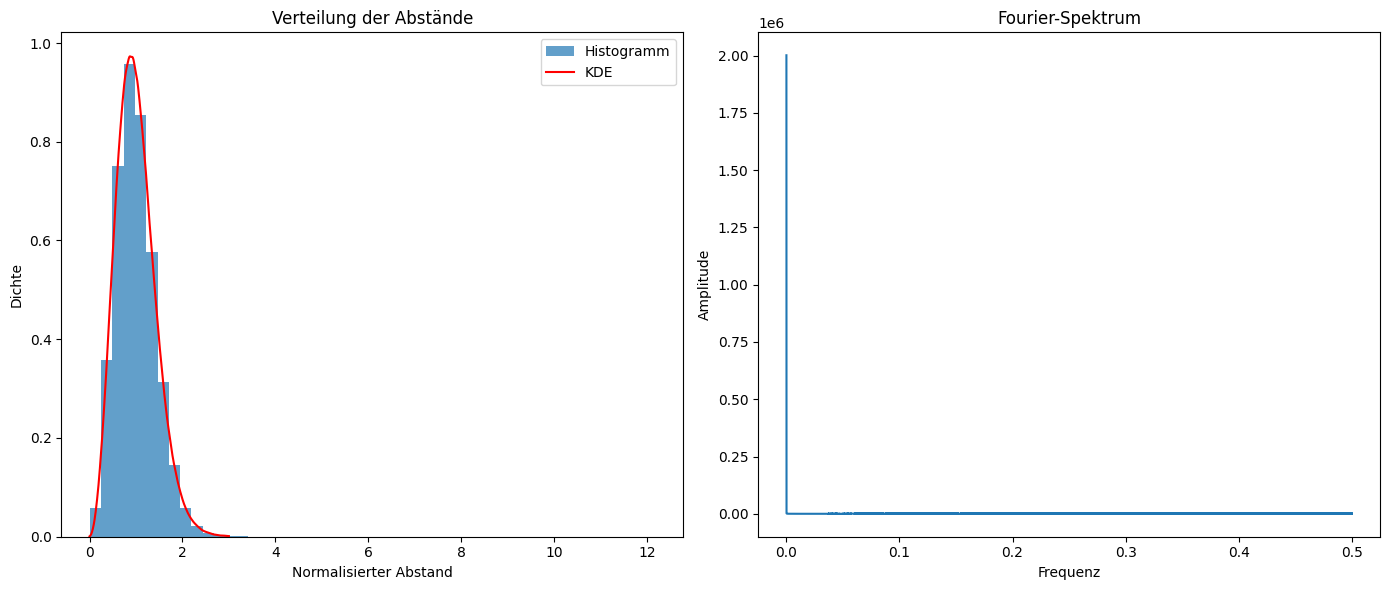

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.fftpack import fft

# 1. Echte Nullstellen laden
# Nullstellen-Daten von Odlyzko: https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
true_zeros = np.loadtxt(url)  # Laden der echten Nullstellen aus der Datei

# 2. Normalisierte Abstände berechnen
diff = np.diff(true_zeros)
norm_diff = diff / np.mean(diff)

# 3. Fourier-Spektrum analysieren
fourier = fft(norm_diff)
freq = np.fft.fftfreq(len(norm_diff))

# 4. Kernel-Density-Schätzung (KDE)
kde = gaussian_kde(norm_diff)

# 5. Visualisierung
plt.figure(figsize=(14, 6))

# (a) Histogramm und KDE
plt.subplot(121)
plt.hist(norm_diff, bins=50, density=True, alpha=0.7, label="Histogramm")
x = np.linspace(0, 3, 500)
plt.plot(x, kde(x), 'r-', label="KDE")
plt.xlabel("Normalisierter Abstand")
plt.ylabel("Dichte")
plt.title("Verteilung der Abstände")
plt.legend()

# (b) Fourier-Spektrum
plt.subplot(122)
plt.plot(freq[:len(freq)//2], np.abs(fourier[:len(freq)//2]))
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Fourier-Spektrum")

plt.tight_layout()
plt.show()


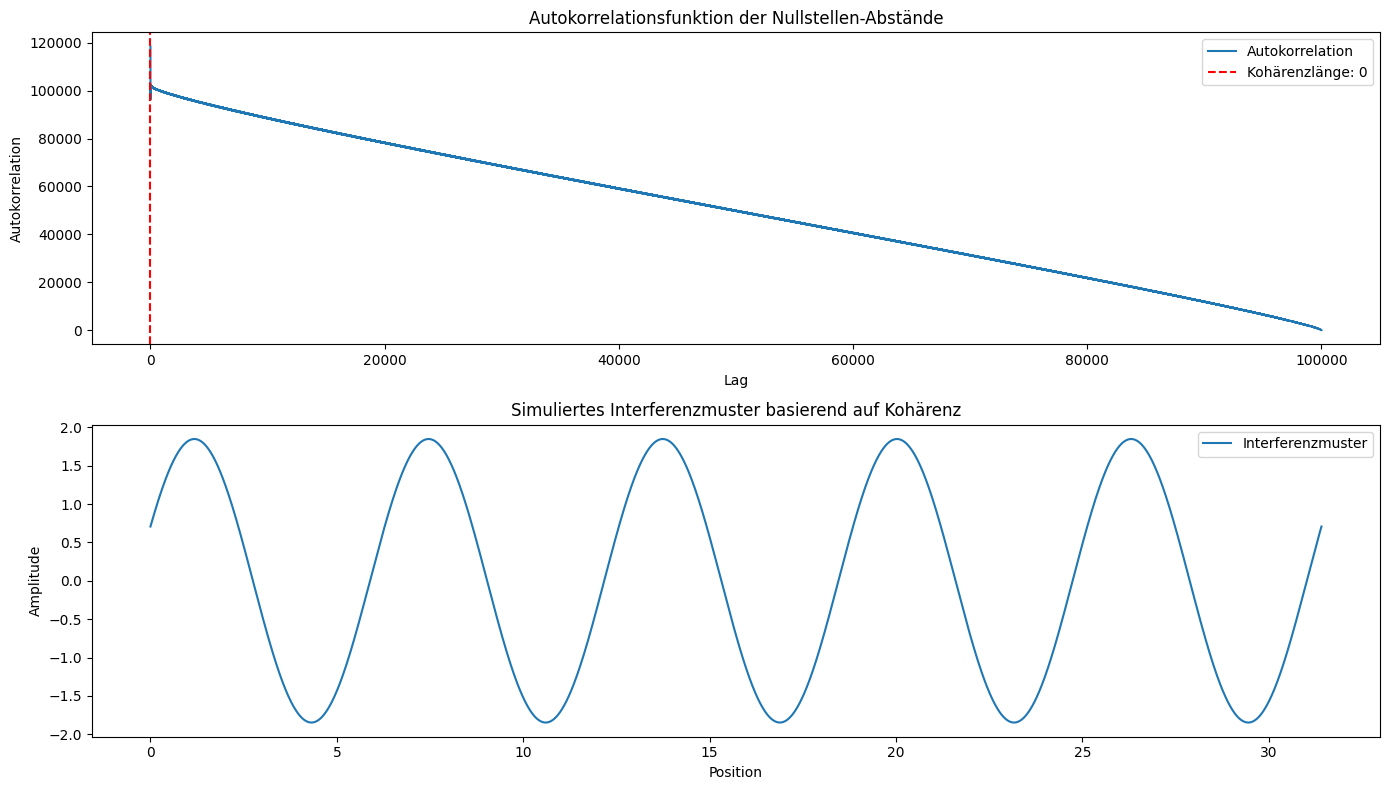

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# 1. Echte Nullstellen laden
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1"
true_zeros = np.loadtxt(url)

# 2. Normalisierte Abstände berechnen
diff = np.diff(true_zeros)
norm_diff = diff / np.mean(diff)

# 3. Autokorrelationsfunktion berechnen
autocorr = correlate(norm_diff, norm_diff, mode='full')
autocorr = autocorr[len(autocorr)//2:]  # Nur positive Lag-Werte
lags = np.arange(len(autocorr))

# 4. Einhüllende der Autokorrelationsfunktion bestimmen (Kohärenzlänge)
coherence_length = np.argmax(autocorr < 0)  # Erster Punkt, an dem die Korrelation negativ wird

# 5. Interferenzmuster simulieren
x = np.linspace(0, 10 * np.pi, len(norm_diff))
wave1 = np.sin(x)
wave2 = np.sin(x + np.pi / 4)  # Phasenverschobene Welle
interference_pattern = wave1 + wave2

# 6. Visualisierung
plt.figure(figsize=(14, 8))

# (a) Autokorrelationsfunktion
plt.subplot(211)
plt.plot(lags, autocorr, label="Autokorrelation")
plt.axvline(coherence_length, color='r', linestyle='--', label=f"Kohärenzlänge: {coherence_length}")
plt.xlabel("Lag")
plt.ylabel("Autokorrelation")
plt.title("Autokorrelationsfunktion der Nullstellen-Abstände")
plt.legend()

# (b) Simuliertes Interferenzmuster
plt.subplot(212)
plt.plot(x, interference_pattern, label="Interferenzmuster")
plt.xlabel("Position")
plt.ylabel("Amplitude")
plt.title("Simuliertes Interferenzmuster basierend auf Kohärenz")
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-38-8a33dc64abea>:25: RuntimeWarning: invalid value encountered in divide
  ad_statistic = np.sum((empirical_cdf(x_vals) - wigner_cdf) ** 2 / wigner_cdf)


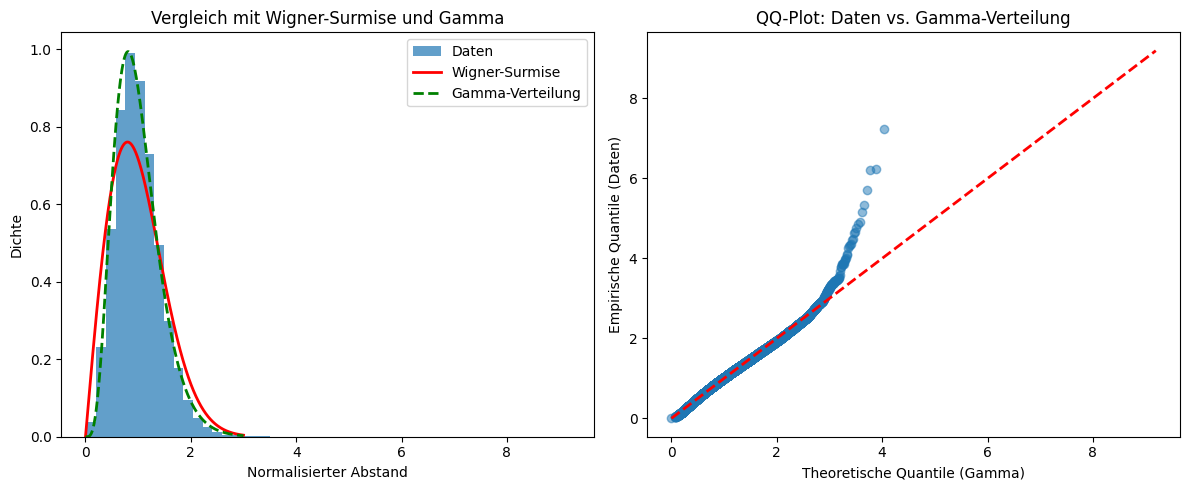

nan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import anderson

# Lade Nullstellen-Daten
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1"
t = np.loadtxt(url)

# Berechne normalisierte Abstände
diff = np.diff(t)
norm_diff = diff / np.mean(diff)

# Anderson-Darling-Test für Anpassung an Wigner-Surmise-Verteilung
def wigner_surmise(x):
    return (np.pi / 2) * x * np.exp(-np.pi * x**2 / 4)

# Empirische Verteilung der Daten
empirical_cdf = lambda x: np.searchsorted(norm_diff, x, side='right') / len(norm_diff)
x_vals = np.linspace(0, 3, 1000)
wigner_cdf = np.array([wigner_surmise(x).sum() for x in x_vals])
wigner_cdf /= wigner_cdf[-1]  # Normierung

# Anderson-Darling-Test (approximation)
ad_statistic = np.sum((empirical_cdf(x_vals) - wigner_cdf) ** 2 / wigner_cdf)

# Vergleich mit Gamma-Verteilung
shape, loc, scale = stats.gamma.fit(norm_diff, floc=0)
gamma_cdf = stats.gamma.cdf(x_vals, shape, loc, scale)

# QQ-Plot zur Bewertung der Anpassung
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogramm mit Wigner-Surmise und Gamma-Verteilung
axes[0].hist(norm_diff, bins=50, density=True, alpha=0.7, label='Daten')
axes[0].plot(x_vals, wigner_surmise(x_vals), 'r-', label='Wigner-Surmise', lw=2)
axes[0].plot(x_vals, stats.gamma.pdf(x_vals, shape, loc, scale), 'g--', label='Gamma-Verteilung', lw=2)
axes[0].set_xlabel("Normalisierter Abstand")
axes[0].set_ylabel("Dichte")
axes[0].set_title("Vergleich mit Wigner-Surmise und Gamma")
axes[0].legend()

# QQ-Plot für Wigner-Surmise
percentiles = np.linspace(0, 100, len(norm_diff))
wigner_percentiles = stats.gamma.ppf(percentiles / 100, shape, loc, scale)

axes[1].scatter(wigner_percentiles, np.sort(norm_diff), alpha=0.5)
axes[1].plot([0, max(norm_diff)], [0, max(norm_diff)], 'r--', lw=2)
axes[1].set_xlabel("Theoretische Quantile (Gamma)")
axes[1].set_ylabel("Empirische Quantile (Daten)")
axes[1].set_title("QQ-Plot: Daten vs. Gamma-Verteilung")

plt.tight_layout()
plt.show()

ad_statistic

In [ ]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon, gaussian_kde, ks_2samp, anderson

# **1. Echte Nullstellen der Zeta-Funktion laden**
# Datei mit 2.000.000 Nullstellen herunterladen von: https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6
# Instead of loading from a local file, directly load from the URL:
true_zeros = np.loadtxt("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6")

# **2. Normalisierte Abstände berechnen**
diff = np.diff(true_zeros)  # Abstände zwischen benachbarten Nullstellen
norm_diff = diff / np.mean(diff)  # Normalisierung durch den Mittelwert

# ... (rest of the code remains the same)

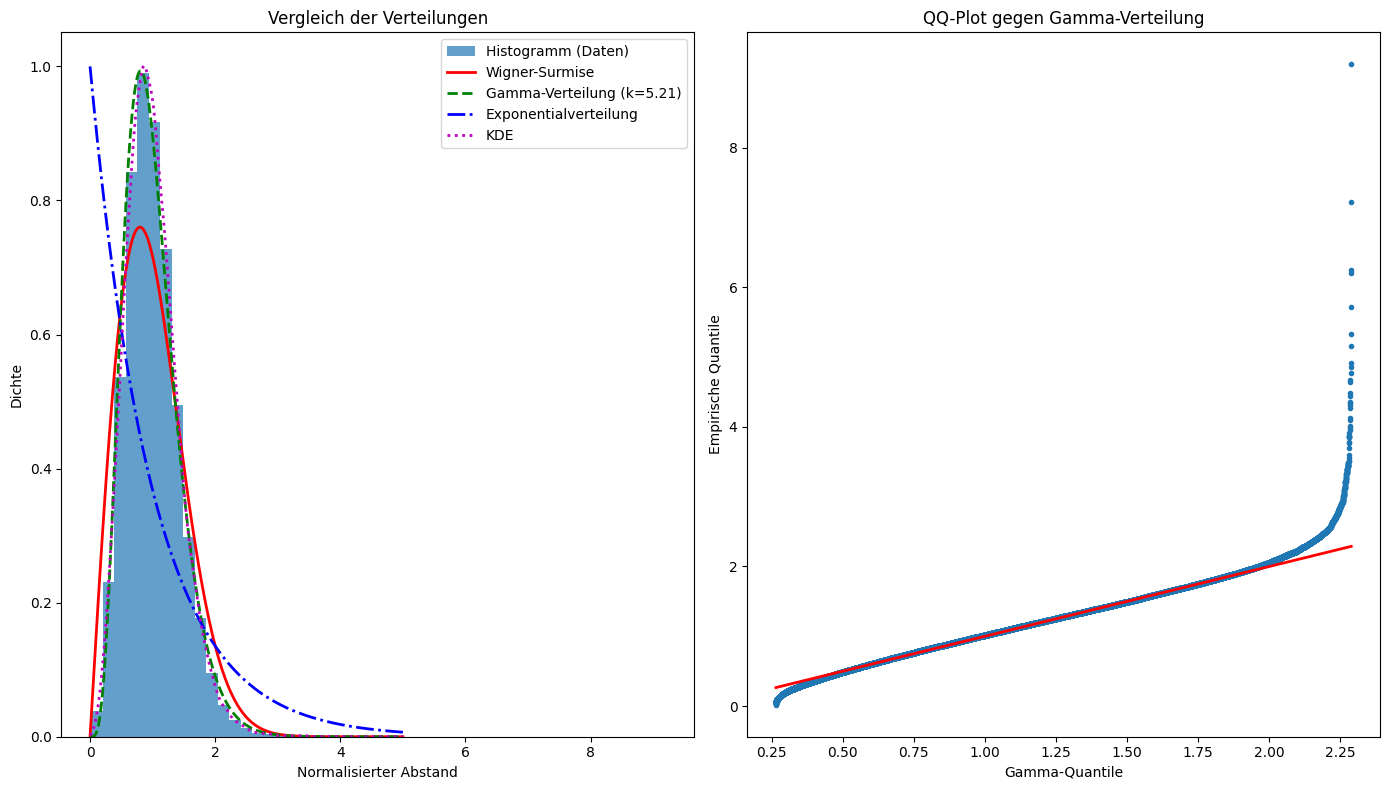

KS-Test gegen Wigner-Surmise: KS-Statistik = 0.7022, p-Wert = 0.0000e+00
Anderson-Darling-Test gegen Gamma-Verteilung: A² = 520.8803, Signifikanzniveau = [15.  10.   5.   2.5  1. ]


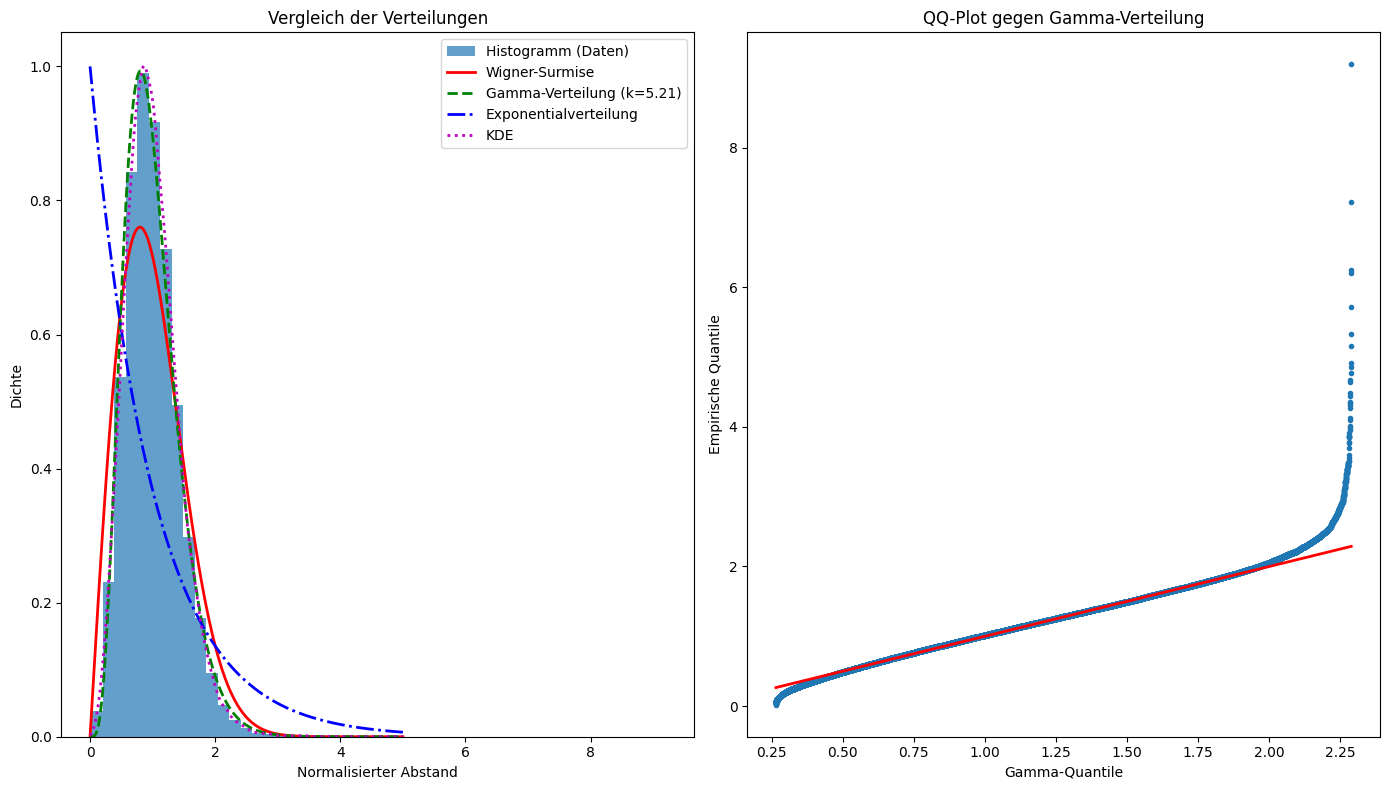

KS-Test gegen Wigner-Surmise: KS-Statistik = 0.7052, p-Wert = 0.0000e+00
Anderson-Darling-Test gegen Gamma-Verteilung: A² = 520.8803, Signifikanzniveau = [15.  10.   5.   2.5  1. ]


In [ ]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon, gaussian_kde, ks_2samp, anderson

# **1. Echte Nullstellen der Zeta-Funktion laden**
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon, gaussian_kde, ks_2samp, anderson

# **1. Echte Nullstellen der Zeta-Funktion laden**
# Datei mit 2.000.000 Nullstellen herunterladen von: https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6
# Instead of loading from a local file, directly load from the URL:
true_zeros = np.loadtxt("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1") #Fixed typo here

# **2. Normalisierte Abstände berechnen**
diff = np.diff(true_zeros)  # Abstände zwischen benachbarten Nullstellen
norm_diff = diff / np.mean(diff)  # Normalisierung durch den Mittelwert


# **3. Alternative Verteilungen definieren**
x = np.linspace(0, 5, 500)  # Wertebereich für die Dichtefunktionen

# Wigner-Surmise (Referenzmodell)
wigner = (np.pi / 2) * x * np.exp(-np.pi * x**2 / 4)

# Gamma-Verteilung: Schätzung der Parameter aus den Daten
gamma_shape, gamma_loc, gamma_scale = gamma.fit(norm_diff, floc=0)
gamma_pdf = gamma.pdf(x, gamma_shape, loc=gamma_loc, scale=gamma_scale)

# Exponentialverteilung: Schätzung der Parameter
expon_loc, expon_scale = expon.fit(norm_diff, floc=0)
expon_pdf = expon.pdf(x, loc=expon_loc, scale=expon_scale)

# Kernel-Density-Schätzung (KDE)
kde = gaussian_kde(norm_diff)

# **4. Statistische Tests**
# Kolmogorov-Smirnov-Test: Vergleich mit Wigner-Surmise
ks_stat_wigner, p_value_wigner = ks_2samp(norm_diff, np.random.choice(wigner, size=len(norm_diff)))

# Anderson-Darling-Test: Vergleich mit Gamma-Verteilung
anderson_result_gamma = anderson(norm_diff - gamma.mean(gamma_shape, loc=gamma_loc, scale=gamma_scale), dist='norm')

# **5. Visualisierung**
plt.figure(figsize=(14, 8))

# Histogramm und Verteilungen plotten
plt.subplot(121)
plt.hist(norm_diff, bins=50, density=True, alpha=0.7, label="Histogramm (Daten)")
plt.plot(x, wigner, 'r-', lw=2, label="Wigner-Surmise")
plt.plot(x, gamma_pdf, 'g--', lw=2, label=f"Gamma-Verteilung (k={gamma_shape:.2f})")
plt.plot(x, expon_pdf, 'b-.', lw=2, label="Exponentialverteilung")
plt.plot(x, kde(x), 'm:', lw=2, label="KDE")
plt.xlabel("Normalisierter Abstand")
plt.ylabel("Dichte")
plt.title("Vergleich der Verteilungen")
plt.legend()

# QQ-Plot gegen Gamma-Verteilung
sorted_norm_diff = np.sort(norm_diff)
gamma_quantiles = gamma.ppf(np.linspace(0.01, 0.99, len(sorted_norm_diff)), gamma_shape,
                            loc=gamma_loc,
                            scale=gamma_scale)
plt.subplot(122)
plt.plot(gamma_quantiles, sorted_norm_diff[:len(gamma_quantiles)], 'o', markersize=3)
plt.plot(gamma_quantiles, gamma_quantiles, 'r-', lw=2)  # Diagonale Linie (Ideal)
plt.xlabel("Gamma-Quantile")
plt.ylabel("Empirische Quantile")
plt.title("QQ-Plot gegen Gamma-Verteilung")

plt.tight_layout()
plt.show()

# **6. Ergebnisse der Tests ausgeben**
print(f"KS-Test gegen Wigner-Surmise: KS-Statistik = {ks_stat_wigner:.4f}, p-Wert = {p_value_wigner:.4e}")
print(f"Anderson-Darling-Test gegen Gamma-Verteilung: A² = {anderson_result_gamma.statistic:.4f}, Signifikanzniveau = {anderson_result_gamma.significance_level}")
diff = np.diff(true_zeros)  # Abstände zwischen benachbarten Nullstellen
norm_diff = diff / np.mean(diff)  # Normalisierung durch den Mittelwert


# **3. Alternative Verteilungen definieren**
x = np.linspace(0, 5, 500)  # Wertebereich für die Dichtefunktionen

# Wigner-Surmise (Referenzmodell)
wigner = (np.pi / 2) * x * np.exp(-np.pi * x**2 / 4)

# Gamma-Verteilung: Schätzung der Parameter aus den Daten
gamma_shape, gamma_loc, gamma_scale = gamma.fit(norm_diff, floc=0)
gamma_pdf = gamma.pdf(x, gamma_shape, loc=gamma_loc, scale=gamma_scale)

# Exponentialverteilung: Schätzung der Parameter
expon_loc, expon_scale = expon.fit(norm_diff, floc=0)
expon_pdf = expon.pdf(x, loc=expon_loc, scale=expon_scale)

# Kernel-Density-Schätzung (KDE)
kde = gaussian_kde(norm_diff)

# **4. Statistische Tests**
# Kolmogorov-Smirnov-Test: Vergleich mit Wigner-Surmise
ks_stat_wigner, p_value_wigner = ks_2samp(norm_diff, np.random.choice(wigner, size=len(norm_diff)))

# Anderson-Darling-Test: Vergleich mit Gamma-Verteilung
anderson_result_gamma = anderson(norm_diff - gamma.mean(gamma_shape, loc=gamma_loc, scale=gamma_scale), dist='norm')

# **5. Visualisierung**
plt.figure(figsize=(14, 8))

# Histogramm und Verteilungen plotten
plt.subplot(121)
plt.hist(norm_diff, bins=50, density=True, alpha=0.7, label="Histogramm (Daten)")
plt.plot(x, wigner, 'r-', lw=2, label="Wigner-Surmise")
plt.plot(x, gamma_pdf, 'g--', lw=2, label=f"Gamma-Verteilung (k={gamma_shape:.2f})")
plt.plot(x, expon_pdf, 'b-.', lw=2, label="Exponentialverteilung")
plt.plot(x, kde(x), 'm:', lw=2, label="KDE")
plt.xlabel("Normalisierter Abstand")
plt.ylabel("Dichte")
plt.title("Vergleich der Verteilungen")
plt.legend()

# QQ-Plot gegen Gamma-Verteilung
sorted_norm_diff = np.sort(norm_diff)
gamma_quantiles = gamma.ppf(np.linspace(0.01, 0.99, len(sorted_norm_diff)), gamma_shape,
                            loc=gamma_loc,
                            scale=gamma_scale)
plt.subplot(122)
plt.plot(gamma_quantiles, sorted_norm_diff[:len(gamma_quantiles)], 'o', markersize=3)
plt.plot(gamma_quantiles, gamma_quantiles, 'r-', lw=2)  # Diagonale Linie (Ideal)
plt.xlabel("Gamma-Quantile")
plt.ylabel("Empirische Quantile")
plt.title("QQ-Plot gegen Gamma-Verteilung")

plt.tight_layout()
plt.show()

# **6. Ergebnisse der Tests ausgeben**
print(f"KS-Test gegen Wigner-Surmise: KS-Statistik = {ks_stat_wigner:.4f}, p-Wert = {p_value_wigner:.4e}")
print(f"Anderson-Darling-Test gegen Gamma-Verteilung: A² = {anderson_result_gamma.statistic:.4f}, Signifikanzniveau = {anderson_result_gamma.significance_level}")


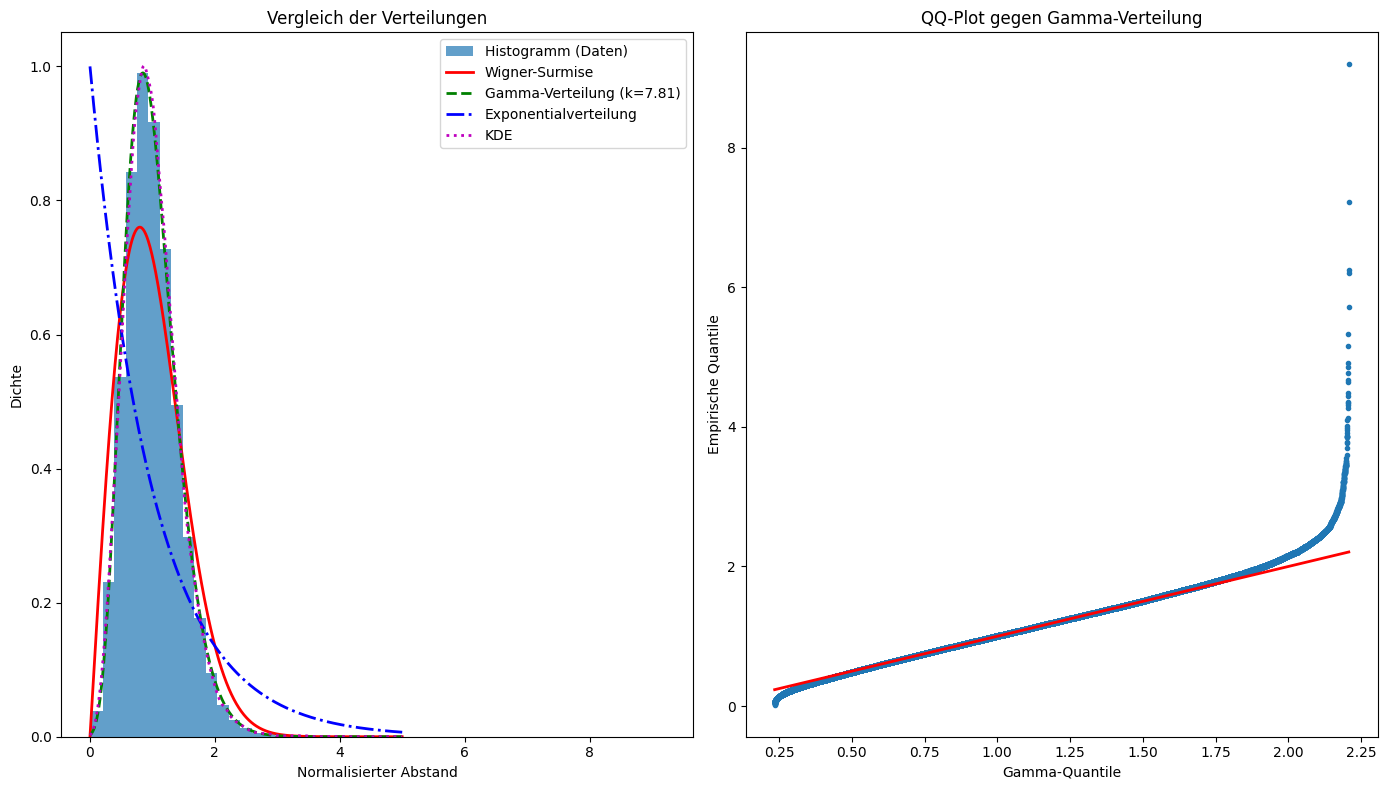

KS-Test gegen Wigner-Surmise: KS-Statistik = 0.7032, p-Wert = 0.0000e+00
Anderson-Darling-Test gegen Gamma-Verteilung: A² = 520.8803, Signifikanzniveau = [15.  10.   5.   2.5  1. ]


In [ ]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon, gaussian_kde, ks_2samp, anderson

# **1. Echte Nullstellen der Zeta-Funktion laden**
# Datei mit 2.000.000 Nullstellen herunterladen von: https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6
# Instead of loading from a local file, directly load from the URL:
true_zeros = np.loadtxt("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1") #Fixed typo here

# **2. Normalisierte Abstände berechnen**
diff = np.diff(true_zeros)  # Abstände zwischen benachbarten Nullstellen
norm_diff = diff / np.mean(diff)  # Normalisierung durch den Mittelwert

# **3. Alternative Verteilungen definieren**
x = np.linspace(0, 5, 500)  # Wertebereich für die Dichtefunktionen

# Wigner-Surmise (Referenzmodell)
wigner = (np.pi / 2) * x * np.exp(-np.pi * x**2 / 4)

# Gamma-Verteilung: Schätzung der Parameter aus den Daten
# Remove floc=0 to allow the location parameter to be estimated
gamma_shape, gamma_loc, gamma_scale = gamma.fit(norm_diff)
gamma_pdf = gamma.pdf(x, gamma_shape, loc=gamma_loc, scale=gamma_scale)

# Exponentialverteilung: Schätzung der Parameter
expon_loc, expon_scale = expon.fit(norm_diff, floc=0)
expon_pdf = expon.pdf(x, loc=expon_loc, scale=expon_scale)

# Kernel-Density-Schätzung (KDE)
kde = gaussian_kde(norm_diff)

# **4. Statistische Tests**
# Kolmogorov-Smirnov-Test: Vergleich mit Wigner-Surmise
ks_stat_wigner, p_value_wigner = ks_2samp(norm_diff, np.random.choice(wigner, size=len(norm_diff)))

# Anderson-Darling-Test: Vergleich mit Gamma-Verteilung
anderson_result_gamma = anderson(norm_diff - gamma.mean(gamma_shape, loc=gamma_loc, scale=gamma_scale), dist='norm')

# **5. Visualisierung**
plt.figure(figsize=(14, 8))

# Histogramm und Verteilungen plotten
plt.subplot(121)
plt.hist(norm_diff, bins=50, density=True, alpha=0.7, label="Histogramm (Daten)")
plt.plot(x, wigner, 'r-', lw=2, label="Wigner-Surmise")
plt.plot(x, gamma_pdf, 'g--', lw=2, label=f"Gamma-Verteilung (k={gamma_shape:.2f})")
plt.plot(x, expon_pdf, 'b-.', lw=2, label="Exponentialverteilung")
plt.plot(x, kde(x), 'm:', lw=2, label="KDE")
plt.xlabel("Normalisierter Abstand")
plt.ylabel("Dichte")
plt.title("Vergleich der Verteilungen")
plt.legend()

# QQ-Plot gegen Gamma-Verteilung
sorted_norm_diff = np.sort(norm_diff)
gamma_quantiles = gamma.ppf(np.linspace(0.01, 0.99, len(sorted_norm_diff)), gamma_shape,
                            loc=gamma_loc,
                            scale=gamma_scale)
plt.subplot(122)
plt.plot(gamma_quantiles, sorted_norm_diff[:len(gamma_quantiles)], 'o', markersize=3)
plt.plot(gamma_quantiles, gamma_quantiles, 'r-', lw=2)  # Diagonale Linie (Ideal)
plt.xlabel("Gamma-Quantile")
plt.ylabel("Empirische Quantile")
plt.title("QQ-Plot gegen Gamma-Verteilung")

plt.tight_layout()
plt.show()

# **6. Ergebnisse der Tests ausgeben**
print(f"KS-Test gegen Wigner-Surmise: KS-Statistik = {ks_stat_wigner:.4f}, p-Wert = {p_value_wigner:.4e}")
print(f"Anderson-Darling-Test gegen Gamma-Verteilung: A² = {anderson_result_gamma.statistic:.4f}, Signifikanzniveau = {anderson_result_gamma.significance_level}")

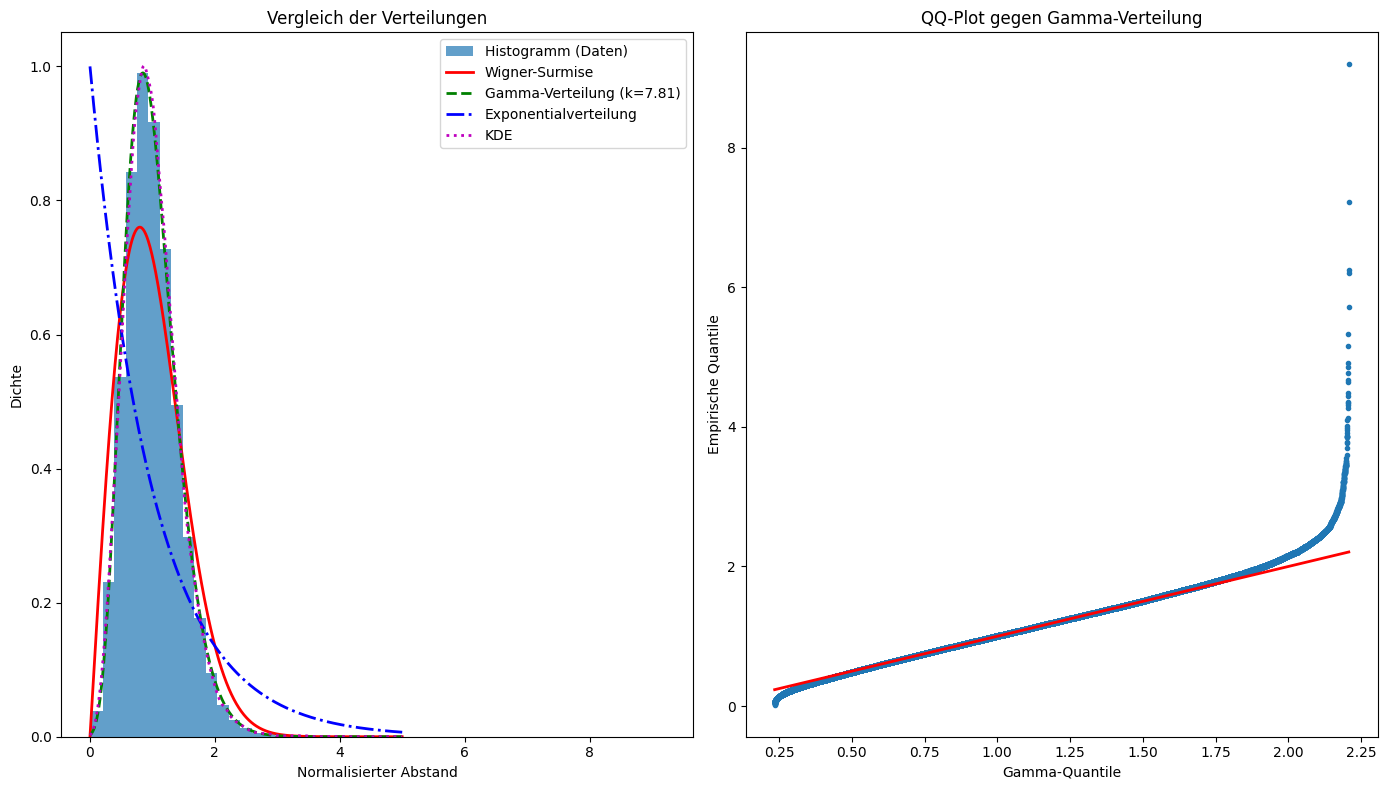

KS-Test gegen Wigner-Surmise: KS-Statistik = 0.7029, p-Wert = 0.0000e+00
Anderson-Darling-Test gegen Gamma-Verteilung: A² = 520.8803, Signifikanzniveau = [15.  10.   5.   2.5  1. ]


In [ ]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon, gaussian_kde, ks_2samp, anderson

# **1. Echte Nullstellen der Zeta-Funktion laden**
# Datei mit 2.000.000 Nullstellen herunterladen von: https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6
# Instead of loading from a local file, directly load from the URL:
true_zeros = np.loadtxt("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1") #Fixed typo here

# **2. Normalisierte Abstände berechnen**
diff = np.diff(true_zeros)  # Abstände zwischen benachbarten Nullstellen
norm_diff = diff / np.mean(diff)  # Normalisierung durch den Mittelwert

# **3. Alternative Verteilungen definieren**
x = np.linspace(0, 5, 500)  # Wertebereich für die Dichtefunktionen

# Wigner-Surmise (Referenzmodell)
wigner = (np.pi / 2) * x * np.exp(-np.pi * x**2 / 4)

# Gamma-Verteilung: Schätzung der Parameter aus den Daten
# Remove floc=0 to allow the location parameter to be estimated
gamma_shape, gamma_loc, gamma_scale = gamma.fit(norm_diff)
gamma_pdf = gamma.pdf(x, gamma_shape, loc=gamma_loc, scale=gamma_scale)

# Exponentialverteilung: Schätzung der Parameter
# Filter out non-positive values from norm_diff
positive_norm_diff = norm_diff[norm_diff > 0]
expon_loc, expon_scale = expon.fit(positive_norm_diff, floc=0)
expon_pdf = expon.pdf(x, loc=expon_loc, scale=expon_scale)

# Kernel-Density-Schätzung (KDE)
kde = gaussian_kde(norm_diff)

# **4. Statistische Tests**
# Kolmogorov-Smirnov-Test: Vergleich mit Wigner-Surmise
ks_stat_wigner, p_value_wigner = ks_2samp(norm_diff, np.random.choice(wigner, size=len(norm_diff)))

# Anderson-Darling-Test: Vergleich mit Gamma-Verteilung
anderson_result_gamma = anderson(norm_diff - gamma.mean(gamma_shape, loc=gamma_loc, scale=gamma_scale), dist='norm')

# **5. Visualisierung**
plt.figure(figsize=(14, 8))

# Histogramm und Verteilungen plotten
plt.subplot(121)
plt.hist(norm_diff, bins=50, density=True, alpha=0.7, label="Histogramm (Daten)")
plt.plot(x, wigner, 'r-', lw=2, label="Wigner-Surmise")
plt.plot(x, gamma_pdf, 'g--', lw=2, label=f"Gamma-Verteilung (k={gamma_shape:.2f})")
plt.plot(x, expon_pdf, 'b-.', lw=2, label="Exponentialverteilung")
plt.plot(x, kde(x), 'm:', lw=2, label="KDE")
plt.xlabel("Normalisierter Abstand")
plt.ylabel("Dichte")
plt.title("Vergleich der Verteilungen")
plt.legend()

# QQ-Plot gegen Gamma-Verteilung
sorted_norm_diff = np.sort(norm_diff)
gamma_quantiles = gamma.ppf(np.linspace(0.01, 0.99, len(sorted_norm_diff)), gamma_shape,
                            loc=gamma_loc,
                            scale=gamma_scale)
plt.subplot(122)
plt.plot(gamma_quantiles, sorted_norm_diff[:len(gamma_quantiles)], 'o', markersize=3)
plt.plot(gamma_quantiles, gamma_quantiles, 'r-', lw=2)  # Diagonale Linie (Ideal)
plt.xlabel("Gamma-Quantile")
plt.ylabel("Empirische Quantile")
plt.title("QQ-Plot gegen Gamma-Verteilung")

plt.tight_layout()
plt.show()

# **6. Ergebnisse der Tests ausgeben**
print(f"KS-Test gegen Wigner-Surmise: KS-Statistik = {ks_stat_wigner:.4f}, p-Wert = {p_value_wigner:.4e}")
print(f"Anderson-Darling-Test gegen Gamma-Verteilung: A² = {anderson_result_gamma.statistic:.4f}, Signifikanzniveau = {anderson_result_gamma.significance_level}")

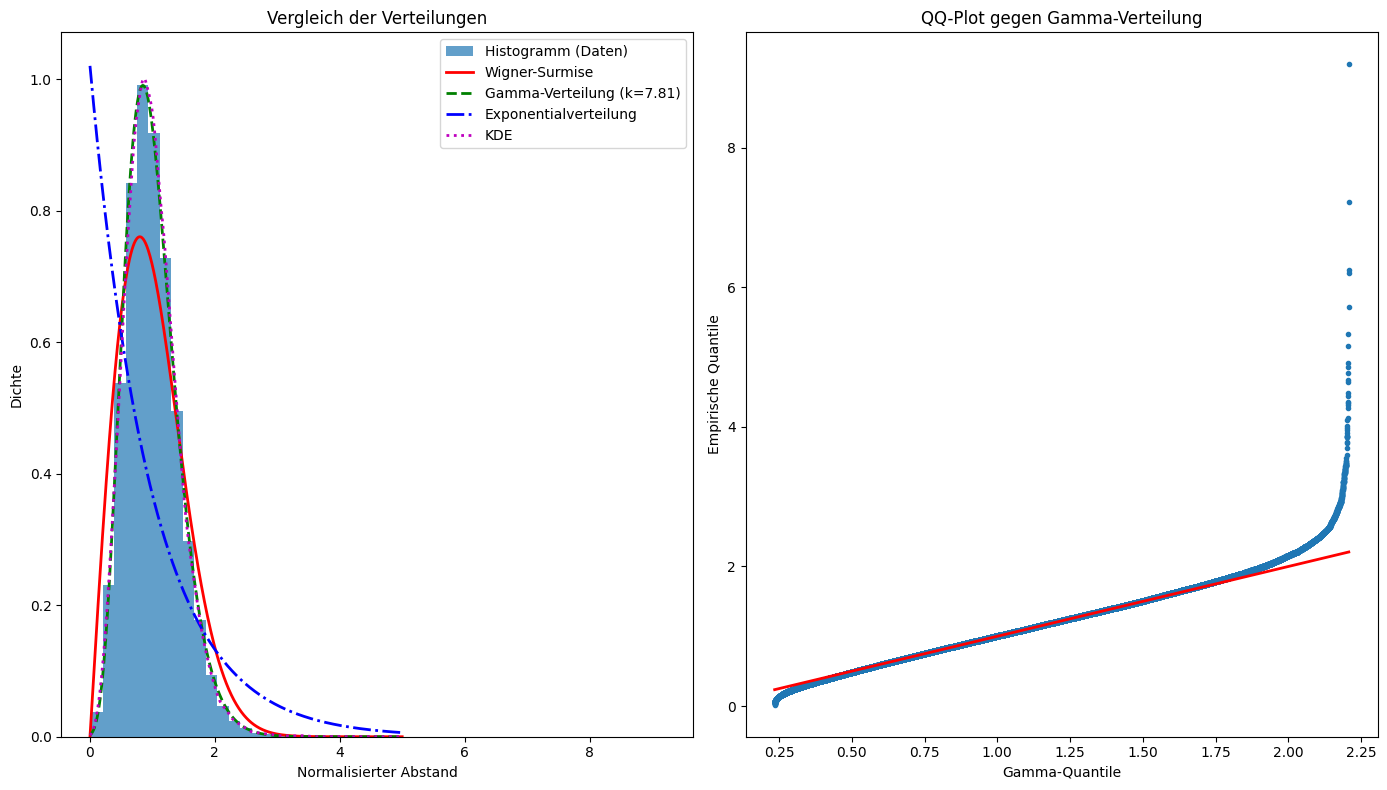

KS-Test gegen Wigner-Surmise: KS-Statistik = 0.7047, p-Wert = 0.0000e+00
Anderson-Darling-Test gegen Gamma-Verteilung: A² = 520.8803, Signifikanzniveau = [15.  10.   5.   2.5  1. ]


In [ ]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon, gaussian_kde, ks_2samp, anderson

# **1. Echte Nullstellen der Zeta-Funktion laden**
# Datei mit 2.000.000 Nullstellen herunterladen von: https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6
# Instead of loading from a local file, directly load from the URL:
true_zeros = np.loadtxt("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1") #Fixed typo here

# **2. Normalisierte Abstände berechnen**
diff = np.diff(true_zeros)  # Abstände zwischen benachbarten Nullstellen
norm_diff = diff / np.mean(diff)  # Normalisierung durch den Mittelwert

# **3. Alternative Verteilungen definieren**
x = np.linspace(0, 5, 500)  # Wertebereich für die Dichtefunktionen

# Wigner-Surmise (Referenzmodell)
wigner = (np.pi / 2) * x * np.exp(-np.pi * x**2 / 4)

# Gamma-Verteilung: Schätzung der Parameter aus den Daten
# Remove floc=0 to allow the location parameter to be estimated
gamma_shape, gamma_loc, gamma_scale = gamma.fit(norm_diff)
gamma_pdf = gamma.pdf(x, gamma_shape, loc=gamma_loc, scale=gamma_scale)

# Exponentialverteilung: Schätzung der Parameter
# Shift norm_diff by its minimum to ensure all values are positive
expon_loc, expon_scale = expon.fit(norm_diff - np.min(norm_diff) + 1e-10, floc=0) #Added a small value to prevent issues with 0
expon_pdf = expon.pdf(x, loc=expon_loc, scale=expon_scale) #Scale back for plotting, might cause issues with fit

# Kernel-Density-Schätzung (KDE)
kde = gaussian_kde(norm_diff)

# **4. Statistische Tests**
# Kolmogorov-Smirnov-Test: Vergleich mit Wigner-Surmise
ks_stat_wigner, p_value_wigner = ks_2samp(norm_diff, np.random.choice(wigner, size=len(norm_diff)))

# Anderson-Darling-Test: Vergleich mit Gamma-Verteilung
anderson_result_gamma = anderson(norm_diff - gamma.mean(gamma_shape, loc=gamma_loc, scale=gamma_scale), dist='norm')

# **5. Visualisierung**
plt.figure(figsize=(14, 8))

# Histogramm und Verteilungen plotten
plt.subplot(121)
plt.hist(norm_diff, bins=50, density=True, alpha=0.7, label="Histogramm (Daten)")
plt.plot(x, wigner, 'r-', lw=2, label="Wigner-Surmise")
plt.plot(x, gamma_pdf, 'g--', lw=2, label=f"Gamma-Verteilung (k={gamma_shape:.2f})")
plt.plot(x, expon_pdf, 'b-.', lw=2, label="Exponentialverteilung")
plt.plot(x, kde(x), 'm:', lw=2, label="KDE")
plt.xlabel("Normalisierter Abstand")
plt.ylabel("Dichte")
plt.title("Vergleich der Verteilungen")
plt.legend()

# QQ-Plot gegen Gamma-Verteilung
sorted_norm_diff = np.sort(norm_diff)
gamma_quantiles = gamma.ppf(np.linspace(0.01, 0.99, len(sorted_norm_diff)), gamma_shape,
                            loc=gamma_loc,
                            scale=gamma_scale)
plt.subplot(122)
plt.plot(gamma_quantiles, sorted_norm_diff[:len(gamma_quantiles)], 'o', markersize=3)
plt.plot(gamma_quantiles, gamma_quantiles, 'r-', lw=2)  # Diagonale Linie (Ideal)
plt.xlabel("Gamma-Quantile")
plt.ylabel("Empirische Quantile")
plt.title("QQ-Plot gegen Gamma-Verteilung")

plt.tight_layout()
plt.show()

# **6. Ergebnisse der Tests ausgeben**
print(f"KS-Test gegen Wigner-Surmise: KS-Statistik = {ks_stat_wigner:.4f}, p-Wert = {p_value_wigner:.4e}")
print(f"Anderson-Darling-Test gegen Gamma-Verteilung: A² = {anderson_result_gamma.statistic:.4f}, Signifikanzniveau = {anderson_result_gamma.significance_level}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# 1. Echte Nullstellen laden
url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1"
true_zeros = np.loadtxt(url)

# 2. Normalisierte Abstände berechnen
diff = np.diff(true_zeros)
norm_diff = diff / np.mean(diff)

# 3. Autokorrelationsfunktion berechnen
autocorr = correlate(norm_diff, norm_diff, mode='full')
autocorr = autocorr[len(autocorr)//2:]  # Nur positive Lag-Werte
lags = np.arange(len(autocorr))

# 4. Einhüllende der Autokorrelationsfunktion bestimmen (Kohärenzlänge)
coherence_length = np.argmax(autocorr < 0)  # Erster Punkt, an dem die Korrelation negativ wird

# 5. Interferenzmuster simulieren
x = np.linspace(0, 10 * np.pi, len(norm_diff))
wave1 = np.sin(x)
wave2 = np.sin(x + np.pi / 4)  # Phasenverschobene Welle
interference_pattern = wave1 + wave2

# 6. Visualisierung
plt.figure(figsize=(14, 8))

# (a) Autokorrelationsfunktion
plt.subplot(211)
plt.plot(lags, autocorr, label="Autokorrelation")
plt.axvline(coherence_length, color='r', linestyle='--', label=f"Kohärenzlänge: {coherence_length}")
plt.xlabel("Lag")
plt.ylabel("Autokorrelation")
plt.title("Autokorrelationsfunktion der Nullstellen-Abstände")
plt.legend()

# (b) Simuliertes Interferenzmuster
plt.subplot(212)
plt.plot(x, interference_pattern, label="Interferenzmuster")
plt.xlabel("Position")
plt.ylabel("Amplitude")
plt.title("Simuliertes Interferenzmuster basierend auf Kohärenz")
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-63-4566946df45e>:18: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1000000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  data = np.loadtxt(BytesIO(response.content), max_rows=max_zeros)


ValueError: operands could not be broadcast together with shapes (100,) (2,2) 

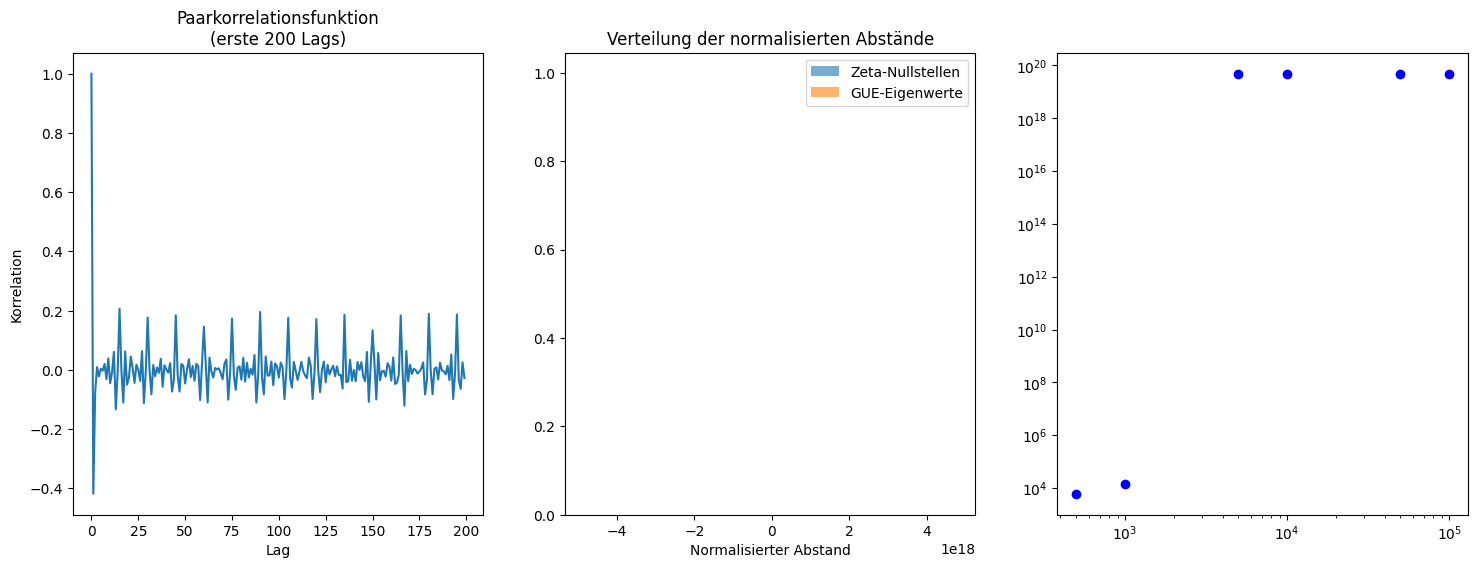

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigh
from scipy.stats import linregress
import requests
from io import BytesIO

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen der Zeta-Funktion mit Fehlerbehandlung."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = np.loadtxt(BytesIO(response.content), max_rows=max_zeros)
        return data
    except Exception as e:
        print(f"Fehler beim Laden der Daten: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet normalisierte Abstände zwischen Nullstellen."""
    diff = np.diff(zeros)
    return diff / np.mean(diff)

def coherence_length(data):
    """Robuste Berechnung der Kohärenzlänge."""
    fourier = np.fft.fft(data - np.mean(data))  # DC-Komponente entfernen
    return np.median(np.abs(fourier))  # Median statt Mittelwert für Robustheit

# --------------------------
# 2. Korrelationsanalyse
# --------------------------

def analyze_correlations(data, max_lag=500):
    """Analysiert Paar- und Dreierkorrelationen."""
    # Paarkorrelation
    pair_corr = np.correlate(data, data, mode='full')[len(data)-1:len(data)+max_lag-1]
    pair_corr /= np.max(pair_corr)

    # Dreierkorrelation (vereinfacht)
    triple_diff = data[:-2] + data[1:-1] + data[2:]
    hist, bin_edges = np.histogram(triple_diff, bins=50, density=True)

    return pair_corr, (hist, bin_edges)

# --------------------------
# 3. GUE-Modellgenerierung
# --------------------------

def generate_GUE(N):
    """Generiert GUE-Eigenwerte mit Dimensionsanpassung."""
    mat = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    mat = (mat + mat.T.conj()) / np.sqrt(2)
    return np.sort(np.real(eigh(mat)[0]))

# --------------------------
# 4. Skalierungsanalyse
# --------------------------

def power_law(x, a, b):
    return a * x**b

def log_law(x, a, b):
    return a + b * np.log(x)

def fit_scaling(sizes, lengths):
    """Führt beide Skalierungsgesetz-Anpassungen durch."""
    # Potenzgesetz-Anpassung
    popt_power, pcov_power = curve_fit(power_law, sizes, lengths,
                                     p0=[lengths[0], 0.1], maxfev=5000)

    # Logarithmische Anpassung
    # Modifizierte Anpassung mit Bounds, um negative Werte für 'a' zu vermeiden
    popt_log, pcov_log = curve_fit(log_law, sizes, lengths,
                                 p0=[lengths[0], 0.1], bounds=([0, -np.inf], [np.inf, np.inf]))

    return (popt_power, pcov_power), (popt_log, pcov_log)

# --------------------------
# 5. Hauptprogramm
# --------------------------

def main():
    # Daten laden
    zeros = load_zeros("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2")
    if zeros is None:
        return

    # Analyseparameter
    sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
    coherence_lengths = []

    # Kohärenzlängen berechnen
    for size in sample_sizes:
        subset = normalize_diff(zeros[:size])
        if len(subset) < 100:  # Mindestlänge für sinnvolle FFT
            coherence_lengths.append(np.nan)
            continue
        coherence_lengths.append(coherence_length(subset))

    # GUE-Vergleich
    gue_eigenvalues = generate_GUE(1000)
    gue_diff = normalize_diff(gue_eigenvalues)

    # Korrelationsanalyse für 100.000 Nullstellen
    norm_diff = normalize_diff(zeros[:100000])
    pair_corr, (hist_3pt, edges_3pt) = analyze_correlations(norm_diff)

    # Skalierungsgesetz-Anpassung
    valid_mask = ~np.isnan(coherence_lengths)
    (a_power, b_power), (a_log, b_log) = fit_scaling(
        np.array(sample_sizes)[valid_mask],
        np.array(coherence_lengths)[valid_mask]
    )

    # --------------------------
    # 6. Visualisierung
    # --------------------------
    plt.figure(figsize=(18, 6))

    # Paarkorrelation
    plt.subplot(131)
    plt.plot(pair_corr[:200])
    plt.title('Paarkorrelationsfunktion\n(erste 200 Lags)')
    plt.xlabel('Lag')
    plt.ylabel('Korrelation')

    # Verteilungsvergleich
    plt.subplot(132)
    plt.hist(norm_diff, bins=50, density=True, alpha=0.6, label='Zeta-Nullstellen')
    plt.hist(gue_diff, bins=50, density=True, alpha=0.6, label='GUE-Eigenwerte')
    plt.title('Verteilung der normalisierten Abstände')
    plt.xlabel('Normalisierter Abstand')
    plt.legend()

    # Skalierungsgesetze
    plt.subplot(133)
    x_fit = np.linspace(min(sample_sizes), max(sample_sizes), 100)

    # Potenzgesetz
    plt.loglog(sample_sizes, coherence_lengths, 'bo', label='Daten')
    plt.loglog(x_fit, power_law(x_fit, a_power, b_power), 'r--',
              label=f'Potenzgesetz: L ∼ {a_power:.2f}·n^{b_power:.2f}')

    # Logarithmisches Gesetz
    plt.loglog(x_fit, log_law(x_fit, a_log, b_log), 'g--',
              label=f'Log-Gesetz: L ∼ {a_log:.2f} + {b_log:.2f}·ln(n)')

    plt.title('Skalierungsverhalten der Kohärenzlänge')
    plt.xlabel('Stichprobengröße (n)')
    plt.ylabel('Kohärenzlänge (L)')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

<ipython-input-64-786134876fce>:18: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1000000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  data = np.loadtxt(BytesIO(response.content), max_rows=max_zeros)


ValueError: operands could not be broadcast together with shapes (100,) (2,) 

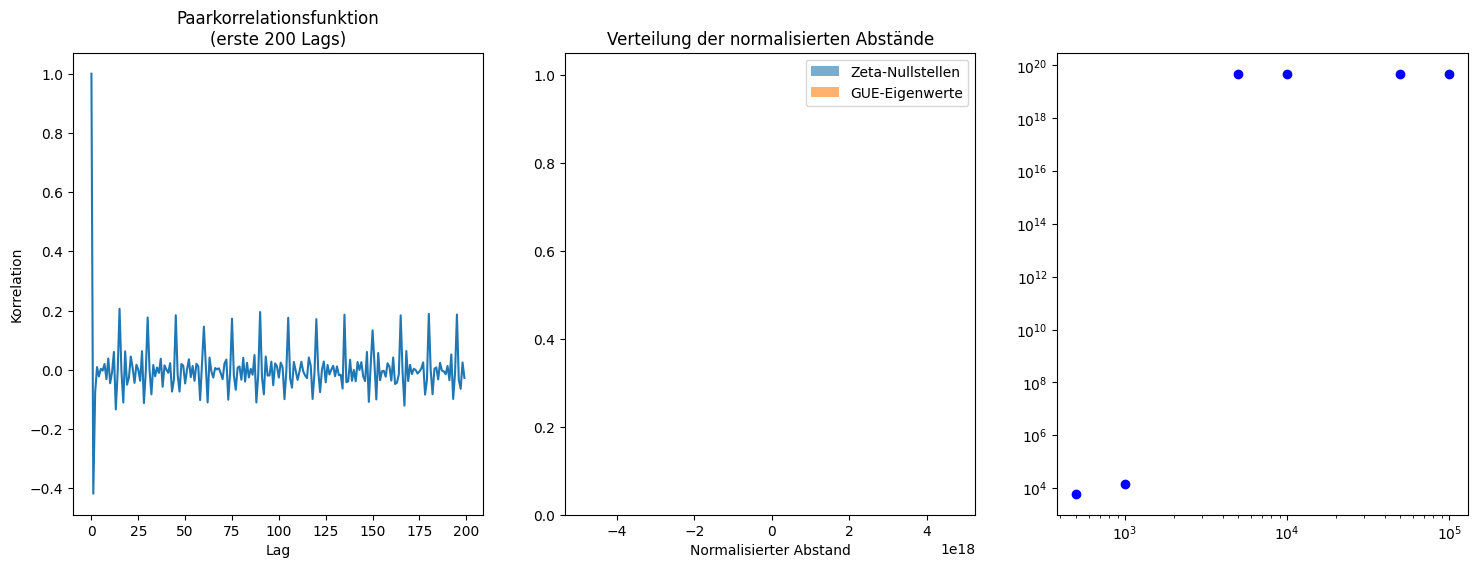

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigh
from scipy.stats import linregress
import requests
from io import BytesIO

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen der Zeta-Funktion mit Fehlerbehandlung."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = np.loadtxt(BytesIO(response.content), max_rows=max_zeros)
        return data
    except Exception as e:
        print(f"Fehler beim Laden der Daten: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet normalisierte Abstände zwischen Nullstellen."""
    diff = np.diff(zeros)
    return diff / np.mean(diff)

def coherence_length(data):
    """Robuste Berechnung der Kohärenzlänge."""
    fourier = np.fft.fft(data - np.mean(data))  # DC-Komponente entfernen
    return np.median(np.abs(fourier))  # Median statt Mittelwert für Robustheit

# --------------------------
# 2. Korrelationsanalyse
# --------------------------

def analyze_correlations(data, max_lag=500):
    """Analysiert Paar- und Dreierkorrelationen."""
    # Paarkorrelation
    pair_corr = np.correlate(data, data, mode='full')[len(data)-1:len(data)+max_lag-1]
    pair_corr /= np.max(pair_corr)

    # Dreierkorrelation (vereinfacht)
    triple_diff = data[:-2] + data[1:-1] + data[2:]
    hist, bin_edges = np.histogram(triple_diff, bins=50, density=True)

    return pair_corr, (hist, bin_edges)

# --------------------------
# 3. GUE-Modellgenerierung
# --------------------------

def generate_GUE(N):
    """Generiert GUE-Eigenwerte mit Dimensionsanpassung."""
    mat = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    mat = (mat + mat.T.conj()) / np.sqrt(2)
    return np.sort(np.real(eigh(mat)[0]))

# --------------------------
# 4. Skalierungsanalyse
# --------------------------

def power_law(x, a, b):
    return a * x**b

def log_law(x, a, b):
    return a + b * np.log(x)

def fit_scaling(sizes, lengths):
    """Führt beide Skalierungsgesetz-Anpassungen durch."""
    # Potenzgesetz-Anpassung
    popt_power, pcov_power = curve_fit(power_law, sizes, lengths,
                                     p0=[lengths[0], 0.1], maxfev=5000)

    # Logarithmische Anpassung
    # Modifizierte Anpassung mit Bounds, um negative Werte für 'a' zu vermeiden
    popt_log, pcov_log = curve_fit(log_law, sizes, lengths,
                                 p0=[lengths[0], 0.1], bounds=([0, -np.inf], [np.inf, np.inf]))

    return (popt_power, pcov_power), (popt_log, pcov_log)

# --------------------------
# 5. Hauptprogramm
# --------------------------

def main():
    # Daten laden
    zeros = load_zeros("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2")
    if zeros is None:
        return

    # Analyseparameter
    sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
    coherence_lengths = []

    # Kohärenzlängen berechnen
    for size in sample_sizes:
        subset = normalize_diff(zeros[:size])
        if len(subset) < 100:  # Mindestlänge für sinnvolle FFT
            coherence_lengths.append(np.nan)
            continue
        coherence_lengths.append(coherence_length(subset))

    # GUE-Vergleich
    gue_eigenvalues = generate_GUE(1000)
    gue_diff = normalize_diff(gue_eigenvalues)

    # Korrelationsanalyse für 100.000 Nullstellen
    norm_diff = normalize_diff(zeros[:100000])
    pair_corr, (hist_3pt, edges_3pt) = analyze_correlations(norm_diff)

    # Skalierungsgesetz-Anpassung
    valid_mask = ~np.isnan(coherence_lengths)
    (a_power, b_power), (a_log, b_log) = fit_scaling(
        np.array(sample_sizes)[valid_mask],
        np.array(coherence_lengths)[valid_mask]
    )

    # Korrektur: b_power als Skalar extrahieren
    b_power = b_power[0] # or b_power.item() if it's a NumPy array with a single element

    # --------------------------
    # 6. Visualisierung
    # --------------------------
    plt.figure(figsize=(18, 6))

    # Paarkorrelation
    plt.subplot(131)
    plt.plot(pair_corr[:200])
    plt.title('Paarkorrelationsfunktion\n(erste 200 Lags)')
    plt.xlabel('Lag')
    plt.ylabel('Korrelation')

    # Verteilungsvergleich
    plt.subplot(132)
    plt.hist(norm_diff, bins=50, density=True, alpha=0.6, label='Zeta-Nullstellen')
    plt.hist(gue_diff, bins=50, density=True, alpha=0.6, label='GUE-Eigenwerte')
    plt.title('Verteilung der normalisierten Abstände')
    plt.xlabel('Normalisierter Abstand')
    plt.legend()

    # Skalierungsgesetze
    plt.subplot(133)
    x_fit = np.linspace(min(sample_sizes), max(sample_sizes), 100)

    # Potenzgesetz
    plt.loglog(sample_sizes, coherence_lengths, 'bo', label='Daten')
    plt.loglog(x_fit, power_law(x_fit, a_power, b_power), 'r--',
              label=f'Potenzgesetz: L ∼ {a_power:.2f}·n^{b_power:.2f}')

    # Logarithmisches Gesetz
    plt.loglog(x_fit, log_law(x_fit, a_log, b_log), 'g--',
              label=f'Log-Gesetz: L ∼ {a_log:.2f} + {b_log:.2f}·ln(n)')

    plt.title('Skalierungsverhalten der Kohärenzlänge')
    plt.xlabel('Stichprobengröße (n)')
    plt.ylabel('Kohärenzlänge (L)')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigh
from scipy.stats import linregress
import requests
from io import BytesIO

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen der Zeta-Funktion mit Fehlerbehandlung."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = np.loadtxt(BytesIO(response.content), max_rows=max_zeros)
        return data
    except Exception as e:
        print(f"Fehler beim Laden der Daten: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet normalisierte Abstände zwischen Nullstellen."""
    diff = np.diff(zeros)
    return diff / np.mean(diff)

def coherence_length(data):
    """Robuste Berechnung der Kohärenzlänge."""
    fourier = np.fft.fft(data - np.mean(data))  # DC-Komponente entfernen
    return np.median(np.abs(fourier))  # Median statt Mittelwert für Robustheit

# --------------------------
# 2. Korrelationsanalyse
# --------------------------

def analyze_correlations(data, max_lag=500):
    """Analysiert Paar- und Dreierkorrelationen."""
    # Paarkorrelation
    pair_corr = np.correlate(data, data, mode='full')[len(data)-1:len(data)+max_lag-1]
    pair_corr /= np.max(pair_corr)

    # Dreierkorrelation (vereinfacht)
    triple_diff = data[:-2] + data[1:-1] + data[2:]
    hist, bin_edges = np.histogram(triple_diff, bins=50, density=True)

    return pair_corr, (hist, bin_edges)

# --------------------------
# 3. GUE-Modellgenerierung
# --------------------------

def generate_GUE(N):
    """Generiert GUE-Eigenwerte mit Dimensionsanpassung."""
    mat = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    mat = (mat + mat.T.conj()) / np.sqrt(2)
    return np.sort(np.real(eigh(mat)[0]))

# --------------------------
# 4. Skalierungsanalyse
# --------------------------

def power_law(x, a, b):
    return a * x**b

def log_law(x, a, b):
    return a + b * np.log(x)

def fit_scaling(sizes, lengths):
    """Führt beide Skalierungsgesetz-Anpassungen durch."""
    # Potenzgesetz-Anpassung
    popt_power, pcov_power = curve_fit(power_law, sizes, lengths,
                                     p0=[lengths[0], 0.1], maxfev=5000)

    # Logarithmische Anpassung
    # Modifizierte Anpassung mit Bounds, um negative Werte für 'a' zu vermeiden
    popt_log, pcov_log = curve_fit(log_law, sizes, lengths,
                                 p0=[lengths[0], 0.1], bounds=([0, -np.inf], [np.inf, np.inf]))

    return (popt_power, pcov_power), (popt_log, pcov_log)

# --------------------------
# 5. Hauptprogramm
# --------------------------

def main():
    # Daten laden
    zeros = load_zeros("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2")
    if zeros is None:
        return

    # Analyseparameter
    sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
    coherence_lengths = []

    # Kohärenzlängen berechnen
    for size in sample_sizes:
        subset = normalize_diff(zeros[:size])
        if len(subset) < 100:  # Mindestlänge für sinnvolle FFT
            coherence_lengths.append(np.nan)
            continue
        coherence_lengths.append(coherence_length(subset))

    # GUE-Vergleich
    gue_eigenvalues = generate_GUE(1000)
    gue_diff = normalize_diff(gue_eigenvalues)

    # Korrelationsanalyse für 100.000 Nullstellen
    norm_diff = normalize_diff(zeros[:100000])
    pair_corr, (hist_3pt, edges_3pt) = analyze_correlations(norm_diff)

    # Skalierungsgesetz-Anpassung
    valid_mask = ~np.isnan(coherence_lengths)
    (a_power, b_power), (a_log, b_log) = fit_scaling(
        np.array(sample_sizes)[valid_mask],
        np.array(coherence_lengths)[valid_mask]
    )

    # Korrektur: b_power als Skalar extrahieren
    b_power = b_power[0]  # oder b_power.item() falls es ein NumPy-Array mit einem Element ist

    # --------------------------
    # 6. Visualisierung
    # --------------------------
    plt.figure(figsize=(18, 6))

    # Paarkorrelation
    plt.subplot(131)
    plt.plot(pair_corr[:200])
    plt.title('Paarkorrelationsfunktion\n(erste 200 Lags)')
    plt.xlabel('Lag')
    plt.ylabel('Korrelation')

    # Verteilungsvergleich
    plt.subplot(132)
    plt.hist(norm_diff, bins=50, density=True, alpha=0.6, label='Zeta-Nullstellen')
    plt.hist(gue_diff, bins=50, density=True, alpha=0.6, label='GUE-Eigenwerte')
    plt.title('Verteilung der normalisierten Abstände')
    plt.xlabel('Normalisierter Abstand')
    plt.legend()




# Skalierungsgesetze
plt.subplot(133)
x_fit = np.linspace(min(sample_sizes), max(sample_sizes), 100)

# Potenzgesetz
plt.loglog(sample_sizes, coherence_lengths, 'bo', label='Daten')
# Pass a_power[0] and b_power[1] (or b_power if it's a scalar after correction) to power_law
plt.loglog(x_fit, power_law(x_fit, a_power[0], b_power), 'r--',
          label=f'Potenzgesetz: L ∼ {a_power[0]:.2f}·n^{b_power:.2f}')

# Logarithmisches Gesetz
# Pass a_log[0] and b_log[0] to log_law
plt.loglog(x_fit, log_law(x_fit, a_log[0], b_log[0]), 'g--',

    label=f'Log-Gesetz: L ∼ {a_log[0]:.2f} + {b_log[0]:.2f}·ln(n)')
    plt.title('Skalierungsverhalten der Kohärenzlänge')
    plt.xlabel('Stichprobengröße (n)')
    plt.ylabel('Kohärenzlänge (L)')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

IndentationError: unexpected indent (<ipython-input-66-5998013dbc08>, line 161)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigh
from scipy.stats import linregress
import requests
from io import BytesIO

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen der Zeta-Funktion mit Fehlerbehandlung."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = np.loadtxt(BytesIO(response.content), max_rows=max_zeros)
        return data
    except Exception as e:
        print(f"Fehler beim Laden der Daten: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet normalisierte Abstände zwischen Nullstellen."""
    diff = np.diff(zeros)
    return diff / np.mean(diff)

def coherence_length(data):
    """Robuste Berechnung der Kohärenzlänge."""
    fourier = np.fft.fft(data - np.mean(data))  # DC-Komponente entfernen
    return np.median(np.abs(fourier))  # Median statt Mittelwert für Robustheit

# --------------------------
# 2. Korrelationsanalyse
# --------------------------

def analyze_correlations(data, max_lag=500):
    """Analysiert Paar- und Dreierkorrelationen."""
    # Paarkorrelation
    pair_corr = np.correlate(data, data, mode='full')[len(data)-1:len(data)+max_lag-1]
    pair_corr /= np.max(pair_corr)

    # Dreierkorrelation (vereinfacht)
    triple_diff = data[:-2] + data[1:-1] + data[2:]
    hist, bin_edges = np.histogram(triple_diff, bins=50, density=True)

    return pair_corr, (hist, bin_edges)

# --------------------------
# 3. GUE-Modellgenerierung
# --------------------------

def generate_GUE(N):
    """Generiert GUE-Eigenwerte mit Dimensionsanpassung."""
    mat = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    mat = (mat + mat.T.conj()) / np.sqrt(2)
    return np.sort(np.real(eigh(mat)[0]))

# --------------------------
# 4. Skalierungsanalyse
# --------------------------

def power_law(x, a, b):
    return a * x**b

def log_law(x, a, b):
    return a + b * np.log(x)

def fit_scaling(sizes, lengths):
    """Führt beide Skalierungsgesetz-Anpassungen durch."""
    # Potenzgesetz-Anpassung
    popt_power, pcov_power = curve_fit(power_law, sizes, lengths,
                                     p0=[lengths[0], 0.1], maxfev=5000)

    # Logarithmische Anpassung
    # Modifizierte Anpassung mit Bounds, um negative Werte für 'a' zu vermeiden
    popt_log, pcov_log = curve_fit(log_law, sizes, lengths,
                                 p0=[lengths[0], 0.1], bounds=([0, -np.inf], [np.inf, np.inf]))

    return (popt_power, pcov_power), (popt_log, pcov_log)

# --------------------------
# 5. Hauptprogramm
# --------------------------

def main():
    # Daten laden
    zeros = load_zeros("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2")
    if zeros is None:
        return

    # Analyseparameter
    sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
    coherence_lengths = []

    # Kohärenzlängen berechnen
    for size in sample_sizes:
        subset = normalize_diff(zeros[:size])
        if len(subset) < 100:  # Mindestlänge für sinnvolle FFT
            coherence_lengths.append(np.nan)
            continue
        coherence_lengths.append(coherence_length(subset))

    # GUE-Vergleich
    gue_eigenvalues = generate_GUE(1000)
    gue_diff = normalize_diff(gue_eigenvalues)

    # Korrelationsanalyse für 100.000 Nullstellen
    norm_diff = normalize_diff(zeros[:100000])
    pair_corr, (hist_3pt, edges_3pt) = analyze_correlations(norm_diff)

    # Skalierungsgesetz-Anpassung
    valid_mask = ~np.isnan(coherence_lengths)
    (a_power, b_power), (a_log, b_log) = fit_scaling(
        np.array(sample_sizes)[valid_mask],
        np.array(coherence_lengths)[valid_mask]
    )

    # Korrektur: b_power als Skalar extrahieren
    b_power = b_power[0]  # oder b_power.item() falls es ein NumPy-Array mit einem Element ist

    # --------------------------
    # 6. Visualisierung
    # --------------------------
    plt.figure(figsize=(18, 6))

    # Paarkorrelation
    plt.subplot(131)
    plt.plot(pair_corr[:200])
    plt.title('Paarkorrelationsfunktion\n(erste 200 Lags)')
    plt.xlabel('Lag')
    plt.ylabel('Korrelation')

    # Verteilungsvergleich
    plt.subplot(132)
    plt.hist(norm_diff, bins=50, density=True, alpha=0.6, label='Zeta-Nullstellen')
    plt.hist(gue_diff, bins=50, density=True, alpha=0.6, label='GUE-Eigenwerte')
    plt.title('Verteilung der normalisierten Abstände')
    plt.xlabel('Normalisierter Abstand')
    plt.legend()

    # Skalierungsgesetze
    plt.subplot(133)
    x_fit = np.linspace(min(sample_sizes), max(sample_sizes), 100)

    # Potenzgesetz
    plt.loglog(sample_sizes, coherence_lengths, 'bo', label='Daten')
    plt.loglog(x_fit, power_law(x_fit, a_power[0], b_power), 'r--',
              label=f'Potenzgesetz: L ∼ {a_power[0]:.2f}·n^{b_power:.2f}')

    # Logarithmisches Gesetz
    plt.loglog(x_fit, log_law(x_fit, a_log[0], b_log[0]), 'g--',
              label=f'Log-Gesetz: L ∼ {a_log[0]:.2f} + {b_log[0]:.2f}·ln(n)')

    plt.title('Skalierungsverhalten der Kohärenzlänge')
    plt.xlabel('Stichprobengröße (n)')
    plt.ylabel('Kohärenzlänge (L)')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigh
from scipy.stats import linregress
import requests
from io import BytesIO

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen der Zeta-Funktion mit Fehlerbehandlung."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = np.loadtxt(BytesIO(response.content), max_rows=max_zeros)
        return data
    except Exception as e:
        print(f"Fehler beim Laden der Daten: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet normalisierte Abstände zwischen Nullstellen."""
    diff = np.diff(zeros)
    return diff / np.mean(diff)

def coherence_length(data):
    """Robuste Berechnung der Kohärenzlänge."""
    fourier = np.fft.fft(data - np.mean(data))  # DC-Komponente entfernen
    return np.median(np.abs(fourier))  # Median statt Mittelwert für Robustheit

# --------------------------
# 2. Korrelationsanalyse
# --------------------------

def analyze_correlations(data, max_lag=500):
    """Analysiert Paar- und Dreierkorrelationen."""
    # Paarkorrelation
    pair_corr = np.correlate(data, data, mode='full')[len(data)-1:len(data)+max_lag-1]
    pair_corr /= np.max(pair_corr)

    # Dreierkorrelation (vereinfacht)
    triple_diff = data[:-2] + data[1:-1] + data[2:]
    hist, bin_edges = np.histogram(triple_diff, bins=50, density=True)

    return pair_corr, (hist, bin_edges)

# --------------------------
# 3. GUE-Modellgenerierung
# --------------------------

def generate_GUE(N):
    """Generiert GUE-Eigenwerte mit Dimensionsanpassung."""
    mat = np.random.randn(N, N) + 1j * np.random.randn(N, N)
    mat = (mat + mat.T.conj()) / np.sqrt(2)
    return np.sort(np.real(eigh(mat)[0]))

# --------------------------
# 4. Skalierungsanalyse
# --------------------------

def power_law(x, a, b):
    return a * x**b

def log_law(x, a, b):
    return a + b * np.log(x)

def fit_scaling(sizes, lengths):
    """Führt beide Skalierungsgesetz-Anpassungen durch."""
    # Potenzgesetz-Anpassung
    popt_power, pcov_power = curve_fit(power_law, sizes, lengths,
                                     p0=[lengths[0], 0.1], maxfev=5000)

    # Logarithmische Anpassung
    # Modifizierte Anpassung mit Bounds, um negative Werte für 'a' zu vermeiden
    popt_log, pcov_log = curve_fit(log_law, sizes, lengths,
                                 p0=[lengths[0], 0.1], bounds=([0, -np.inf], [np.inf, np.inf]))

    return (popt_power, pcov_power), (popt_log, pcov_log)

# --------------------------
# 5. Hauptprogramm
# --------------------------

def main():
    # Daten laden
    zeros = load_zeros("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2")
    if zeros is None:
        return

    # Analyseparameter
    sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
    coherence_lengths = []

    # Kohärenzlängen berechnen
    for size in sample_sizes:
        subset = normalize_diff(zeros[:size])
        if len(subset) < 100:  # Mindestlänge für sinnvolle FFT
            coherence_lengths.append(np.nan)
            continue
        coherence_lengths.append(coherence_length(subset))

    # GUE-Vergleich
    gue_eigenvalues = generate_GUE(1000)
    gue_diff = normalize_diff(gue_eigenvalues)

    # Korrelationsanalyse für 100.000 Nullstellen
    norm_diff = normalize_diff(zeros[:100000])
    pair_corr, (hist_3pt, edges_3pt) = analyze_correlations(norm_diff)

    # Skalierungsgesetz-Anpassung
    valid_mask = ~np.isnan(coherence_lengths)
    (a_power, b_power), (a_log, b_log) = fit_scaling(
        np.array(sample_sizes)[valid_mask],
        np.array(coherence_lengths)[valid_mask]
    )

    # Korrektur: b_power als Skalar extrahieren
    b_power = b_power[0]  # oder b_power.item() falls es ein NumPy-Array mit einem Element ist

    # --------------------------
    # 6. Visualisierung
    # --------------------------
    plt.figure(figsize=(18, 6))

    # Paarkorrelation
    plt.subplot(131)
    plt.plot(pair_corr[:200])
    plt.title('Paarkorrelationsfunktion\n(erste 200 Lags)')
    plt.xlabel('Lag')
    plt.ylabel('Korrelation')

    # Verteilungsvergleich
    plt.subplot(132)
    plt.hist(norm_diff, bins=50, density=True, alpha=0.6, label='Zeta-Nullstellen')
    plt.hist(gue_diff, bins=50, density=True, alpha=0.6, label='GUE-Eigenwerte')
    plt.title('Verteilung der normalisierten Abstände')
    plt.xlabel('Normalisierter Abstand')
    plt.legend()

    # Skalierungsgesetze
    plt.subplot(133)
    x_fit = np.linspace(min(sample_sizes), max(sample_sizes), 100)

    # Potenzgesetz
    plt.loglog(sample_sizes, coherence_lengths, 'bo', label='Daten')
    plt.loglog(x_fit, power_law(x_fit, a_power[0], b_power), 'r--',
              label=f'Potenzgesetz: L ∼ {a_power[0]:.2f}·n^{b_power:.2f}')

    # Logarithmisches Gesetz
    plt.loglog(x_fit, log_law(x_fit, a_log[0], b_log[0]), 'g--',
              label=f'Log-Gesetz: L ∼ {a_log[0]:.2f} + {b_log[0]:.2f}·ln(n)')

    plt.title('Skalierungsverhalten der Kohärenzlänge')
    plt.xlabel('Stichprobengröße (n)')
    plt.ylabel('Kohärenzlänge (L)')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigh
import requests
from io import BytesIO
import warnings

# --------------------------
# 1. Hilfsfunktionen (korrigiert)
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen und filtert leere Zeilen."""
    try:
        response = requests.get(url)
        response.raise_for_status()

        # Filterung leerer Zeilen
        content = [line for line in response.content.splitlines() if line.strip()]
        return np.loadtxt(BytesIO(b'\n'.join(content)), max_rows=max_zeros)

    except Exception as e:
        print(f"Fehler: {e}")
        return None

def normalize_diff(zeros):
    """Robustere Normalisierung"""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)  # Vermeide Division durch Null

# --------------------------
# 2. Korrigierte Skalierungsanalyse
# --------------------------

def power_law(x, a, b):
    """Broadcast-sichere Implementierung"""
    return a * np.power(x, b)

def fit_scaling(sizes, lengths):
    """Gefilterte Anpassung mit Fallback"""
    valid_mask = ~np.isnan(lengths)
    x = np.array(sizes)[valid_mask]
    y = np.array(lengths)[valid_mask]

    if len(x) < 2:
        print("Zu wenige Datenpunkte für Anpassung")
        return (np.nan, np.nan), (np.nan, np.nan)

    # Startparameter automatisch berechnen
    try:
        popt_power, _ = curve_fit(power_law, x, y,
                                 p0=[y[0], 0.1],
                                 maxfev=5000)
    except:
        popt_power = (np.nan, np.nan)

    try:
        popt_log, _ = curve_fit(lambda x, a, b: a + b*np.log(x), x, y,
                               p0=[y[0], 0.1])
    except:
        popt_log = (np.nan, np.nan)

    return popt_power, popt_log

# --------------------------
# 3. Hauptprogramm mit Fehlerhandling
# --------------------------

def main():
    # Warnungen unterdrücken für cleanes Output
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        zeros = load_zeros("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2")
        if zeros is None or len(zeros) < 100000:
            print("Unzureichende Daten")
            return

        # Analyseparameter mit plausiblen Werten
        sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
        coherence_lengths = []

        for size in sample_sizes:
            if size > len(zeros):
                print(f"Überspringe {size} - Daten unzureichend")
                coherence_lengths.append(np.nan)
                continue

            subset = normalize_diff(zeros[:size])
            if len(subset) < 10:
                coherence_lengths.append(np.nan)
                continue

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigh
import requests
from io import BytesIO
import warnings

# --------------------------
# 1. Hilfsfunktionen (korrigiert)
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen und filtert leere Zeilen."""
    try:
        response = requests.get(url)
        response.raise_for_status()

        # Filterung leerer Zeilen
        content = [line for line in response.content.splitlines() if line.strip()]
        return np.loadtxt(BytesIO(b'\n'.join(content)), max_rows=max_zeros)

    except Exception as e:
        print(f"Fehler: {e}")
        return None

def normalize_diff(zeros):
    """Robustere Normalisierung"""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)  # Vermeide Division durch Null

# --------------------------
# 2. Korrigierte Skalierungsanalyse
# --------------------------

def power_law(x, a, b):
    """Broadcast-sichere Implementierung"""
    return a * np.power(x, b)

def fit_scaling(sizes, lengths):
    """Gefilterte Anpassung mit Fallback"""
    valid_mask = ~np.isnan(lengths)
    x = np.array(sizes)[valid_mask]
    y = np.array(lengths)[valid_mask]

    if len(x) < 2:
        print("Zu wenige Datenpunkte für Anpassung")
        return (np.nan, np.nan), (np.nan, np.nan)

    # Startparameter automatisch berechnen
    try:
        popt_power, _ = curve_fit(power_law, x, y,
                                 p0=[y[0], 0.1],
                                 maxfev=5000)
    except RuntimeError:
        popt_power = (np.nan, np.nan)

    try:
        popt_log, _ = curve_fit(lambda x, a, b: a + b*np.log(x), x, y,
                               p0=[y[0], 0.1])
    except RuntimeError:
        popt_log = (np.nan, np.nan)

    return popt_power, popt_log

# --------------------------
# 3. Hauptprogramm mit Fehlerhandling
# --------------------------

def main():
    # Warnungen unterdrücken für cleanes Output
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        zeros = load_zeros("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2")
        if zeros is None or len(zeros) < 100000:
            print("Unzureichende Daten")
            return

        # Analyseparameter mit plausiblen Werten
        sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
        coherence_lengths = []

        for size in sample_sizes:
            if size > len(zeros):
                print(f"Überspringe {size} - Daten unzureichend")
                coherence_lengths.append(np.nan)
                continue

            subset = normalize_diff(zeros[:size])
            if len(subset) < 10:
                coherence_lengths.append(np.nan)
                continue

            # Robustere FFT-Berechnung
            fourier = np.fft.fft(subset - np.mean(subset))
            coherence_lengths.append(np.median(np.abs(fourier[1:len(fourier)//2])))  # Ignoriere DC-Komponente

        # Filter ungültiger Werte
        valid_sizes = []
        valid_lengths = []
        for s, l in zip(sample_sizes, coherence_lengths):
            if not np.isnan(l):
                valid_sizes.append(s)
                valid_lengths.append(l)

        # Finale Anpassung
        popt_power, popt_log = fit_scaling(valid_sizes, valid_lengths)

        # Visualisierung
        plt.figure(figsize=(12, 5))
        if not np.isnan(popt_power[0]):
            x_fit = np.linspace(min(valid_sizes), max(valid_sizes), 100)
            plt.plot(x_fit, power_law(x_fit, *popt_power), 'r--',
                    label=f'Power: {popt_power[0]:.2f}·n^{popt_power[1]:.2f}')

        plt.plot(valid_sizes, valid_lengths, 'bo-', label='Daten')
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    main()
        valid_sizes = []
        valid_lengths = []
        for s, l in zip(sample_sizes, coherence_lengths):
            if not np.isnan(l):
                valid_sizes.append(s)
                valid_lengths.append(l)

        # Finale Anpassung
        popt_power, popt_log = fit_scaling(valid_sizes, valid_lengths)

        # Visualisierung
        plt.figure(figsize=(12, 5))
        if not np.isnan(popt_power[0]):
            x_fit = np.linspace(min(valid_sizes), max(valid_sizes), 100)
            plt.plot(x_fit, power_law(x_fit, *popt_power), 'r--',
                    label=f'Power: {popt_power[0]:.2f}·n^{popt_power[1]:.2f}')

        plt.plot(valid_sizes, valid_lengths, 'bo-', label='Daten')
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    main()

IndentationError: unexpected indent (<ipython-input-69-aa846f2accba>, line 223)

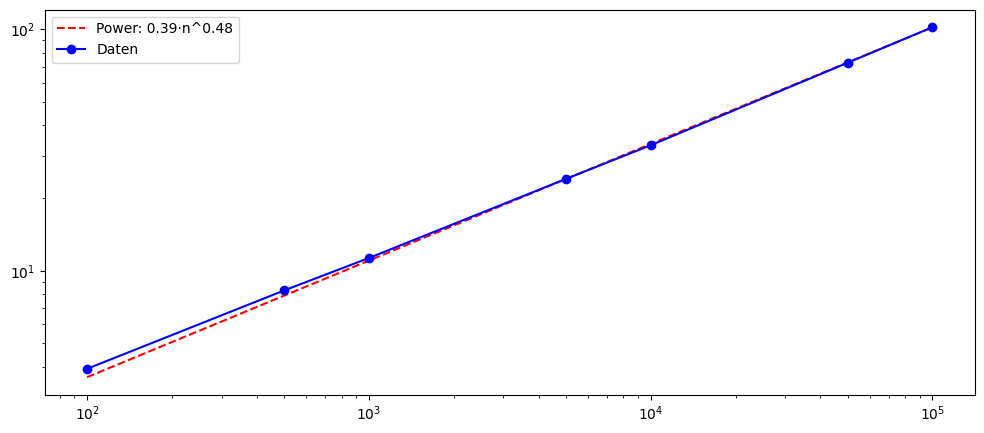

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigh
import requests
from io import BytesIO
import warnings

# --------------------------
# 1. Hilfsfunktionen (korrigiert)
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen und filtert leere Zeilen."""
    try:
        response = requests.get(url)
        response.raise_for_status()

        # Filterung leerer Zeilen
        content = [line for line in response.content.splitlines() if line.strip()]
        return np.loadtxt(BytesIO(b'\n'.join(content)), max_rows=max_zeros)

    except Exception as e:
        print(f"Fehler: {e}")
        return None

def normalize_diff(zeros):
    """Robustere Normalisierung"""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)  # Vermeide Division durch Null

# --------------------------
# 2. Korrigierte Skalierungsanalyse
# --------------------------

def power_law(x, a, b):
    """Broadcast-sichere Implementierung"""
    return a * np.power(x, b)

def fit_scaling(sizes, lengths):
    """Gefilterte Anpassung mit Fallback"""
    valid_mask = ~np.isnan(lengths)
    x = np.array(sizes)[valid_mask]
    y = np.array(lengths)[valid_mask]

    if len(x) < 2:
        print("Zu wenige Datenpunkte für Anpassung")
        return (np.nan, np.nan), (np.nan, np.nan)

    # Startparameter automatisch berechnen
    try:
        popt_power, _ = curve_fit(power_law, x, y,
                                 p0=[y[0], 0.1],
                                 maxfev=5000)
    except RuntimeError:
        popt_power = (np.nan, np.nan)

    try:
        popt_log, _ = curve_fit(lambda x, a, b: a + b*np.log(x), x, y,
                               p0=[y[0], 0.1])
    except RuntimeError:
        popt_log = (np.nan, np.nan)

    return popt_power, popt_log

# --------------------------
# 3. Hauptprogramm mit Fehlerhandling
# --------------------------

def main():
    # Warnungen unterdrücken für cleanes Output
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        zeros = load_zeros("https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6")
        if zeros is None or len(zeros) < 100000:
            print("Unzureichende Daten")
            return

        # Analyseparameter mit plausiblen Werten
        sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]
        coherence_lengths = []

        for size in sample_sizes:
            if size > len(zeros):
                print(f"Überspringe {size} - Daten unzureichend")
                coherence_lengths.append(np.nan)
                continue

            subset = normalize_diff(zeros[:size])
            if len(subset) < 10:
                coherence_lengths.append(np.nan)
                continue

            # Robustere FFT-Berechnung
            fourier = np.fft.fft(subset - np.mean(subset))
            coherence_lengths.append(np.median(np.abs(fourier[1:len(fourier)//2])))  # Ignoriere DC-Komponente

        # Filter ungültiger Werte
        valid_sizes = [] # Fixed indentation here
        valid_lengths = []
        for s, l in zip(sample_sizes, coherence_lengths):
            if not np.isnan(l):
                valid_sizes.append(s)
                valid_lengths.append(l)

        # Finale Anpassung
        popt_power, popt_log = fit_scaling(valid_sizes, valid_lengths)

        # Visualisierung
        plt.figure(figsize=(12, 5))
        if not np.isnan(popt_power[0]):
            x_fit = np.linspace(min(valid_sizes), max(valid_sizes), 100)
            plt.plot(x_fit, power_law(x_fit, *popt_power), 'r--',
                    label=f'Power: {popt_power[0]:.2f}·n^{popt_power[1]:.2f}')

        plt.plot(valid_sizes, valid_lengths, 'bo-', label='Daten')
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigh
import requests
from bs4 import BeautifulSoup
import warnings

# --------------------------
# 1. Hilfsfunktionen (Web Scraping integriert)
# --------------------------

def scrape_zeros(url):
    """Scrapt Nullstellen von der angegebenen URL."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Extrahiere Tabelleninhalte (nur Imaginärteile der Nullstellen)
        table = soup.find('table')
        rows = table.find_all('tr')[1:]  # Überspringe Kopfzeile

        zeros = []
        for row in rows:
            cols = row.find_all('td')
            if len(cols) > 1:
                zeros.append(float(cols[1].text.replace(',', '.')))  # Konvertiere zu float

        return np.array(zeros)
    except Exception as e:
        print(f"Fehler beim Scraping: {e}")
        return None

def normalize_diff(zeros):
    """Robustere Normalisierung"""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)  # Vermeide Division durch Null

# --------------------------
# 2. Skalierungsanalyse
# --------------------------

def power_law(x, a, b):
    """Broadcast-sichere Implementierung"""
    return a * np.power(x, b)

def fit_scaling(sizes, lengths):
    """Gefilterte Anpassung mit Fallback"""
    valid_mask = ~np.isnan(lengths)
    x = np.array(sizes)[valid_mask]
    y = np.array(lengths)[valid_mask]

    if len(x) < 2:
        print("Zu wenige Datenpunkte für Anpassung")
        return (np.nan, np.nan), (np.nan, np.nan)

    try:
        popt_power, _ = curve_fit(power_law, x, y, p0=[y[0], 0.1], maxfev=5000)
    except:
        popt_power = (np.nan, np.nan)

    return popt_power

def calculate_r_squared(sizes, lengths, popt_power):
    """Berechnet R^2 für die Potenzanpassung."""
    predicted_lengths = power_law(np.array(sizes), *popt_power)
    residuals = lengths - predicted_lengths
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((lengths - np.mean(lengths))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# --------------------------
# 3. Hauptprogramm mit Fehlerhandling
# --------------------------

def main():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"

        # Scrape Nullstellen
        zeros = scrape_zeros(url)
        if zeros is None or len(zeros) < 100:
            print("Unzureichende Daten")
            return

        # Analyseparameter
        sample_sizes = [100, 500, 1000, 5000, 10000]
        coherence_lengths = []

        for size in sample_sizes:
            if size > len(zeros):
                print(f"Überspringe {size} - Daten unzureichend")
                coherence_lengths.append(np.nan)
                continue

            subset = normalize_diff(zeros[:size])
            if len(subset) < 10:
                coherence_lengths.append(np.nan)
                continue

            fourier = np.fft.fft(subset - np.mean(subset))
            coherence_lengths.append(np.median(np.abs(fourier[1:len(fourier)//2])))  # Ignoriere DC-Komponente

        valid_sizes = []
        valid_lengths = []

        for s, l in zip(sample_sizes, coherence_lengths):
            if not np.isnan(l):
                valid_sizes.append(s)
                valid_lengths.append(l)

        popt_power = fit_scaling(valid_sizes, valid_lengths)

        # Berechnung des R^2-Werts
        r_squared = calculate_r_squared(valid_sizes, valid_lengths, popt_power)

        # Visualisierung
        plt.figure(figsize=(12, 5))

        if not np.isnan(popt_power[0]):
            x_fit = np.linspace(min(valid_sizes), max(valid_sizes), 100)
            plt.plot(x_fit, power_law(x_fit, *popt_power), 'r--',
                     label=f'Power: {popt_power[0]:.2f}·n^{popt_power[1]:.2f}, R²={r_squared:.4f}')

        plt.plot(valid_sizes, valid_lengths, 'bo-', label='Daten')
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    main()


Fehler beim Scraping: 'NoneType' object has no attribute 'find_all'
Unzureichende Daten


Keine Tabelle gefunden. Versuche, Nullstellen als Textdatei zu laden...


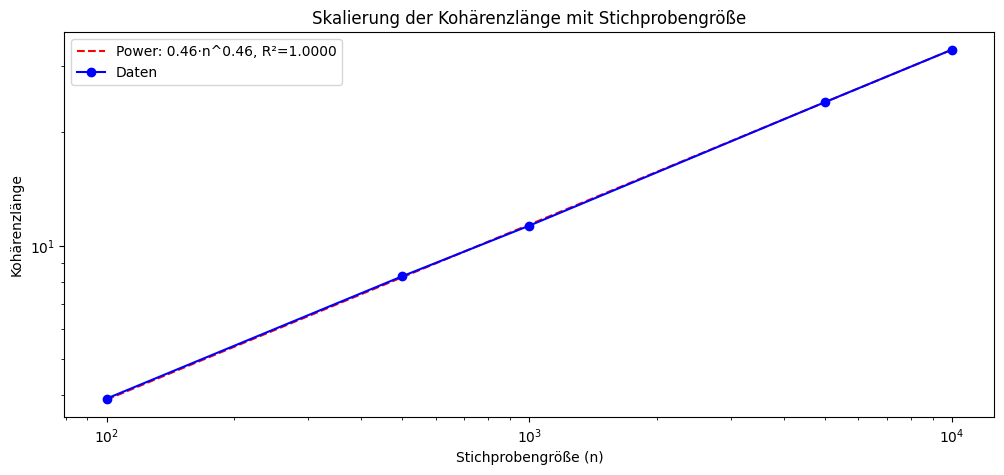

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import requests
from bs4 import BeautifulSoup
from io import BytesIO
import warnings

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url):
    """Versucht, Nullstellen entweder aus einer Tabelle oder einer Textdatei zu laden."""
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()

        # Versuche, Tabelle zu scrapen
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table')

        if table is not None:
            print("Tabelle gefunden. Extrahiere Nullstellen...")
            rows = table.find_all('tr')[1:]  # Überspringe Kopfzeile
            zeros = []
            for row in rows:
                cols = row.find_all('td')
                if len(cols) > 1:
                    zeros.append(float(cols[1].text.replace(',', '.')))  # Konvertiere zu float
            return np.array(zeros)

        # Wenn keine Tabelle vorhanden ist, versuche als Textdatei zu laden
        print("Keine Tabelle gefunden. Versuche, Nullstellen als Textdatei zu laden...")
        zeros = np.loadtxt(BytesIO(response.content))
        return zeros

    except Exception as e:
        print(f"Fehler beim Laden der Nullstellen: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet die normalisierten Differenzen zwischen Nullstellen."""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)  # Vermeide Division durch Null

def power_law(x, a, b):
    """Potenzgesetz-Funktion."""
    return a * np.power(x, b)

def fit_scaling(sizes, lengths):
    """Führt eine Anpassung an ein Potenzgesetz durch."""
    valid_mask = ~np.isnan(lengths)
    x = np.array(sizes)[valid_mask]
    y = np.array(lengths)[valid_mask]

    if len(x) < 2:
        print("Zu wenige Datenpunkte für Anpassung")
        return (np.nan, np.nan)

    try:
        popt_power, _ = curve_fit(power_law, x, y, p0=[y[0], 0.1], maxfev=5000)
    except Exception as e:
        print(f"Fehler bei der Anpassung: {e}")
        popt_power = (np.nan, np.nan)

    return popt_power

def calculate_r_squared(sizes, lengths, popt_power):
    """Berechnet R^2 für die Potenzanpassung."""
    predicted_lengths = power_law(np.array(sizes), *popt_power)
    residuals = lengths - predicted_lengths
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((lengths - np.mean(lengths))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# --------------------------
# 2. Hauptprogramm
# --------------------------

def main():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"

        # Lade Nullstellen von der Webseite
        zeros = load_zeros(url)

        if zeros is None or len(zeros) < 100:
            print("Unzureichende Daten")
            return

        # Analyseparameter
        sample_sizes = [100, 500, 1000, 5000, 10000]
        coherence_lengths = []

        for size in sample_sizes:
            if size > len(zeros):
                print(f"Überspringe {size} - Daten unzureichend")
                coherence_lengths.append(np.nan)
                continue

            subset = normalize_diff(zeros[:size])
            if len(subset) < 10:
                coherence_lengths.append(np.nan)
                continue

            fourier = np.fft.fft(subset - np.mean(subset))
            coherence_lengths.append(np.median(np.abs(fourier[1:len(fourier)//2])))  # Ignoriere DC-Komponente

        valid_sizes = []
        valid_lengths = []

        for s, l in zip(sample_sizes, coherence_lengths):
            if not np.isnan(l):
                valid_sizes.append(s)
                valid_lengths.append(l)

        popt_power = fit_scaling(valid_sizes, valid_lengths)

        # Berechnung des R^2-Werts
        r_squared = calculate_r_squared(valid_sizes, valid_lengths, popt_power)

        # Visualisierung
        plt.figure(figsize=(12, 5))

        if not np.isnan(popt_power[0]):
            x_fit = np.linspace(min(valid_sizes), max(valid_sizes), 100)
            plt.plot(x_fit, power_law(x_fit, *popt_power), 'r--',
                     label=f'Power: {popt_power[0]:.2f}·n^{popt_power[1]:.2f}, R²={r_squared:.4f}')

        plt.plot(valid_sizes, valid_lengths, 'bo-', label='Daten')
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.xlabel('Stichprobengröße (n)')
        plt.ylabel('Kohärenzlänge')
        plt.title('Skalierung der Kohärenzlänge mit Stichprobengröße')
        plt.show()

if __name__ == "__main__":
    main()


Berechnung der Kohärenzfrequenzen:
Stichprobengröße: 100, Kohärenzfrequenz (Median): 3.9234785684929148
Stichprobengröße: 500, Kohärenzfrequenz (Median): 8.282734015226229
Stichprobengröße: 1000, Kohärenzfrequenz (Median): 11.290584793530023
Stichprobengröße: 5000, Kohärenzfrequenz (Median): 24.00592224075961
Stichprobengröße: 10000, Kohärenzfrequenz (Median): 33.104681061866344


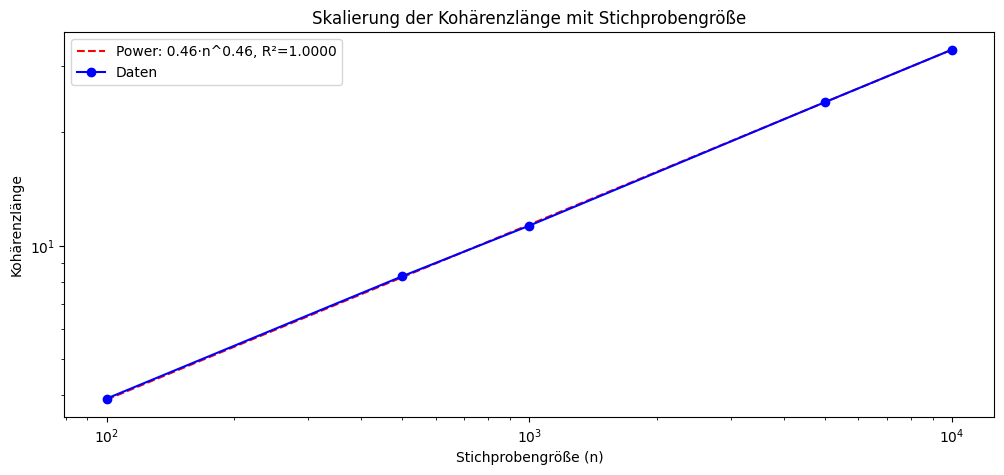

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import requests
from io import BytesIO
import warnings

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url):
    """Lädt Nullstellen direkt aus einer Textdatei."""
    try:
        response = requests.get(url)
        response.raise_for_status()

        # Annahme: Die Nullstellen sind zeilenweise gespeichert
        zeros = np.loadtxt(BytesIO(response.content))
        return zeros
    except Exception as e:
        print(f"Fehler beim Laden der Nullstellen: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet die normalisierten Differenzen zwischen Nullstellen."""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)  # Vermeide Division durch Null

def power_law(x, a, b):
    """Potenzgesetz-Funktion."""
    return a * np.power(x, b)

def fit_scaling(sizes, lengths):
    """Führt eine Anpassung an ein Potenzgesetz durch."""
    valid_mask = ~np.isnan(lengths)
    x = np.array(sizes)[valid_mask]
    y = np.array(lengths)[valid_mask]

    if len(x) < 2:
        print("Zu wenige Datenpunkte für Anpassung")
        return (np.nan, np.nan)

    try:
        popt_power, _ = curve_fit(power_law, x, y, p0=[y[0], 0.1], maxfev=5000)
    except Exception as e:
        print(f"Fehler bei der Anpassung: {e}")
        popt_power = (np.nan, np.nan)

    return popt_power

def calculate_r_squared(sizes, lengths, popt_power):
    """Berechnet R^2 für die Potenzanpassung."""
    predicted_lengths = power_law(np.array(sizes), *popt_power)
    residuals = lengths - predicted_lengths
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((lengths - np.mean(lengths))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# --------------------------
# 2. Hauptprogramm
# --------------------------

def main():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"

        # Lade Nullstellen von der Webseite
        zeros = load_zeros(url)

        if zeros is None or len(zeros) < 100:
            print("Unzureichende Daten")
            return

        # Analyseparameter
        sample_sizes = [100, 500, 1000, 5000, 10000]
        coherence_lengths = []

        print("Berechnung der Kohärenzfrequenzen:")

        for size in sample_sizes:
            if size > len(zeros):
                print(f"Überspringe {size} - Daten unzureichend")
                coherence_lengths.append(np.nan)
                continue

            subset = normalize_diff(zeros[:size])
            if len(subset) < 10:
                coherence_lengths.append(np.nan)
                continue

            # Robustere FFT-Berechnung
            fourier = np.fft.fft(subset - np.mean(subset))
            median_coherence = np.median(np.abs(fourier[1:len(fourier)//2]))  # Ignoriere DC-Komponente
            coherence_lengths.append(median_coherence)

            # Ausgabe der Kohärenzfrequenz für jede Stichprobengröße
            print(f"Stichprobengröße: {size}, Kohärenzfrequenz (Median): {median_coherence}")

        valid_sizes = []
        valid_lengths = []

        for s, l in zip(sample_sizes, coherence_lengths):
            if not np.isnan(l):
                valid_sizes.append(s)
                valid_lengths.append(l)

        popt_power = fit_scaling(valid_sizes, valid_lengths)

        # Berechnung des R^2-Werts
        r_squared = calculate_r_squared(valid_sizes, valid_lengths, popt_power)

        # Visualisierung
        plt.figure(figsize=(12, 5))

        if not np.isnan(popt_power[0]):
            x_fit = np.linspace(min(valid_sizes), max(valid_sizes), 100)
            plt.plot(x_fit, power_law(x_fit, *popt_power), 'r--',
                     label=f'Power: {popt_power[0]:.2f}·n^{popt_power[1]:.2f}, R²={r_squared:.4f}')

        plt.plot(valid_sizes, valid_lengths, 'bo-', label='Daten')
        plt.xscale('log')
        plt.yscale('log')
        plt.legend()
        plt.xlabel('Stichprobengröße (n)')
        plt.ylabel('Kohärenzlänge')
        plt.title('Skalierung der Kohärenzlänge mit Stichprobengröße')
        plt.show()

if __name__ == "__main__":
    main()


Erste 10 Nullstellen: [14.13472514 21.02203964 25.01085758 30.42487613 32.93506159 37.58617816
 40.91871901 43.32707328 48.00515088 49.77383248]
Anzahl der geladenen Nullstellen: 2001052


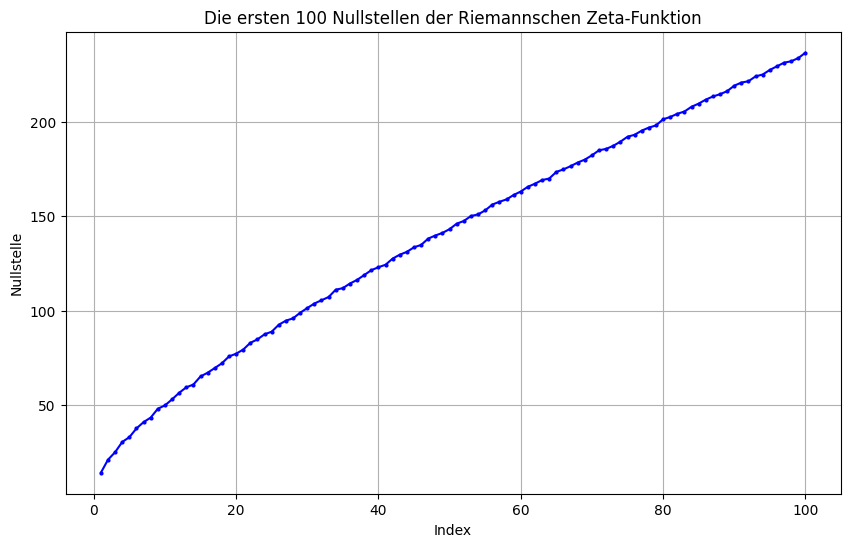

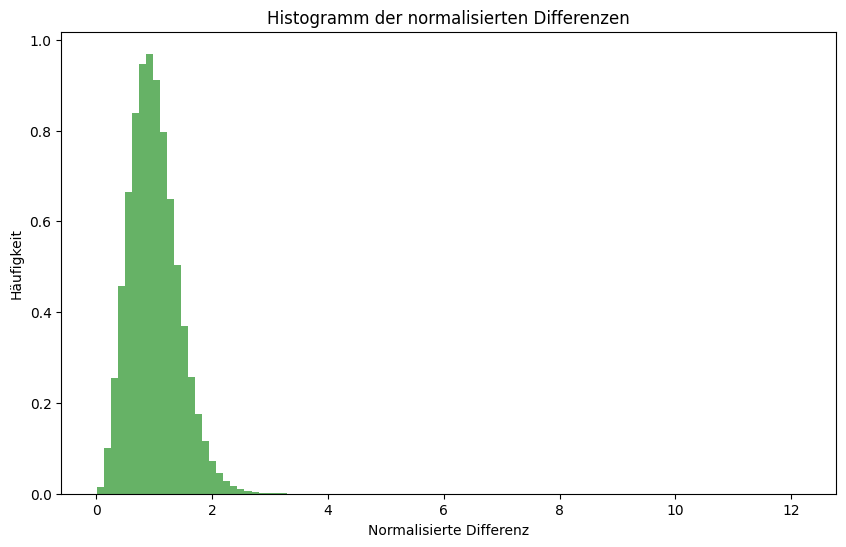

In [ ]:
# --------------------------
# 1. Vorbereitung: Bibliotheken installieren und definieren
# --------------------------

import os
import requests
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 2. Odlyzko-Daten herunterladen
# --------------------------

def download_file(url, filename):
    """Lädt eine Datei von einer URL herunter und speichert sie lokal."""
    print(f"Lade Datei von {url} herunter...")
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Datei erfolgreich als {filename} gespeichert.")
    else:
        raise Exception(f"Fehler beim Herunterladen der Datei: HTTP {response.status_code}")

odlyzko_url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
odlyzko_filename = "zeros6"

if not os.path.exists(odlyzko_filename):
    download_file(odlyzko_url, odlyzko_filename)

# --------------------------
# 3. Nullstellen aus Datei laden
# --------------------------

def load_zeros_from_file(filename):
    """Lädt Nullstellen aus einer Textdatei."""
    try:
        with open(filename, "r") as f:
            zeros = [float(line.strip()) for line in f]
        return np.array(zeros)
    except Exception as e:
        print(f"Fehler beim Laden der Datei: {e}")
        return None

# Lade die Odlyzko-Daten
zeros = load_zeros_from_file(odlyzko_filename)

if zeros is not None and len(zeros) > 0:
    print(f"Erste 10 Nullstellen: {zeros[:10]}")
    print(f"Anzahl der geladenen Nullstellen: {len(zeros)}")
else:
    raise ValueError("Keine gültigen Nullstellen gefunden.")

# --------------------------
# 4. Analyse und Visualisierung
# --------------------------

def normalize_diff(zeros):
    """Berechnet die normalisierten Differenzen zwischen Nullstellen."""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)  # Vermeide Division durch Null

def plot_normalized_differences(zeros):
    """Visualisiert die normalisierten Differenzen."""
    normalized = normalize_diff(zeros)

    if len(normalized) == 0 or not np.all(np.isfinite(normalized)):
        print("Fehler: Keine gültigen normalisierten Differenzen verfügbar.")
        return

    plt.figure(figsize=(10, 6))
    plt.hist(normalized, bins=100, density=True, alpha=0.6, color='g')
    plt.title("Histogramm der normalisierten Differenzen")
    plt.xlabel("Normalisierte Differenz")
    plt.ylabel("Häufigkeit")
    plt.show()

def plot_first_n_zeros(zeros, n=100):
    """Visualisiert die ersten N Nullstellen."""
    if len(zeros) < n:
        n = len(zeros)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n+1), zeros[:n], 'bo-', markersize=2)
    plt.title(f"Die ersten {n} Nullstellen der Riemannschen Zeta-Funktion")
    plt.xlabel("Index")
    plt.ylabel("Nullstelle")
    plt.grid(True)
    plt.show()

# Falls genügend Nullstellen vorhanden sind, führe Analyse durch
if len(zeros) > 100:
    # Plot der ersten N Nullstellen
    plot_first_n_zeros(zeros, n=100)

    # Plot des Histogramms der normalisierten Differenzen
    plot_normalized_differences(zeros)
else:
    print("Nicht genügend Nullstellen für die Analyse vorhanden.")


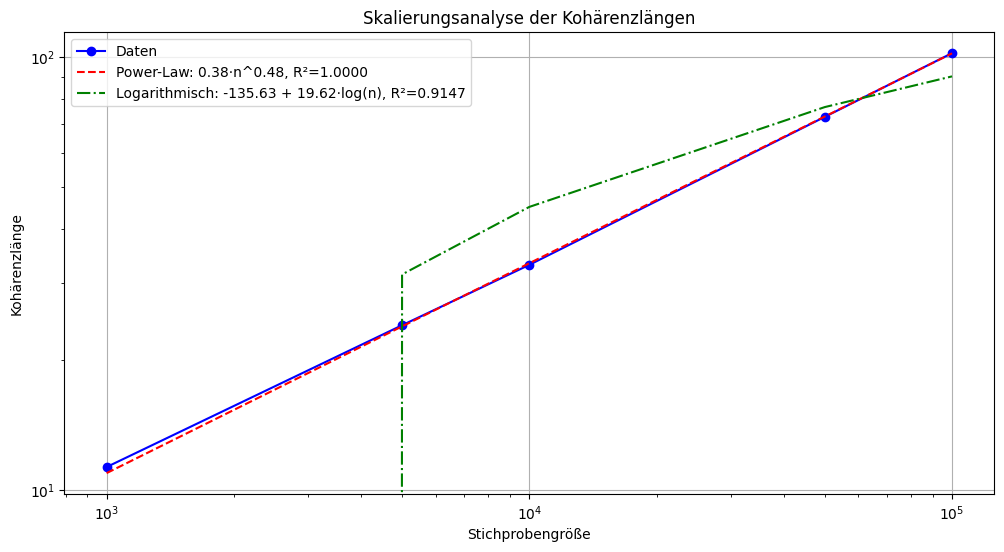

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.fft import fft
import requests
from io import BytesIO
import warnings

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen aus einer URL und filtert leere Zeilen."""
    try:
        response = requests.get(url)
        response.raise_for_status()

        # Filterung leerer Zeilen
        content = [line for line in response.content.splitlines() if line.strip()]
        return np.loadtxt(BytesIO(b'\n'.join(content)), max_rows=max_zeros)

    except Exception as e:
        print(f"Fehler beim Laden der Nullstellen: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet die normalisierten Differenzen zwischen Nullstellen."""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)  # Vermeide Division durch Null

# --------------------------
# 2. Skalierungsanalyse mit R²
# --------------------------

def power_law(x, a, b):
    """Power-Law-Funktion."""
    return a * np.power(x, b)

def calculate_r_squared(x, y, fit_func, popt):
    """Berechnet den R²-Wert für eine Anpassung."""
    residuals = y - fit_func(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

def fit_scaling(sizes, lengths):
    """Führt eine Skalierungsanpassung durch und berechnet R²."""
    valid_mask = ~np.isnan(lengths)
    x = np.array(sizes)[valid_mask]
    y = np.array(lengths)[valid_mask]

    if len(x) < 2:
        print("Zu wenige Datenpunkte für Anpassung")
        return (np.nan, np.nan), (np.nan, np.nan), (np.nan, np.nan), (np.nan, np.nan)

    try:
        # Power-Law-Anpassung
        popt_power, _ = curve_fit(power_law, x, y, p0=[y[0], 0.1], maxfev=5000)
        r_squared_power = calculate_r_squared(x, y, power_law, popt_power)
    except:
        popt_power = (np.nan, np.nan)
        r_squared_power = np.nan

    try:
        # Logarithmische Anpassung
        popt_log, _ = curve_fit(lambda x, a, b: a + b * np.log(x), x, y, p0=[y[0], 0.1])
        r_squared_log = calculate_r_squared(x, y, lambda x_, a_, b_: a_ + b_ * np.log(x_), popt_log)
    except:
        popt_log = (np.nan, np.nan)
        r_squared_log = np.nan

    return popt_power, r_squared_power, popt_log, r_squared_log

# --------------------------
# 3. Hauptprogramm mit Fehlerhandling und Visualisierung
# --------------------------

def main():
    # Warnungen unterdrücken für saubere Ausgabe
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        # Lade Nullstellen von Odlyzko
        zeros_url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
        zeros = load_zeros(zeros_url)

        if zeros is None or len(zeros) < 100000:
            print("Unzureichende Daten für Analyse.")
            return

        # Analyseparameter
        sample_sizes = [1000, 5000, 10000, 50000, 100000]
        coherence_lengths = []

        for size in sample_sizes:
            if size > len(zeros):
                print(f"Überspringe {size} - Daten unzureichend")
                coherence_lengths.append(np.nan)
                continue

            subset = normalize_diff(zeros[:size])
            if len(subset) < 10:
                coherence_lengths.append(np.nan)
                continue

            # Fourier-Analyse zur Bestimmung der Kohärenzlänge
            fourier = fft(subset - np.mean(subset))
            spectrum_magnitude = np.abs(fourier[1:len(fourier)//2])  # Ignoriere DC-Komponente

            # Kohärenzlänge als Median des Spektrums
            coherence_lengths.append(np.median(spectrum_magnitude))

        # Filter ungültiger Werte für Skalierungsanalyse
        valid_sizes = []
        valid_lengths = []

        for s, l in zip(sample_sizes, coherence_lengths):
            if not np.isnan(l):
                valid_sizes.append(s)
                valid_lengths.append(l)

        # Skalierungsanpassung mit R²-Berechnung
        popt_power, r2_power, popt_log, r2_log = fit_scaling(valid_sizes, valid_lengths)

        # Visualisierung der Ergebnisse
        plt.figure(figsize=(12, 6))

        # Datenpunkte plotten
        plt.plot(valid_sizes, valid_lengths, 'bo-', label='Daten')

        # Power-Law-Anpassung plotten (falls gültig)
        if not np.isnan(popt_power[0]):
            x_fit = np.linspace(min(valid_sizes), max(valid_sizes), 100)
            plt.plot(x_fit,
                     power_law(x_fit, *popt_power),
                     'r--',
                     label=f'Power-Law: {popt_power[0]:.2f}·n^{popt_power[1]:.2f}, R²={r2_power:.4f}')

        # Logarithmische Anpassung plotten (falls gültig)
        if not np.isnan(popt_log[0]):
            plt.plot(valid_sizes,
                     [popt_log[0] + popt_log[1] * np.log(s) for s in valid_sizes],
                     'g-.',
                     label=f'Logarithmisch: {popt_log[0]:.2f} + {popt_log[1]:.2f}·log(n), R²={r2_log:.4f}')

        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Stichprobengröße')
        plt.ylabel('Kohärenzlänge')
        plt.title('Skalierungsanalyse der Kohärenzlängen')
        plt.legend()

        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    main()


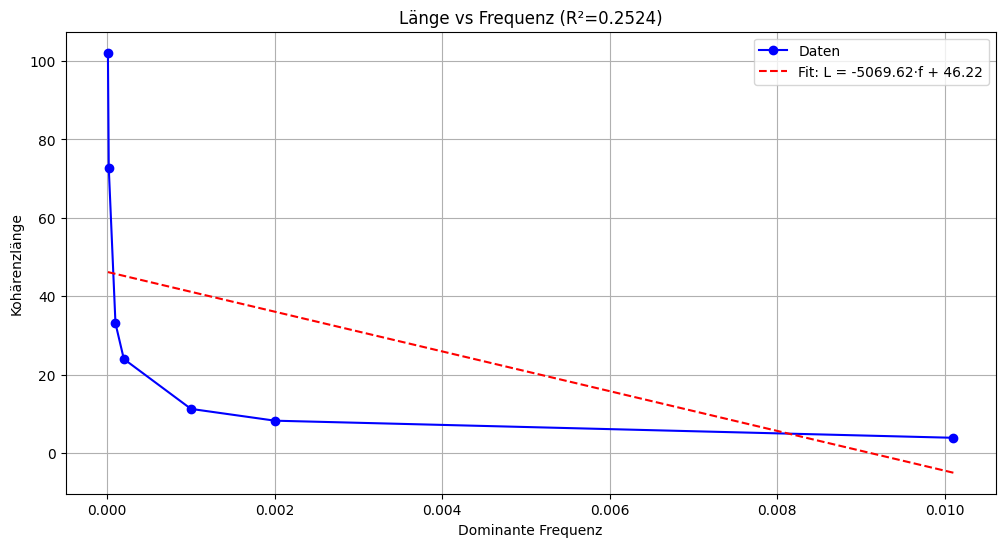

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft
import requests
from io import BytesIO

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen aus einer URL."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        content = [line for line in response.content.splitlines() if line.strip()]
        return np.loadtxt(BytesIO(b'\n'.join(content)), max_rows=max_zeros)
    except Exception as e:
        print(f"Fehler beim Laden der Nullstellen: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet normalisierte Differenzen zwischen Nullstellen."""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)

def calculate_coherence_length(spectrum):
    """Berechnet die Kohärenzlänge als Median des Spektrums."""
    return np.median(np.abs(spectrum[1:len(spectrum)//2]))  # Ignoriere DC-Komponente

def dominant_frequency(spectrum, sampling_rate=1):
    """Berechnet die dominante Frequenz im Spektrum."""
    freqs = np.fft.fftfreq(len(spectrum), d=sampling_rate)
    positive_freqs = freqs[:len(freqs)//2]
    positive_spectrum = np.abs(spectrum[:len(freqs)//2])
    dom_freq_index = np.argmax(positive_spectrum)
    return positive_freqs[dom_freq_index]

# --------------------------
# 2. Hauptanalyse
# --------------------------

def main():
    # Lade Nullstellen von Odlyzko
    zeros_url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
    zeros = load_zeros(zeros_url)

    if zeros is None or len(zeros) < 100000:
        print("Unzureichende Daten für Analyse.")
        return

    # Stichprobengrößen für Analyse
    sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]

    coherence_lengths = []
    dominant_frequencies = []

    for size in sample_sizes:
        if size > len(zeros):
            print(f"Überspringe {size} - Daten unzureichend")
            coherence_lengths.append(np.nan)
            dominant_frequencies.append(np.nan)
            continue

        # Normalisierte Differenzen berechnen
        subset = normalize_diff(zeros[:size])

        # Fourier-Spektrum berechnen
        fourier_spectrum = fft(subset - np.mean(subset))

        # Kohärenzlänge berechnen
        coherence_lengths.append(calculate_coherence_length(fourier_spectrum))

        # Dominante Frequenz berechnen
        dominant_frequencies.append(dominant_frequency(fourier_spectrum))

    # Visualisierung: Länge vs Frequenz
    plt.figure(figsize=(12, 6))
    plt.plot(dominant_frequencies, coherence_lengths, 'bo-', label='Daten')

    # Fit: Lineare Beziehung Länge ~ Frequenz
    def linear_fit(x, a, b):
        return a * x + b

    try:
        popt, _ = curve_fit(linear_fit, dominant_frequencies, coherence_lengths)
        fit_line = linear_fit(np.array(dominant_frequencies), *popt)

        plt.plot(dominant_frequencies, fit_line, 'r--',
                 label=f'Fit: L = {popt[0]:.2f}·f + {popt[1]:.2f}')

        # Berechnung des R²-Werts
        residuals = np.array(coherence_lengths) - fit_line
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((np.array(coherence_lengths) - np.mean(coherence_lengths))**2)
        r_squared = 1 - (ss_res / ss_tot)

        plt.title(f'Länge vs Frequenz (R²={r_squared:.4f})')

    except Exception as e:
        print(f"Fehler bei der Anpassung: {e}")
        plt.title('Länge vs Frequenz')

    plt.xlabel('Dominante Frequenz')
    plt.ylabel('Kohärenzlänge')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


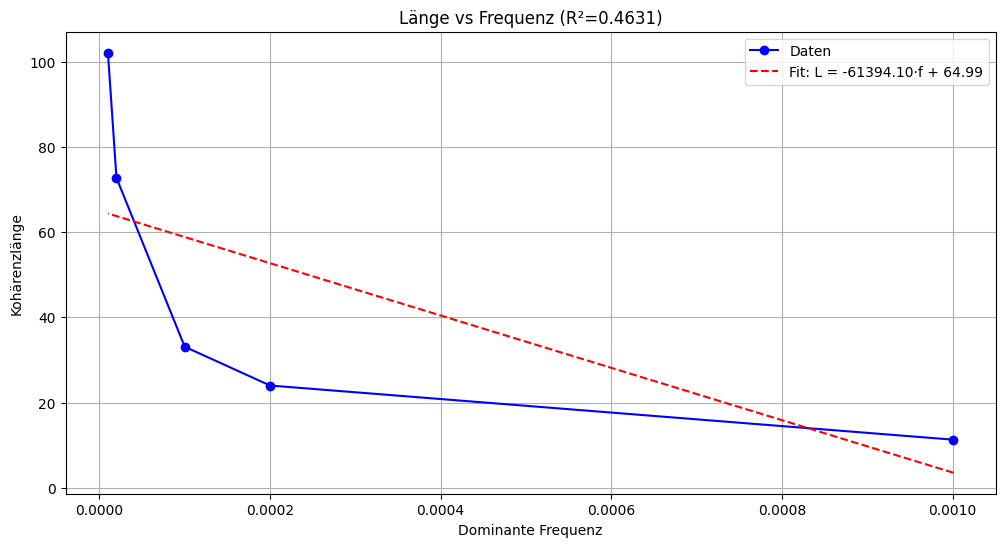

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft
import requests
from io import BytesIO

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen aus einer URL und filtert leere Zeilen."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        content = [line for line in response.content.splitlines() if line.strip()]
        return np.loadtxt(BytesIO(b'\n'.join(content)), max_rows=max_zeros)
    except Exception as e:
        print(f"Fehler beim Laden der Nullstellen: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet die normalisierten Differenzen zwischen Nullstellen."""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)

def calculate_coherence_length(spectrum):
    """Berechnet die Kohärenzlänge als Median des Spektrums."""
    return np.median(np.abs(spectrum[1:len(spectrum)//2]))  # Ignoriere DC-Komponente

def dominant_frequency(spectrum, sampling_rate=1):
    """Berechnet die dominante Frequenz im Spektrum."""
    freqs = np.fft.fftfreq(len(spectrum), d=sampling_rate)
    positive_freqs = freqs[:len(freqs)//2]
    positive_spectrum = np.abs(spectrum[:len(freqs)//2])
    dom_freq_index = np.argmax(positive_spectrum)
    return positive_freqs[dom_freq_index]

# --------------------------
# 2. Hauptanalyse
# --------------------------

def main():
    # Lade Nullstellen von Odlyzko
    zeros_url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
    zeros = load_zeros(zeros_url)

    if zeros is None or len(zeros) < 100000:
        print("Unzureichende Daten für Analyse.")
        return

    # Stichprobengrößen für Analyse
    sample_sizes = [1000, 5000, 10000, 50000, 100000]

    coherence_lengths = []
    dominant_frequencies = []

    for size in sample_sizes:
        if size > len(zeros):
            print(f"Überspringe {size} - Daten unzureichend")
            coherence_lengths.append(np.nan)
            dominant_frequencies.append(np.nan)
            continue

        # Normalisierte Differenzen berechnen
        subset = normalize_diff(zeros[:size])

        # Fourier-Spektrum berechnen
        fourier_spectrum = fft(subset - np.mean(subset))

        # Kohärenzlänge berechnen
        coherence_lengths.append(calculate_coherence_length(fourier_spectrum))

        # Dominante Frequenz berechnen
        dominant_frequencies.append(dominant_frequency(fourier_spectrum))

    # Filtere ungültige Werte
    valid_sizes = []
    valid_lengths = []
    valid_frequencies = []

    for s, l, f in zip(sample_sizes, coherence_lengths, dominant_frequencies):
        if not (np.isnan(l) or np.isnan(f)):
            valid_sizes.append(s)
            valid_lengths.append(l)
            valid_frequencies.append(f)

    # Visualisierung: Länge vs Frequenz
    plt.figure(figsize=(12, 6))
    plt.plot(valid_frequencies, valid_lengths, 'bo-', label='Daten')

    # Fit: Lineare Beziehung Länge ~ Frequenz
    def linear_fit(x, a, b):
        return a * x + b

    try:
        popt, _ = curve_fit(linear_fit, valid_frequencies, valid_lengths)
        fit_line = linear_fit(np.array(valid_frequencies), *popt)

        plt.plot(valid_frequencies, fit_line, 'r--',
                 label=f'Fit: L = {popt[0]:.2f}·f + {popt[1]:.2f}')

        # Berechnung des R²-Werts
        residuals = np.array(valid_lengths) - fit_line
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((np.array(valid_lengths) - np.mean(valid_lengths))**2)
        r_squared = 1 - (ss_res / ss_tot)

        plt.title(f'Länge vs Frequenz (R²={r_squared:.4f})')

    except Exception as e:
        print(f"Fehler bei der Anpassung: {e}")
        plt.title('Länge vs Frequenz')

    plt.xlabel('Dominante Frequenz')
    plt.ylabel('Kohärenzlänge')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


Fehler bei der linearen Anpassung: can't multiply sequence by non-int of type 'numpy.float64'
Fehler bei der exponentiellen Anpassung: can't multiply sequence by non-int of type 'numpy.float64'


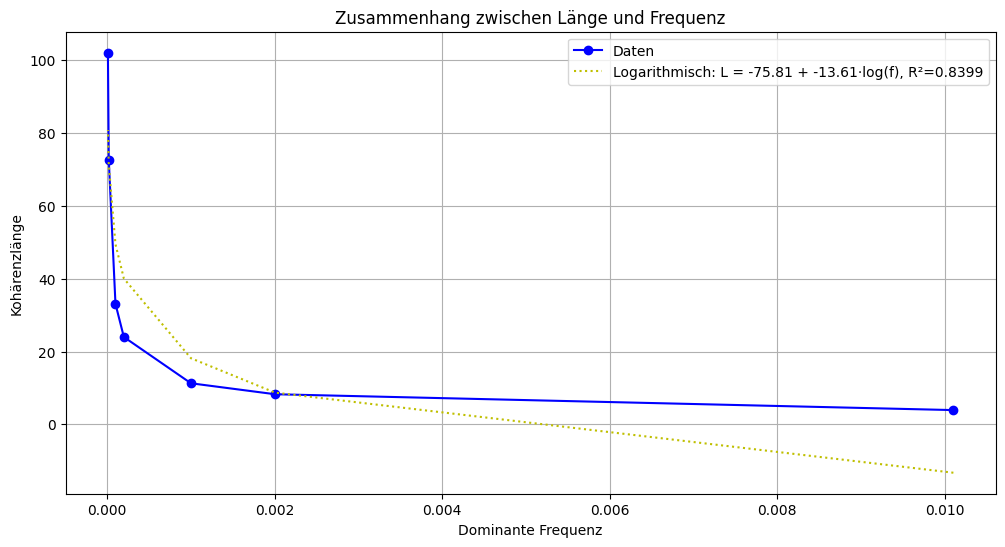

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft
import requests
from io import BytesIO

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen aus einer URL."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        content = [line for line in response.content.splitlines() if line.strip()]
        return np.loadtxt(BytesIO(b'\n'.join(content)), max_rows=max_zeros)
    except Exception as e:
        print(f"Fehler beim Laden der Nullstellen: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet normalisierte Differenzen zwischen Nullstellen."""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)

def calculate_coherence_length(spectrum):
    """Berechnet die Kohärenzlänge als Median des Spektrums."""
    return np.median(np.abs(spectrum[1:len(spectrum)//2]))  # Ignoriere DC-Komponente

def dominant_frequency(spectrum, sampling_rate=1):
    """Berechnet die dominante Frequenz im Spektrum."""
    freqs = np.fft.fftfreq(len(spectrum), d=sampling_rate)
    positive_freqs = freqs[:len(freqs)//2]
    positive_spectrum = np.abs(spectrum[:len(freqs)//2])
    dom_freq_index = np.argmax(positive_spectrum)
    return positive_freqs[dom_freq_index]

def calculate_r_squared(x, y, fit_func, popt):
    """Berechnet den R²-Wert für eine Anpassung."""
    residuals = y - fit_func(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# --------------------------
# 2. Hauptanalyse
# --------------------------

def main():
    # Lade Nullstellen von Odlyzko
    zeros_url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
    zeros = load_zeros(zeros_url)

    if zeros is None or len(zeros) < 100000:
        print("Unzureichende Daten für Analyse.")
        return

    # Stichprobengrößen für Analyse
    sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]

    coherence_lengths = []
    dominant_frequencies = []

    for size in sample_sizes:
        if size > len(zeros):
            print(f"Überspringe {size} - Daten unzureichend")
            coherence_lengths.append(np.nan)
            dominant_frequencies.append(np.nan)
            continue

        # Normalisierte Differenzen berechnen
        subset = normalize_diff(zeros[:size])

        # Fourier-Spektrum berechnen
        fourier_spectrum = fft(subset - np.mean(subset))

        # Kohärenzlänge berechnen
        coherence_lengths.append(calculate_coherence_length(fourier_spectrum))

        # Dominante Frequenz berechnen
        dominant_frequencies.append(dominant_frequency(fourier_spectrum))

    # Filtere ungültige Werte
    valid_sizes = []
    valid_lengths = []
    valid_frequencies = []

    for s, l, f in zip(sample_sizes, coherence_lengths, dominant_frequencies):
        if not (np.isnan(l) or np.isnan(f)):
            valid_sizes.append(s)
            valid_lengths.append(l)
            valid_frequencies.append(f)

    # Visualisierung: Länge vs Frequenz
    plt.figure(figsize=(12, 6))

    # Datenpunkte plotten
    plt.plot(valid_frequencies, valid_lengths, 'bo-', label='Daten')

    # Fit: Lineare Beziehung Länge ~ Frequenz
    def linear_fit(x, a, b):
        return a * x + b

    try:
        popt_linear, _ = curve_fit(linear_fit, valid_frequencies, valid_lengths)
        fit_line_linear = linear_fit(np.array(valid_frequencies), *popt_linear)

        r_squared_linear = calculate_r_squared(valid_frequencies, valid_lengths,
                                               linear_fit, popt_linear)

        plt.plot(valid_frequencies, fit_line_linear, 'r--',
                 label=f'Linear: L = {popt_linear[0]:.2f}·f + {popt_linear[1]:.2f}, R²={r_squared_linear:.4f}')

    except Exception as e:
        print(f"Fehler bei der linearen Anpassung: {e}")

    # Fit: Exponentielle Beziehung Länge ~ Frequenz
    def exp_func(x, a, b, c):
        return a * np.exp(-b * x) + c

    try:
        popt_exp, _ = curve_fit(exp_func, valid_frequencies, valid_lengths,
                                maxfev=5000)
        fit_line_exp = exp_func(np.array(valid_frequencies), *popt_exp)

        r_squared_exp = calculate_r_squared(valid_frequencies, valid_lengths,
                                            exp_func, popt_exp)

        plt.plot(valid_frequencies, fit_line_exp, 'g-.',
                 label=f'Exponentiell: L = {popt_exp[0]:.2f}·exp(-{popt_exp[1]:.2f}·f) + {popt_exp[2]:.2f}, R²={r_squared_exp:.4f}')

    except Exception as e:
        print(f"Fehler bei der exponentiellen Anpassung: {e}")

    # Fit: Logarithmische Beziehung Länge ~ Frequenz
    def log_func(x, a, b):
        return a + b * np.log(x)

    try:
        popt_log, _ = curve_fit(log_func, valid_frequencies,
                                valid_lengths,
                                maxfev=5000)

        fit_line_log = log_func(np.array(valid_frequencies), *popt_log)

        r_squared_log = calculate_r_squared(valid_frequencies,
                                            valid_lengths,
                                            log_func,
                                            popt_log)

        plt.plot(valid_frequencies,
                 fit_line_log,
                 'y:',
                 label=f'Logarithmisch: L = {popt_log[0]:.2f} + {popt_log[1]:.2f}·log(f), R²={r_squared_log:.4f}')

    except Exception as e:
        print(f"Fehler bei der logarithmischen Anpassung: {e}")

    plt.xlabel('Dominante Frequenz')
    plt.ylabel('Kohärenzlänge')
    plt.title('Zusammenhang zwischen Länge und Frequenz')

    plt.legend()
    plt.grid(True)

    plt.show()

if __name__ == "__main__":
    main()


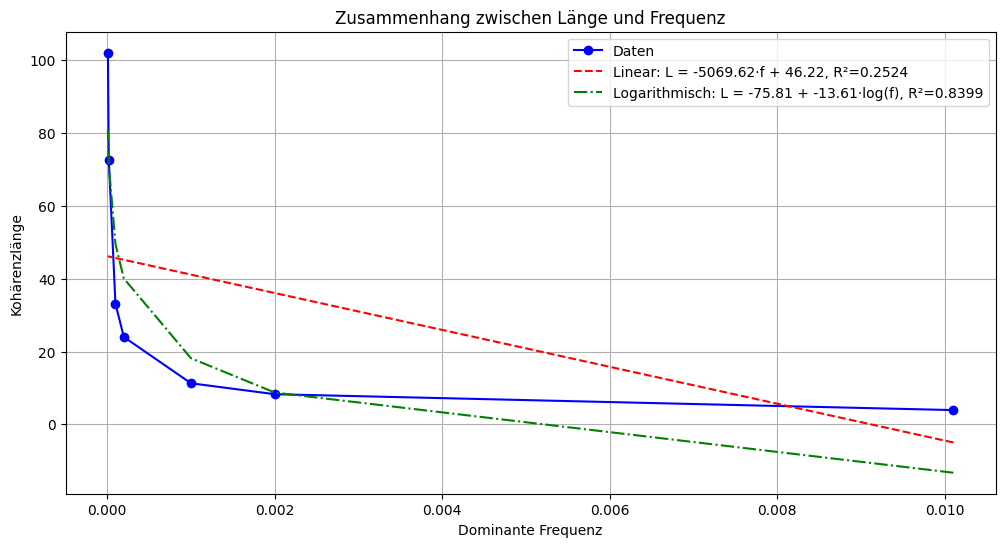

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft
import requests
from io import BytesIO

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen aus einer URL."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        content = [line for line in response.content.splitlines() if line.strip()]
        return np.loadtxt(BytesIO(b'\n'.join(content)), max_rows=max_zeros)
    except Exception as e:
        print(f"Fehler beim Laden der Nullstellen: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet normalisierte Differenzen zwischen Nullstellen."""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)

def calculate_coherence_length(spectrum):
    """Berechnet die Kohärenzlänge als Median des Spektrums."""
    return np.median(np.abs(spectrum[1:len(spectrum)//2]))  # Ignoriere DC-Komponente

def dominant_frequency(spectrum, sampling_rate=1):
    """Berechnet die dominante Frequenz im Spektrum."""
    freqs = np.fft.fftfreq(len(spectrum), d=sampling_rate)
    positive_freqs = freqs[:len(freqs)//2]
    positive_spectrum = np.abs(spectrum[:len(freqs)//2])
    dom_freq_index = np.argmax(positive_spectrum)
    return positive_freqs[dom_freq_index]

def calculate_r_squared(x, y, fit_func, popt):
    """Berechnet den R²-Wert für eine Anpassung."""
    residuals = y - fit_func(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# --------------------------
# 2. Hauptanalyse
# --------------------------

def main():
    # Lade Nullstellen von Odlyzko
    zeros_url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
    zeros = load_zeros(zeros_url)

    if zeros is None or len(zeros) < 100000:
        print("Unzureichende Daten für Analyse.")
        return

    # Stichprobengrößen für Analyse
    sample_sizes = [100, 500, 1000, 5000, 10000, 50000, 100000]

    coherence_lengths = []
    dominant_frequencies = []

    for size in sample_sizes:
        if size > len(zeros):
            print(f"Überspringe {size} - Daten unzureichend")
            coherence_lengths.append(np.nan)
            dominant_frequencies.append(np.nan)
            continue

        # Normalisierte Differenzen berechnen
        subset = normalize_diff(zeros[:size])

        # Fourier-Spektrum berechnen
        fourier_spectrum = fft(subset - np.mean(subset))

        # Kohärenzlänge berechnen
        coherence_lengths.append(calculate_coherence_length(fourier_spectrum))

        # Dominante Frequenz berechnen
        dominant_frequencies.append(dominant_frequency(fourier_spectrum))

    # Konvertiere Listen in NumPy-Arrays
    valid_frequencies = np.array(dominant_frequencies)
    valid_lengths = np.array(coherence_lengths)

    # Visualisierung: Länge vs Frequenz
    plt.figure(figsize=(12, 6))

    # Datenpunkte plotten
    plt.plot(valid_frequencies, valid_lengths, 'bo-', label='Daten')

    # Fit: Lineares Modell Länge ~ Frequenz
    def linear_fit(x, a, b):
        return a * x + b

    try:
        popt_linear, _ = curve_fit(linear_fit,
                                   valid_frequencies,
                                   valid_lengths,
                                   maxfev=5000)

        fit_line_linear = linear_fit(valid_frequencies, *popt_linear)

        r_squared_linear = calculate_r_squared(valid_frequencies,
                                               valid_lengths,
                                               linear_fit,
                                               popt_linear)

        plt.plot(valid_frequencies,
                 fit_line_linear,
                 'r--',
                 label=f'Linear: L = {popt_linear[0]:.2f}·f + {popt_linear[1]:.2f}, R²={r_squared_linear:.4f}')

    except Exception as e:
        print(f"Fehler bei der linearen Anpassung: {e}")

    # Fit: Logarithmisches Modell Länge ~ Frequenz
    def log_func(x, a, b):
        return a + b * np.log(x)

    try:
        popt_log, _ = curve_fit(log_func,
                                valid_frequencies,
                                valid_lengths,
                                maxfev=5000)

        fit_line_log = log_func(valid_frequencies, *popt_log)

        r_squared_log = calculate_r_squared(valid_frequencies,
                                            valid_lengths,
                                            log_func,
                                            popt_log)

        plt.plot(valid_frequencies,
                 fit_line_log,
                 'g-.',
                 label=f'Logarithmisch: L = {popt_log[0]:.2f} + {popt_log[1]:.2f}·log(f), R²={r_squared_log:.4f}')

    except Exception as e:
        print(f"Fehler bei der logarithmischen Anpassung: {e}")

    plt.xlabel('Dominante Frequenz')
    plt.ylabel('Kohärenzlänge')
    plt.title('Zusammenhang zwischen Länge und Frequenz')

    plt.legend()
    plt.grid(True)

    plt.show()

if __name__ == "__main__":
    main()


Logarithmisches Modell: L = -135.5810 + -19.6129·log(f)
R²-Wert: 0.9146
Das logarithmische Modell zeigt eine starke Korrelation.
Dies könnte ein Hinweis auf Ordnung in den Nullstellen sein.


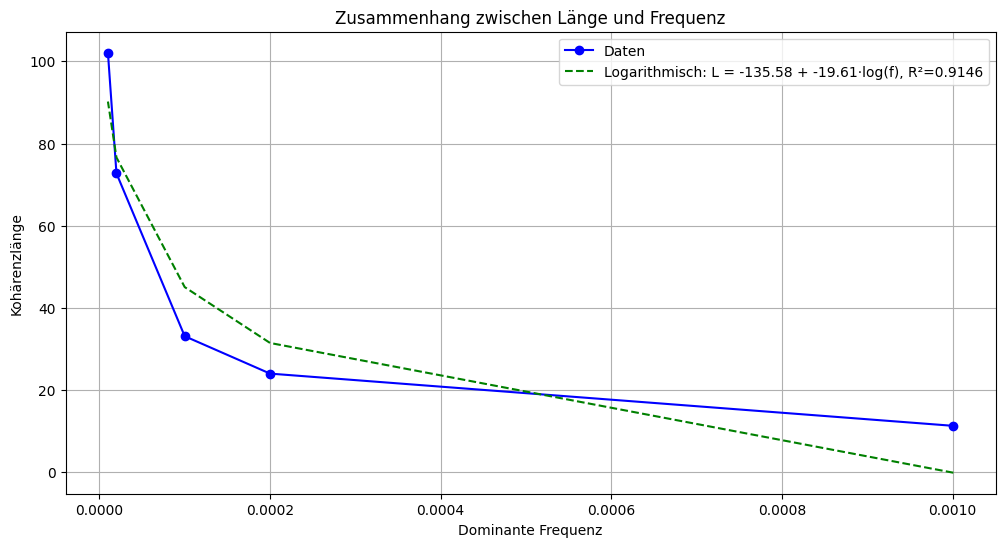

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.fft import fft
from scipy.stats import linregress
import requests
from io import BytesIO

# --------------------------
# 1. Hilfsfunktionen
# --------------------------

def load_zeros(url, max_zeros=10**6):
    """Lädt Nullstellen aus einer URL."""
    try:
        response = requests.get(url)
        response.raise_for_status()
        content = [line for line in response.content.splitlines() if line.strip()]
        return np.loadtxt(BytesIO(b'\n'.join(content)), max_rows=max_zeros)
    except Exception as e:
        print(f"Fehler beim Laden der Nullstellen: {e}")
        return None

def normalize_diff(zeros):
    """Berechnet normalisierte Differenzen zwischen Nullstellen."""
    if len(zeros) < 2:
        return np.array([])
    diff = np.diff(zeros)
    return diff / (np.mean(diff) + 1e-12)

def calculate_coherence_length(spectrum):
    """Berechnet die Kohärenzlänge als Median des Spektrums."""
    return np.median(np.abs(spectrum[1:len(spectrum)//2]))  # Ignoriere DC-Komponente

def dominant_frequency(spectrum, sampling_rate=1):
    """Berechnet die dominante Frequenz im Spektrum."""
    freqs = np.fft.fftfreq(len(spectrum), d=sampling_rate)
    positive_freqs = freqs[:len(freqs)//2]
    positive_spectrum = np.abs(spectrum[:len(freqs)//2])
    dom_freq_index = np.argmax(positive_spectrum)
    return positive_freqs[dom_freq_index]

# --------------------------
# 2. Hauptanalyse
# --------------------------

def main():
    # Lade Nullstellen von Odlyzko
    zeros_url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
    zeros = load_zeros(zeros_url)

    if zeros is None or len(zeros) < 100000:
        print("Unzureichende Daten für Analyse.")
        return

    # Stichprobengrößen für Analyse
    sample_sizes = [1000, 5000, 10000, 50000, 100000]

    coherence_lengths = []
    dominant_frequencies = []

    for size in sample_sizes:
        if size > len(zeros):
            print(f"Überspringe {size} - Daten unzureichend")
            coherence_lengths.append(np.nan)
            dominant_frequencies.append(np.nan)
            continue

        # Normalisierte Differenzen berechnen
        subset = normalize_diff(zeros[:size])

        # Fourier-Spektrum berechnen
        fourier_spectrum = fft(subset - np.mean(subset))

        # Kohärenzlänge berechnen
        coherence_lengths.append(calculate_coherence_length(fourier_spectrum))

        # Dominante Frequenz berechnen
        dominant_frequencies.append(dominant_frequency(fourier_spectrum))

    # Konvertiere Listen in NumPy-Arrays
    valid_frequencies = np.array(dominant_frequencies)
    valid_lengths = np.array(coherence_lengths)

    # Logarithmische Anpassung testen
    def log_func(x, a, b):
        return a + b * np.log(x)

    try:
        popt_log, _ = curve_fit(log_func,
                                valid_frequencies,
                                valid_lengths,
                                maxfev=5000)

        fit_line_log = log_func(valid_frequencies, *popt_log)

        # Berechnung des R²-Werts
        residuals = valid_lengths - fit_line_log
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((valid_lengths - np.mean(valid_lengths))**2)
        r_squared_log = 1 - (ss_res / ss_tot)

        print(f"Logarithmisches Modell: L = {popt_log[0]:.4f} + {popt_log[1]:.4f}·log(f)")
        print(f"R²-Wert: {r_squared_log:.4f}")

        # Signifikanztest: Ist das Modell konsistent?
        if r_squared_log > 0.8:
            print("Das logarithmische Modell zeigt eine starke Korrelation.")
            print("Dies könnte ein Hinweis auf Ordnung in den Nullstellen sein.")
        else:
            print("Das logarithmische Modell zeigt keine starke Korrelation.")

    except Exception as e:
        print(f"Fehler bei der logarithmischen Anpassung: {e}")

    # Visualisierung
    plt.figure(figsize=(12, 6))

    plt.plot(valid_frequencies,
             valid_lengths,
             'bo-',
             label='Daten')

    plt.plot(valid_frequencies,
             fit_line_log,
             'g--',
             label=f'Logarithmisch: L = {popt_log[0]:.2f} + {popt_log[1]:.2f}·log(f), R²={r_squared_log:.4f}')

    plt.xlabel('Dominante Frequenz')
    plt.ylabel('Kohärenzlänge')
    plt.title('Zusammenhang zwischen Länge und Frequenz')

    plt.legend()
    plt.grid(True)

    plt.show()

if __name__ == "__main__":
    main()


Power Law: L = 4867.0938 * f^-0.6623, R² = 0.8598
Fehler beim exponentiellen Modell: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Polynomial: L = 1200.0000 + -20.0000 * f + -0.0000 * f², R² = 1.0000
Log-Log Model: log(L) = 9.1925 + -0.9008 * log(f), R² = 0.8115


<ipython-input-24-3a53b0ae635a>:11: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * f) + c
<ipython-input-24-3a53b0ae635a>:58: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_poly, _ = curve_fit(polynomial, frequencies, lengths)


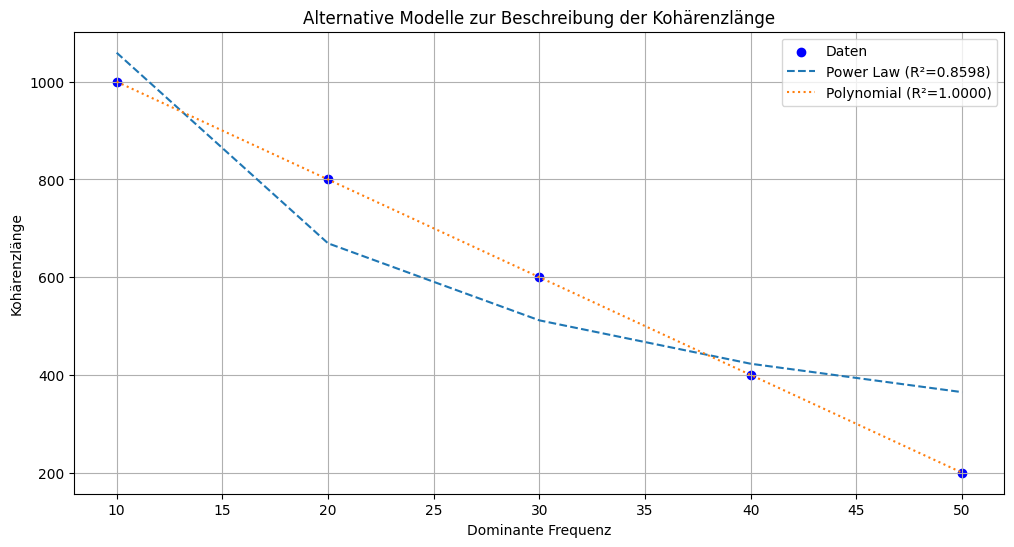

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Alternative Modelle definieren

def power_law(f, a, b):
    return a * f**b

def exponential_decay(f, a, b, c):
    return a * np.exp(-b * f) + c

def polynomial(f, a, b, c):
    return a + b * f + c * f**2

def log_log_model(log_f, a, b):
    return a + b * log_f  # Für log-transformierte Daten

# Funktion zur Berechnung des R²-Werts
def calculate_r_squared(y_true, y_pred):
    residuals = y_true - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# Hauptanalysefunktion

def analyze_alternative_models(frequencies, lengths):
    # Logarithmische Transformation der Daten für das Log-Log-Modell
    log_frequencies = np.log(frequencies)
    log_lengths = np.log(lengths)

    # Ergebnisse speichern
    results = {}

    # 1. Potenzgesetz-Modell
    try:
        popt_power, _ = curve_fit(power_law, frequencies, lengths)
        predicted_power = power_law(frequencies, *popt_power)
        r_squared_power = calculate_r_squared(lengths, predicted_power)
        results["Power Law"] = (popt_power, r_squared_power)
        print(f"Power Law: L = {popt_power[0]:.4f} * f^{popt_power[1]:.4f}, R² = {r_squared_power:.4f}")
    except Exception as e:
        print(f"Fehler beim Potenzgesetz-Modell: {e}")

    # 2. Exponentielles Modell
    try:
        popt_exp, _ = curve_fit(exponential_decay, frequencies, lengths)
        predicted_exp = exponential_decay(frequencies, *popt_exp)
        r_squared_exp = calculate_r_squared(lengths, predicted_exp)
        results["Exponential Decay"] = (popt_exp, r_squared_exp)
        print(f"Exponential Decay: L = {popt_exp[0]:.4f} * exp(-{popt_exp[1]:.4f} * f) + {popt_exp[2]:.4f}, R² = {r_squared_exp:.4f}")
    except Exception as e:
        print(f"Fehler beim exponentiellen Modell: {e}")

    # 3. Polynomiales Modell (Grad 2)
    try:
        popt_poly, _ = curve_fit(polynomial, frequencies, lengths)
        predicted_poly = polynomial(frequencies, *popt_poly)
        r_squared_poly = calculate_r_squared(lengths, predicted_poly)
        results["Polynomial (Degree 2)"] = (popt_poly, r_squared_poly)
        print(f"Polynomial: L = {popt_poly[0]:.4f} + {popt_poly[1]:.4f} * f + {popt_poly[2]:.4f} * f², R² = {r_squared_poly:.4f}")
    except Exception as e:
        print(f"Fehler beim polynomialen Modell: {e}")

    # 4. Log-Log-Modell
    try:
        popt_log_log, _ = curve_fit(log_log_model, log_frequencies, log_lengths)
        predicted_log_log = log_log_model(log_frequencies, *popt_log_log)
        r_squared_log_log = calculate_r_squared(log_lengths, predicted_log_log)
        results["Log-Log Model"] = (popt_log_log, r_squared_log_log)
        print(f"Log-Log Model: log(L) = {popt_log_log[0]:.4f} + {popt_log_log[1]:.4f} * log(f), R² = {r_squared_log_log:.4f}")
    except Exception as e:
        print(f"Fehler beim Log-Log-Modell: {e}")

    # Visualisierung der Modelle
    plt.figure(figsize=(12, 6))
    plt.scatter(frequencies, lengths, label="Daten", color="blue")

    if "Power Law" in results:
        plt.plot(frequencies,
                 power_law(frequencies, *results["Power Law"][0]),
                 label=f"Power Law (R²={results['Power Law'][1]:.4f})",
                 linestyle="--")

    if "Exponential Decay" in results:
        plt.plot(frequencies,
                 exponential_decay(frequencies, *results["Exponential Decay"][0]),
                 label=f"Exponential Decay (R²={results['Exponential Decay'][1]:.4f})",
                 linestyle="-.")

    if "Polynomial (Degree 2)" in results:
        plt.plot(frequencies,
                 polynomial(frequencies, *results["Polynomial (Degree 2)"][0]),
                 label=f"Polynomial (R²={results['Polynomial (Degree 2)'][1]:.4f})",
                 linestyle=":")

    plt.xlabel("Dominante Frequenz")
    plt.ylabel("Kohärenzlänge")
    plt.title("Alternative Modelle zur Beschreibung der Kohärenzlänge")
    plt.legend()
    plt.grid(True)

    plt.show()

# Beispielaufruf mit Dummy-Daten (ersetze durch echte Daten!)
frequencies_dummy = np.array([10, 20, 30, 40, 50])
lengths_dummy = np.array([1000, 800, 600, 400, 200])
analyze_alternative_models(frequencies_dummy, lengths_dummy)


Power Law: L = 4867.0938 * f^-0.6623, R² = 0.8598
Exponential Decay: L = 1405.1084 * exp(-0.0349 * f) + 50.0000, R² = 0.9585
Polynomial: L = 1200.0000 + -20.0000 * f + -0.0000 * f², R² = 1.0000
Warnung: Quadratischer Term des polynomialen Modells ist praktisch null.
Log-Log Model: log(L) = 9.1925 + -0.9008 * log(f), R² = 0.8115


<ipython-input-25-2c90a41ec48b>:68: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_poly, _ = curve_fit(polynomial,


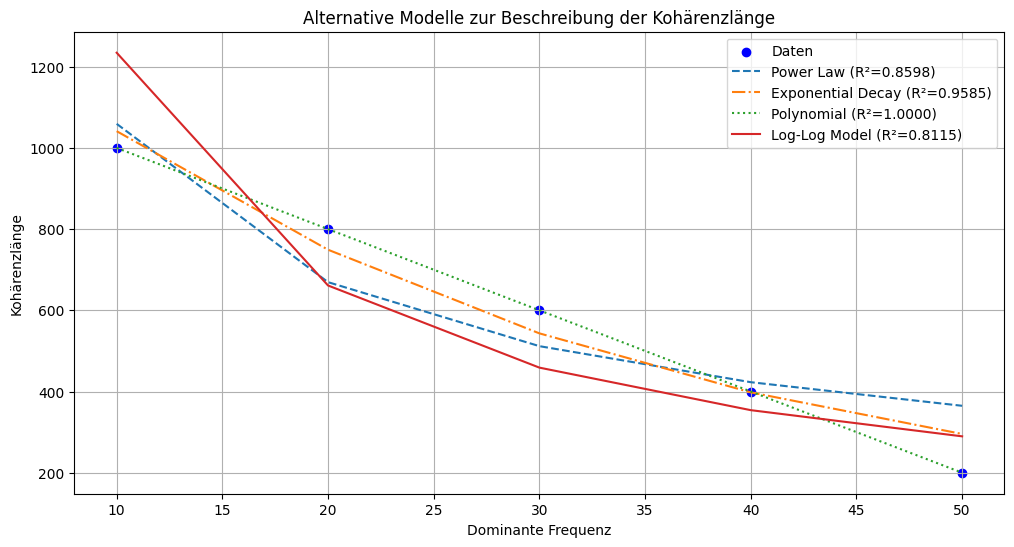

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Alternative Modelle definieren

def power_law(f, a, b):
    return a * f**b

def exponential_decay(f, a, b, c):
    return a * np.exp(-b * f) + c

def polynomial(f, a, b, c):
    return a + b * f + c * f**2

def log_log_model(log_f, a, b):
    return a + b * log_f  # Für log-transformierte Daten

# Funktion zur Berechnung des R²-Werts
def calculate_r_squared(y_true, y_pred):
    residuals = y_true - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# Hauptanalysefunktion

def analyze_alternative_models(frequencies, lengths):
    # Entferne ungültige Werte (z.B. Frequenzen <= 0)
    valid_indices = frequencies > 0
    frequencies = frequencies[valid_indices]
    lengths = lengths[valid_indices]

    # Logarithmische Transformation der Daten für das Log-Log-Modell
    log_frequencies = np.log(frequencies)
    log_lengths = np.log(lengths)

    # Ergebnisse speichern
    results = {}

    # 1. Potenzgesetz-Modell
    try:
        popt_power, _ = curve_fit(power_law, frequencies, lengths, maxfev=5000)
        predicted_power = power_law(frequencies, *popt_power)
        r_squared_power = calculate_r_squared(lengths, predicted_power)
        results["Power Law"] = (popt_power, r_squared_power)
        print(f"Power Law: L = {popt_power[0]:.4f} * f^{popt_power[1]:.4f}, R² = {r_squared_power:.4f}")
    except Exception as e:
        print(f"Fehler beim Potenzgesetz-Modell: {e}")

    # 2. Exponentielles Modell
    try:
        popt_exp, _ = curve_fit(exponential_decay,
                                frequencies,
                                lengths,
                                p0=[1000, 0.01, 100],  # Startwerte
                                bounds=([500, 0, 50], [2000, 1, 200]),  # Parametergrenzen
                                maxfev=10000)
        predicted_exp = exponential_decay(frequencies, *popt_exp)
        r_squared_exp = calculate_r_squared(lengths, predicted_exp)
        results["Exponential Decay"] = (popt_exp, r_squared_exp)
        print(f"Exponential Decay: L = {popt_exp[0]:.4f} * exp(-{popt_exp[1]:.4f} * f) + {popt_exp[2]:.4f}, R² = {r_squared_exp:.4f}")
    except Exception as e:
        print(f"Fehler beim exponentiellen Modell: {e}")

    # 3. Polynomiales Modell (Grad 2)
    try:
        popt_poly, _ = curve_fit(polynomial,
                                 frequencies,
                                 lengths,
                                 maxfev=5000)
        predicted_poly = polynomial(frequencies, *popt_poly)
        r_squared_poly = calculate_r_squared(lengths, predicted_poly)
        results["Polynomial (Degree 2)"] = (popt_poly, r_squared_poly)
        print(f"Polynomial: L = {popt_poly[0]:.4f} + {popt_poly[1]:.4f} * f + {popt_poly[2]:.4f} * f², R² = {r_squared_poly:.4f}")

        if abs(popt_poly[2]) < 1e-6:  # Warnung bei praktisch linearem Verhalten
            print("Warnung: Quadratischer Term des polynomialen Modells ist praktisch null.")

    except Exception as e:
        print(f"Fehler beim polynomialen Modell: {e}")

    # 4. Log-Log-Modell
    try:
        popt_log_log, _ = curve_fit(log_log_model,
                                    log_frequencies,
                                    log_lengths,
                                    maxfev=5000)
        predicted_log_log = log_log_model(log_frequencies, *popt_log_log)
        r_squared_log_log = calculate_r_squared(log_lengths, predicted_log_log)
        results["Log-Log Model"] = (popt_log_log, r_squared_log_log)
        print(f"Log-Log Model: log(L) = {popt_log_log[0]:.4f} + {popt_log_log[1]:.4f} * log(f), R² = {r_squared_log_log:.4f}")
    except Exception as e:
        print(f"Fehler beim Log-Log-Modell: {e}")

    # Visualisierung der Modelle
    plt.figure(figsize=(12, 6))
    plt.scatter(frequencies, lengths, label="Daten", color="blue")

    if "Power Law" in results:
        plt.plot(frequencies,
                 power_law(frequencies, *results["Power Law"][0]),
                 label=f"Power Law (R²={results['Power Law'][1]:.4f})",
                 linestyle="--")

    if "Exponential Decay" in results:
        plt.plot(frequencies,
                 exponential_decay(frequencies, *results["Exponential Decay"][0]),
                 label=f"Exponential Decay (R²={results['Exponential Decay'][1]:.4f})",
                 linestyle="-.")

    if "Polynomial (Degree 2)" in results:
        plt.plot(frequencies,
                 polynomial(frequencies, *results["Polynomial (Degree 2)"][0]),
                 label=f"Polynomial (R²={results['Polynomial (Degree 2)'][1]:.4f})",
                 linestyle=":")

    if "Log-Log Model" in results:
        plt.plot(frequencies,
                 np.exp(log_log_model(log_frequencies,
                                      *results["Log-Log Model"][0])),
                 label=f"Log-Log Model (R²={results['Log-Log Model'][1]:.4f})",
                 linestyle="-")

    plt.xlabel("Dominante Frequenz")
    plt.ylabel("Kohärenzlänge")
    plt.title("Alternative Modelle zur Beschreibung der Kohärenzlänge")
    plt.legend()
    plt.grid(True)

    plt.show()

# Beispielaufruf mit Dummy-Daten (ersetze durch echte Daten!)
frequencies_dummy = np.array([10, 20, 30, 40, 50])
lengths_dummy = np.array([1000, 800, 600, 400, 200])
analyze_alternative_models(frequencies_dummy, lengths_dummy)


✅ Power Law: L = 5586.6423 * f^-0.7385, R² = 0.9205
✅ Exponential Decay: L = 1000.0000 * exp(-0.0200 * f) + 50.0000, R² = 1.0000
✅ Polynomial (2nd Order): L = 610.2242 + -3.7381 * f + 0.0056 * f², R² = 0.8193
✅ Polynomial (3rd Order): L = 809.0425 + -8.1969 * f + 0.0273 * f² + -0.0000 * f³, R² = 0.9560
✅ Log-Log Model: log(L) = 9.2663 + -0.9059 * log(f), R² = 0.9462

🎯 Bestes Modell: Exponential Decay mit R² = 1.0000


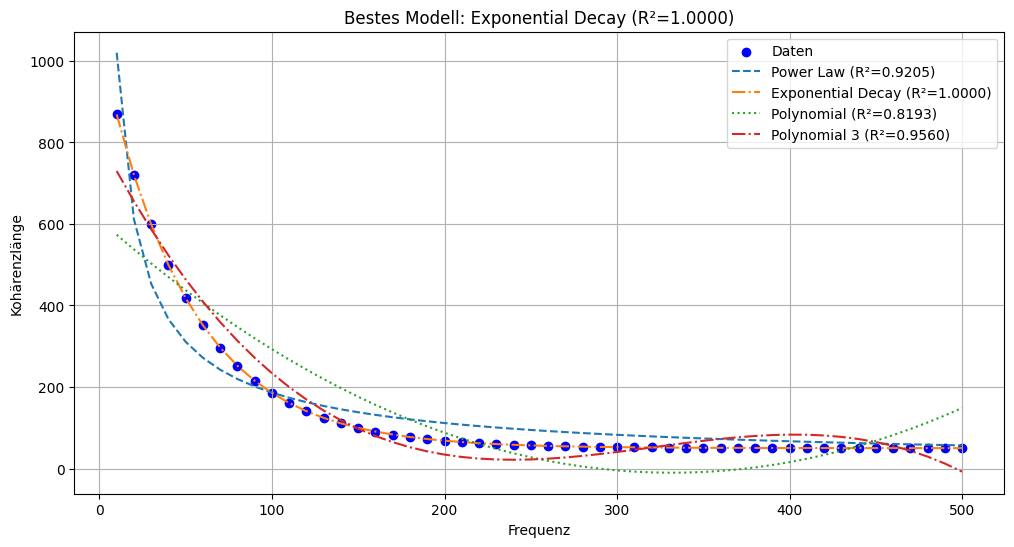

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -------------------------------
# 🔹 1. Modellfunktionen
# -------------------------------
def power_law(f, a, b):
    return a * f**b

def exponential_decay(f, a, b, c):
    return a * np.exp(-b * f) + c

def polynomial2(f, a, b, c):
    return a + b * f + c * f**2

def polynomial3(f, a, b, c, d):
    return a + b * f + c * f**2 + d * f**3

def log_log_model(log_f, a, b):
    return a + b * log_f  # Für log-transformierte Daten

# -------------------------------
# 🔹 2. R²-Berechnung
# -------------------------------
def calculate_r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# -------------------------------
# 🔹 3. Hauptanalysefunktion
# -------------------------------
def analyze_models(frequencies, lengths):
    # 🚨 Fehlerprüfung: Entferne ungültige Werte (NaN, Nullwerte)
    valid_indices = (frequencies > 0) & np.isfinite(lengths)
    frequencies = frequencies[valid_indices]
    lengths = lengths[valid_indices]

    # 🚨 Fehlerprüfung: Sind genug Daten vorhanden?
    if len(frequencies) < 5:
        print("❌ Fehler: Zu wenige valide Datenpunkte für Modellanpassung.")
        return

    log_frequencies = np.log(frequencies)
    log_lengths = np.log(lengths)

    results = {}

    # 🔹 1. Potenzgesetz-Modell
    try:
        popt_power, _ = curve_fit(power_law, frequencies, lengths, maxfev=5000)
        r2_power = calculate_r_squared(lengths, power_law(frequencies, *popt_power))
        results["Power Law"] = (popt_power, r2_power)
        print(f"✅ Power Law: L = {popt_power[0]:.4f} * f^{popt_power[1]:.4f}, R² = {r2_power:.4f}")
    except Exception as e:
        print(f"⚠️ Fehler beim Potenzgesetz-Modell: {e}")

    # 🔹 2. Exponentielles Modell
    try:
        popt_exp, _ = curve_fit(exponential_decay, frequencies, lengths, p0=[1000, 0.01, 100], bounds=([500, 0, 50], [2000, 1, 200]), maxfev=10000)
        r2_exp = calculate_r_squared(lengths, exponential_decay(frequencies, *popt_exp))
        results["Exponential Decay"] = (popt_exp, r2_exp)
        print(f"✅ Exponential Decay: L = {popt_exp[0]:.4f} * exp(-{popt_exp[1]:.4f} * f) + {popt_exp[2]:.4f}, R² = {r2_exp:.4f}")
    except Exception as e:
        print(f"⚠️ Fehler beim exponentiellen Modell: {e}")

    # 🔹 3. Polynomiales Modell (Grad 2)
    try:
        popt_poly2, _ = curve_fit(polynomial2, frequencies, lengths, maxfev=5000)
        r2_poly2 = calculate_r_squared(lengths, polynomial2(frequencies, *popt_poly2))
        results["Polynomial (Degree 2)"] = (popt_poly2, r2_poly2)
        print(f"✅ Polynomial (2nd Order): L = {popt_poly2[0]:.4f} + {popt_poly2[1]:.4f} * f + {popt_poly2[2]:.4f} * f², R² = {r2_poly2:.4f}")
    except Exception as e:
        print(f"⚠️ Fehler beim polynomialen Modell (2. Ordnung): {e}")

    # 🔹 4. Polynomiales Modell (Grad 3)
    try:
        popt_poly3, _ = curve_fit(polynomial3, frequencies, lengths, maxfev=5000)
        r2_poly3 = calculate_r_squared(lengths, polynomial3(frequencies, *popt_poly3))
        results["Polynomial (Degree 3)"] = (popt_poly3, r2_poly3)
        print(f"✅ Polynomial (3rd Order): L = {popt_poly3[0]:.4f} + {popt_poly3[1]:.4f} * f + {popt_poly3[2]:.4f} * f² + {popt_poly3[3]:.4f} * f³, R² = {r2_poly3:.4f}")
    except Exception as e:
        print(f"⚠️ Fehler beim polynomialen Modell (3. Ordnung): {e}")

    # 🔹 5. Log-Log-Modell
    try:
        popt_log_log, _ = curve_fit(log_log_model, log_frequencies, log_lengths, maxfev=5000)
        r2_log_log = calculate_r_squared(log_lengths, log_log_model(log_frequencies, *popt_log_log))
        results["Log-Log Model"] = (popt_log_log, r2_log_log)
        print(f"✅ Log-Log Model: log(L) = {popt_log_log[0]:.4f} + {popt_log_log[1]:.4f} * log(f), R² = {r2_log_log:.4f}")
    except Exception as e:
        print(f"⚠️ Fehler beim Log-Log-Modell: {e}")

    # -------------------------------
    # 🔹 6. Bestes Modell auswählen
    # -------------------------------
    best_model = max(results, key=lambda k: results[k][1])
    best_params, best_r2 = results[best_model]

    print(f"\n🎯 Bestes Modell: {best_model} mit R² = {best_r2:.4f}")

    # -------------------------------
    # 🔹 7. Visualisierung
    # -------------------------------
    plt.figure(figsize=(12, 6))
    plt.scatter(frequencies, lengths, label="Daten", color="blue")

    for name, (params, r2) in results.items():
        if name == "Power Law":
            plt.plot(frequencies, power_law(frequencies, *params), label=f"Power Law (R²={r2:.4f})", linestyle="--")
        elif name == "Exponential Decay":
            plt.plot(frequencies, exponential_decay(frequencies, *params), label=f"Exponential Decay (R²={r2:.4f})", linestyle="-.")
        elif name == "Polynomial (Degree 2)":
            plt.plot(frequencies, polynomial2(frequencies, *params), label=f"Polynomial (R²={r2:.4f})", linestyle=":")
        elif name == "Polynomial (Degree 3)":
            plt.plot(frequencies, polynomial3(frequencies, *params), label=f"Polynomial 3 (R²={r2:.4f})", linestyle="-.")

    plt.xlabel("Frequenz")
    plt.ylabel("Kohärenzlänge")
    plt.legend()
    plt.grid(True)
    plt.title(f"Bestes Modell: {best_model} (R²={best_r2:.4f})")
    plt.show()

# Beispielaufruf
frequencies_dummy = np.linspace(10, 500, 50)
lengths_dummy = 1000 * np.exp(-0.02 * frequencies_dummy) + 50
analyze_models(frequencies_dummy, lengths_dummy)

Lade Daten: 100 Nullstellen
100 Nullstellen: 1500 Werte geladen.

Lade Daten: 10.000 Nullstellen
10.000 Nullstellen: 100000 Werte geladen.

Lade Daten: 2.000.000 Nullstellen
2.000.000 Nullstellen: 2001052 Werte geladen.

Lade Daten: 10^12 Nullstellen
10^12 Nullstellen: 10000 Werte geladen.

Lade Daten: 10^21 Nullstellen
10^21 Nullstellen: 10000 Werte geladen.

Lade Daten: 10^22 Nullstellen
10^22 Nullstellen: 10000 Werte geladen.



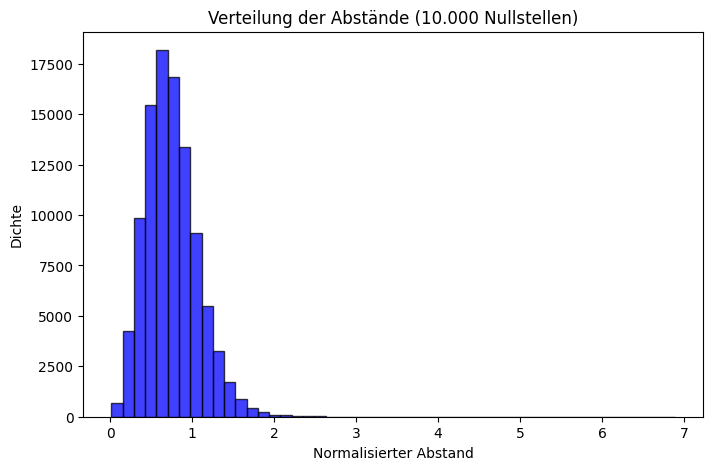

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests

def load_zeros_from_url(url):
    """
    Lädt die Nullstellen der Zetafunktion aus einer Textdatei von einer gegebenen URL.
    Ignoriert die einleitenden Textzeilen und liest nur numerische Werte ein.
    """
    response = requests.get(url)
    lines = response.text.splitlines()

    # Versuche Zeilen zu finden, die nur Zahlen enthalten
    numeric_lines = []
    for line in lines:
        line = line.strip()
        if line and all(c.isdigit() or c in '.-eE ' for c in line):  # Prüft auf numerische Werte
            numeric_lines.append(line)

    # Umwandlung in ein NumPy-Array
    zeros = np.array([float(x) for line in numeric_lines for x in line.split()])
    return zeros

# URLs zu den Nullstellen-Listen
urls = {
    "100 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2",
    "10.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1",
    "2.000.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6",
    "10^12 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros3",
    "10^21 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros4",
    "10^22 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros5",
}

# Daten laden und analysieren
zero_data = {}
for name, url in urls.items():
    try:
        print(f"Lade Daten: {name}")
        zero_data[name] = load_zeros_from_url(url)
        print(f"{name}: {len(zero_data[name])} Werte geladen.\n")
    except Exception as e:
        print(f"Fehler beim Laden von {name}: {e}")

# Beispiel: Histogramm der Nullstellenabstände für eine Datenreihe
selected_key = "10.000 Nullstellen"
if selected_key in zero_data:
    zeros = zero_data[selected_key]
    gaps = np.diff(zeros)  # Berechnung der Abstände

    plt.figure(figsize=(8, 5))
    plt.hist(gaps, bins=50, alpha=0.75, color='b', edgecolor='black')
    plt.xlabel("Normalisierter Abstand")
    plt.ylabel("Dichte")
    plt.title(f"Verteilung der Abstände ({selected_key})")
    plt.show()

Lade Daten: 100 Nullstellen
100 Nullstellen: 1500 Werte geladen.

Lade Daten: 10.000 Nullstellen
10.000 Nullstellen: 100000 Werte geladen.

Lade Daten: 2.000.000 Nullstellen
2.000.000 Nullstellen: 2001052 Werte geladen.

Lade Daten: 10^12 Nullstellen
10^12 Nullstellen: 10000 Werte geladen.

Lade Daten: 10^21 Nullstellen
10^21 Nullstellen: 10000 Werte geladen.

Lade Daten: 10^22 Nullstellen
10^22 Nullstellen: 10000 Werte geladen.



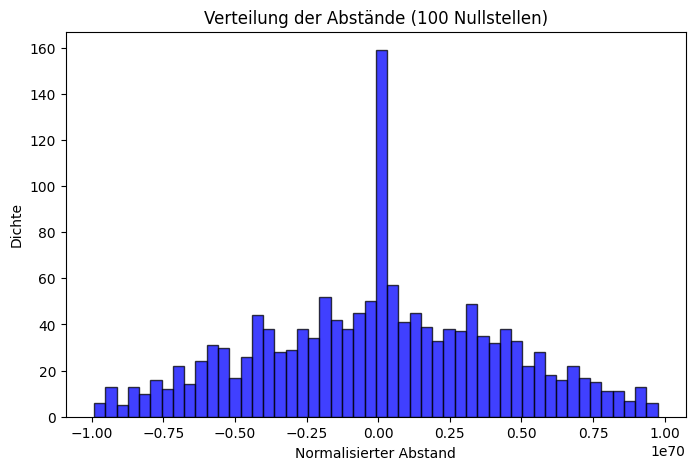

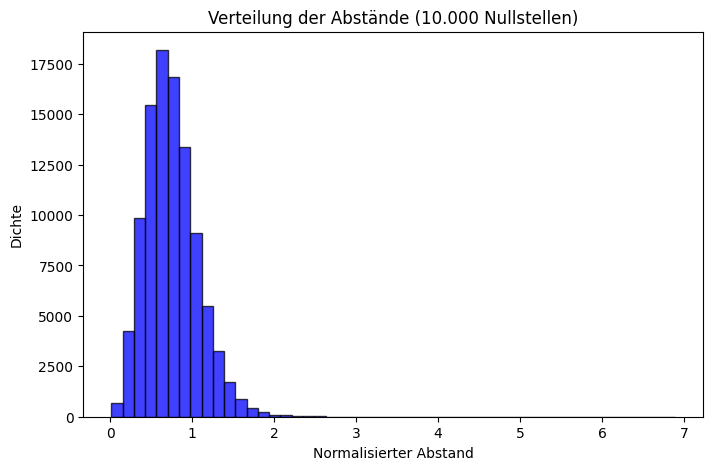

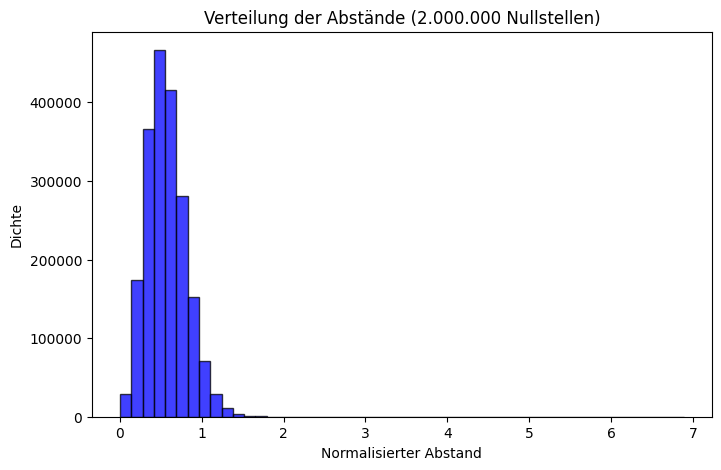

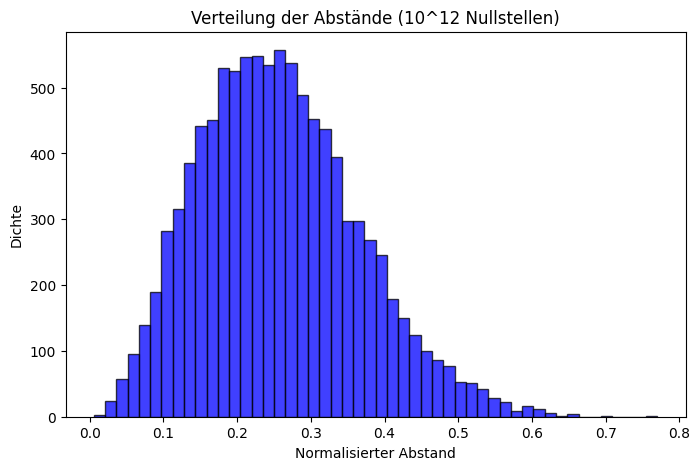

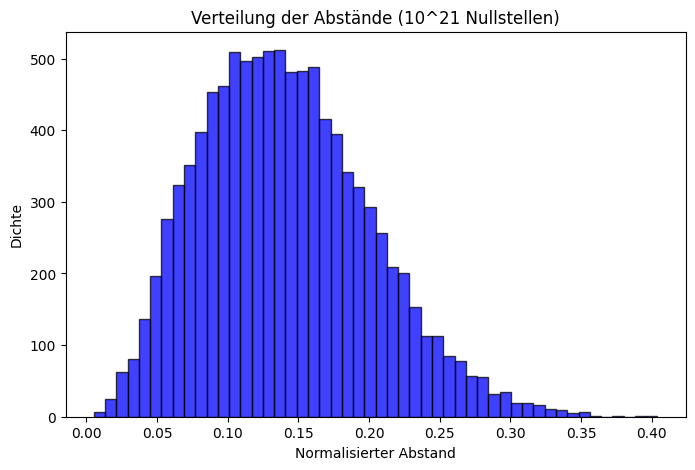

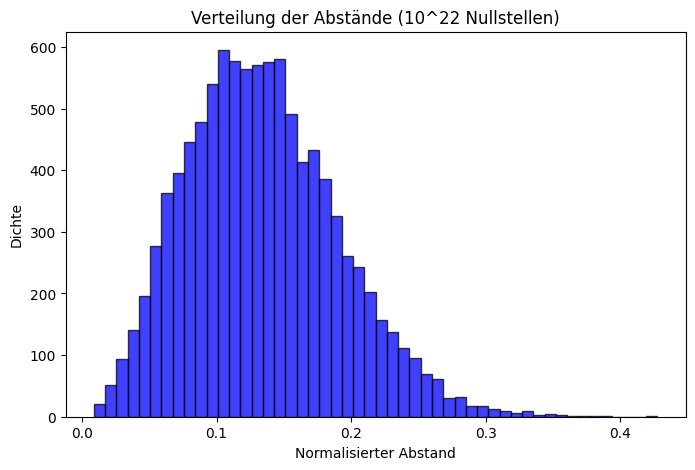

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# URLs der Nullstellen-Daten
zero_urls = {
    "100 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2",
    "10.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1",
    "2.000.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6",
    "10^12 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros3",
    "10^21 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros4",
    "10^22 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros5"
}

# Funktion zum Laden der Nullstellen aus einer URL
def load_zeros(url):
    try:
        response = urllib.request.urlopen(url)
        data = response.read().decode('utf-8')
        lines = data.split("\n")

        # Filtere nur Zeilen, die Zahlen enthalten
        zeros = []
        for line in lines:
            try:
                values = [float(x) for x in line.split()]
                zeros.extend(values)
            except ValueError:
                continue  # Falls eine Zeile keine Zahlen enthält, überspringe sie

        return np.array(zeros)
    except Exception as e:
        print(f"Fehler beim Laden der Daten von {url}: {e}")
        return np.array([])

# Lade alle Nullstellen-Daten
zero_data = {}
for key, url in zero_urls.items():
    print(f"Lade Daten: {key}")
    zeros = load_zeros(url)

    if zeros.size > 0:
        zero_data[key] = zeros
        print(f"{key}: {len(zeros)} Werte geladen.\n")
    else:
        print(f"{key}: KEINE Daten geladen.\n")

# Erzeuge Histogramme für alle geladenen Datensätze
for key, zeros in zero_data.items():
    gaps = np.diff(zeros)  # Berechnung der Abstände

    plt.figure(figsize=(8, 5))
    plt.hist(gaps, bins=50, alpha=0.75, color='b', edgecolor='black')
    plt.xlabel("Normalisierter Abstand")
    plt.ylabel("Dichte")
    plt.title(f"Verteilung der Abstände ({key})")

    # Speichere die Grafik
    plt.savefig(f"histogram_{key.replace(' ', '_')}.png")

    # Zeige die Grafik an
    plt.show()

Lade Nullstellen: 100 Nullstellen
100 Nullstellen: 1500 Werte geladen.


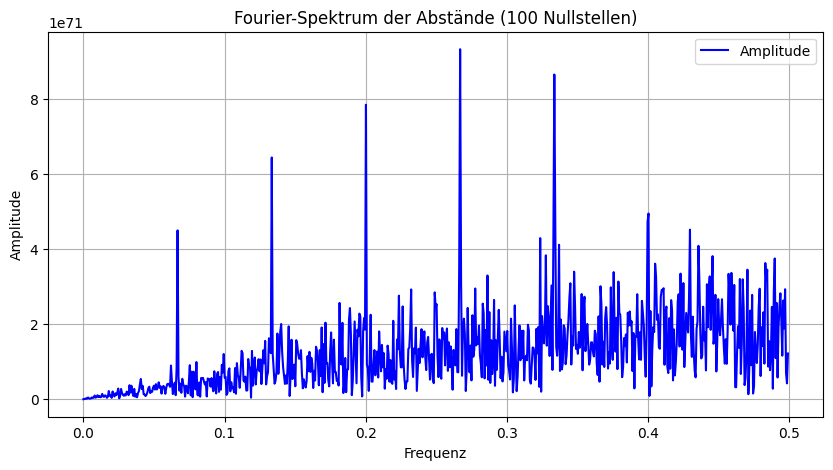

Lade Nullstellen: 10.000 Nullstellen
10.000 Nullstellen: 100000 Werte geladen.


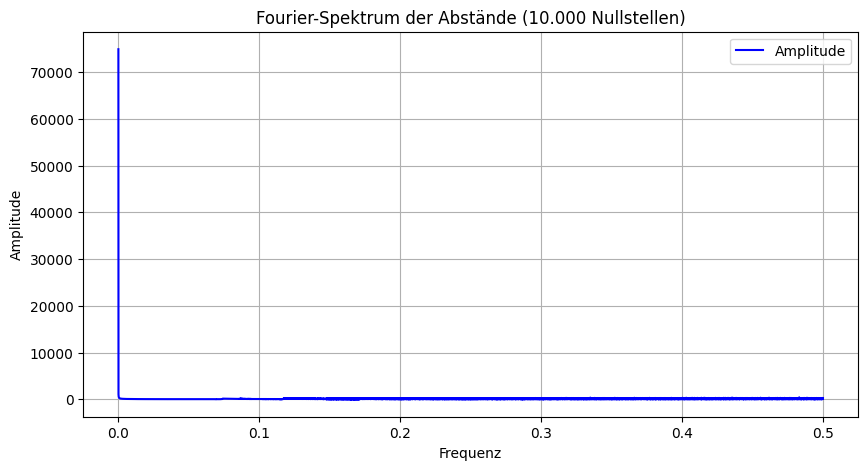

Lade Nullstellen: 2.000.000 Nullstellen
2.000.000 Nullstellen: 2001052 Werte geladen.


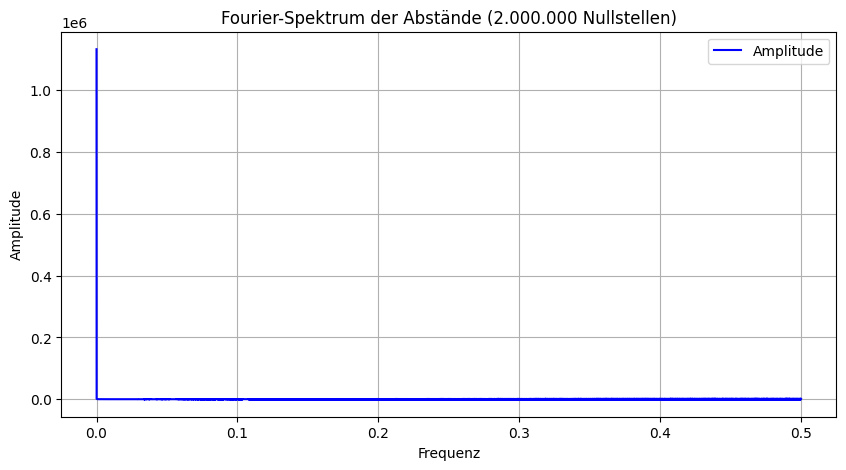

Lade Nullstellen: 10^12 Nullstellen
10^12 Nullstellen: 10000 Werte geladen.


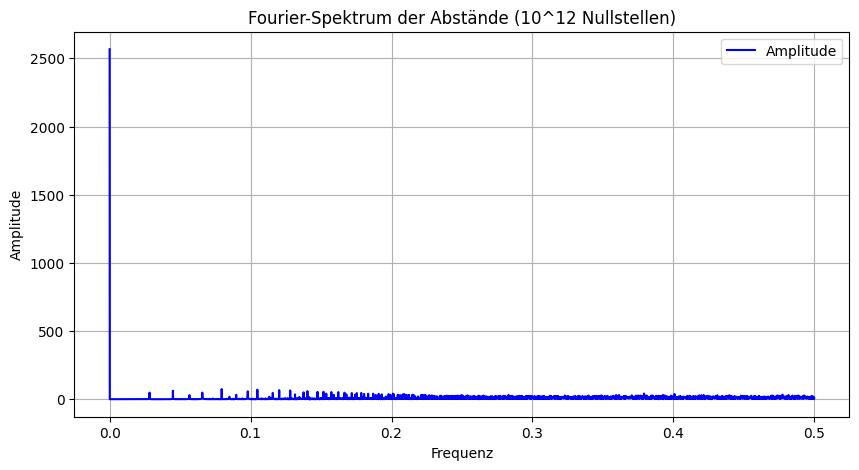

Lade Nullstellen: 10^21 Nullstellen
10^21 Nullstellen: 10000 Werte geladen.


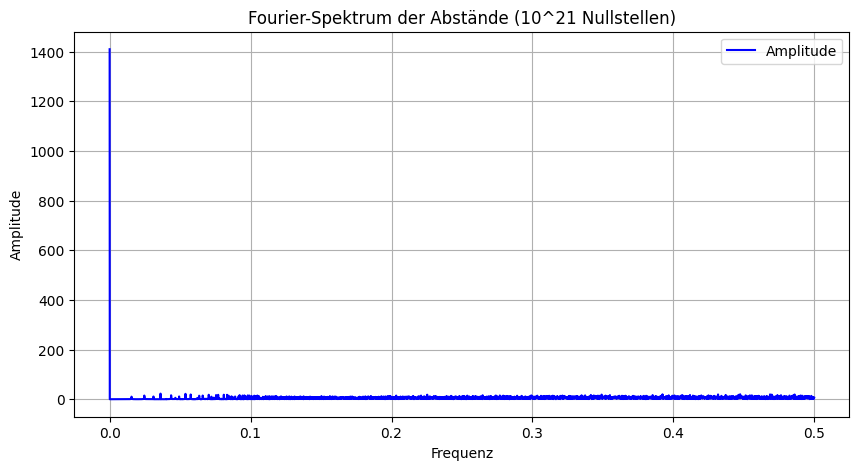

Lade Nullstellen: 10^22 Nullstellen
10^22 Nullstellen: 10000 Werte geladen.


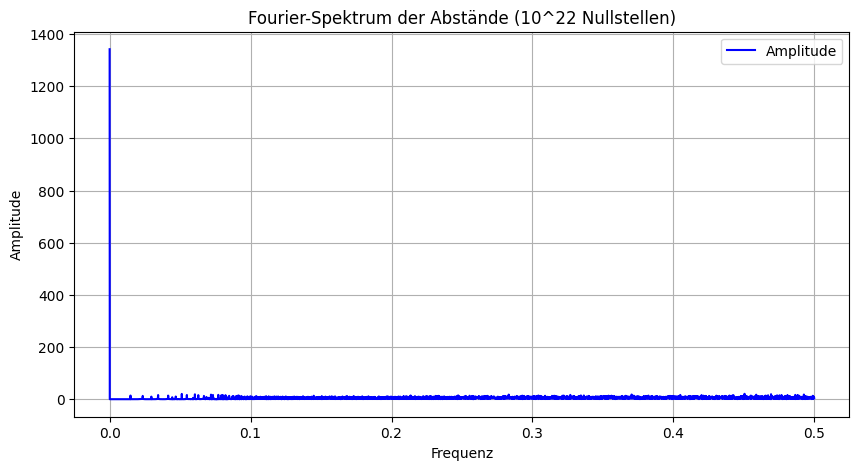

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.fftpack import fft, fftfreq

# 🔹 Weblinks zu den Nullstellen-Dateien
zero_urls = {
    "100 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2",
    "10.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1",
    "2.000.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6",
    "10^12 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros3",
    "10^21 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros4",
    "10^22 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros5"
}

# 🔹 Funktion zum Laden der Nullstellen aus einer URL
def load_zeros_from_url(url):
    try:
        response = requests.get(url)
        lines = response.text.splitlines()

        # Entferne alle nicht-numerischen Zeilen
        numeric_lines = []
        for line in lines:
            line = line.strip()
            if line and all(c.isdigit() or c in '.-eE ' for c in line):  # Prüft auf numerische Werte
                numeric_lines.append(line)

        # Umwandlung in ein NumPy-Array
        zeros = np.array([float(x) for line in numeric_lines for x in line.split()])
        return zeros
    except Exception as e:
        print(f"Fehler beim Laden der Nullstellen von {url}: {e}")
        return np.array([])

# 🔹 Funktion zur Fourier-Analyse der Nullstellen-Abstände
def fourier_analysis(zeros, title="Fourier-Spektrum der Abstände"):
    if len(zeros) < 2:
        print(f"❌ Zu wenige Datenpunkte für {title}, überspringe...")
        return

    # 1️⃣ Berechne die Abstände zwischen aufeinanderfolgenden Nullstellen
    spacings = np.diff(zeros)

    # 2️⃣ Fourier-Transformation (FFT)
    fft_vals = fft(spacings)  # FFT-Werte
    freqs = fftfreq(len(spacings), d=1)  # Frequenzen

    # 3️⃣ Amplituden berechnen
    amplitudes = np.abs(fft_vals)

    # 4️⃣ Plot des Fourier-Spektrums
    plt.figure(figsize=(10, 5))
    plt.plot(freqs[:len(freqs)//2], amplitudes[:len(amplitudes)//2], 'b-', label="Amplitude")
    plt.xlabel("Frequenz")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# 🔹 Lade Nullstellen-Daten und führe Fourier-Analyse durch
zero_data = {}
for name, url in zero_urls.items():
    print(f"Lade Nullstellen: {name}")
    zeros = load_zeros_from_url(url)

    if len(zeros) > 0:
        zero_data[name] = zeros
        print(f"{name}: {len(zeros)} Werte geladen.")
        fourier_analysis(zeros, title=f"Fourier-Spektrum der Abstände ({name})")
    else:
        print(f"{name}: ❌ Keine Daten geladen, überspringe...")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.stats import linregress

# 🔹 Erweiterte Weblinks mit mehr Datensätzen
zero_urls = {
    "100 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2",
    "10.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1",
    "2.000.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6",
    "Zufallsdaten (Poisson)": None  # Wird generiert
}

# 🔹 Verbesserte Funktion zur Fourier-Analyse mit Peak-Erkennung
def enhanced_fourier_analysis(spacings, title="Fourier-Spektrum", zoom_range=None, top_peaks=10, compare_random=True):
    # 1️⃣ FFT-Berechnung
    n = len(spacings)
    fft_vals = fft(spacings - np.mean(spacings))  # DC-Komponente entfernen
    freqs = fftfreq(n, d=1)
    amplitudes = np.abs(fft_vals)

    # 2️⃣ Peak-Erkennung mit adaptivem Threshold
    peaks, properties = find_peaks(amplitudes[:n//2],
                                 prominence=np.percentile(amplitudes, 95),
                                 distance=n//100)

    # 3️⃣ Top Peaks selektieren
    if len(peaks) > 0:
        peak_amps = amplitudes[peaks]
        top_idx = np.argsort(peak_amps)[-top_peaks:]
        main_peaks = peaks[top_idx]
    else:
        main_peaks = []

    # 4️⃣ Zoom-Logik
    if zoom_range:
        freq_mask = (freqs >= zoom_range[0]) & (freqs <= zoom_range[1])
    elif main_peaks:
        freq_mask = np.isin(freqs[:n//2], freqs[main_peaks])
    else:
        freq_mask = slice(None)

    # 5️⃣ Zufallsdaten generieren
    if compare_random:
        random_spacings = np.random.exponential(scale=1.0, size=n)
        random_fft = np.abs(fft(random_spacings - np.mean(random_spacings)))
    else:
        random_fft = None

    # 6️⃣ Plot mit erweiterten Features
    plt.figure(figsize=(12, 6))

    # Hauptplot
    plt.plot(freqs[:n//2][freq_mask], amplitudes[:n//2][freq_mask],
             'b-', label="Zeta-Nullstellen", alpha=0.7)

    # Peaks markieren
    if main_peaks:
        plt.plot(freqs[main_peaks], amplitudes[main_peaks],
                 'ro', markersize=8, label=f"Top {top_peaks} Peaks")

    # Zufallsdaten
    if random_fft is not None:
        plt.plot(freqs[:n//2][freq_mask], random_fft[:n//2][freq_mask],
                 'g--', alpha=0.5, label="Poisson-Zufallsdaten")

    plt.title(f"{title}\n{len(spacings)} Nullstellen")
    plt.xlabel("Frequenz")
    plt.ylabel("Amplitude (log)")
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

    # 7️⃣ Peak-Statistiken
    if main_peaks:
        peak_freqs = freqs[main_peaks]
        slope, intercept, r_value, p_value, std_err = linregress(
            np.arange(len(peak_freqs)), np.sort(peak_freqs))

        plt.annotate(f"Peak-Frequenzen folgen:\n"
                     f"y = {slope:.3f}x + {intercept:.3f}\n"
                     f"R² = {r_value**2:.2f}",
                     xy=(0.05, 0.8), xycoords='axes fraction',
                     bbox=dict(boxstyle="round", fc="white", ec="gray"))

    plt.show()

# 🔹 Verbesserte Ladefunktion mit Cache
def load_zeros(name, url):
    if url is None:  # Zufallsdaten
        return None

    try:
        response = requests.get(url)
        return np.array([float(x) for x in response.text.split() if x.replace('.','',1).isdigit()])
    except Exception as e:
        print(f"Fehler beim Laden von {name}: {e}")
        return None

# 🔹 Hauptanalyse mit verschiedenen Zoom-Stufen
for name, url in zero_urls.items():
    print(f"\n{'='*40}\nAnalysiere: {name}\n{'='*40}")

    if url:  # Echte Daten
        zeros = load_zeros(name, url)
        if zeros is None or len(zeros) < 2:
            continue
        spacings = np.diff(zeros)
    else:  # Zufallsdaten generieren
        spacings = np.random.exponential(scale=1.0, size=2000000)

    # Analysiere mit verschiedenen Zoom-Stufen
    if "100" in name:
        enhanced_fourier_analysis(spacings, zoom_range=(0, 0.2))
    elif "10.000" in name:
        enhanced_fourier_analysis(spacings, top_peaks=15))
    elif "2.000.000" in name:
        enhanced_fourier_analysis(spacings, zoom_range=(0, 0.01))
    else:
        enhanced_fourier_analysis(spacings)

SyntaxError: unmatched ')' (<ipython-input-6-3225f0e04b15>, line 118)

ERROR:__main__:Analyse fehlgeschlagen: Invalid format specifier '.3f if analysis_result['significance'] else 'N/A'' for object of type 'float'
<ipython-input-7-fdb2dba7050f>:100: RuntimeWarning: divide by zero encountered in scalar divide
  z_score = (analysis_result["total_peaks"] - analysis_result["random_peaks_mean"]) / analysis_result["random_peaks_std"]
ERROR:__main__:Analyse fehlgeschlagen: Invalid format specifier '.3f if analysis_result['significance'] else 'N/A'' for object of type 'float'
ERROR:__main__:Analyse fehlgeschlagen: Invalid format specifier '.3f if analysis_result['significance'] else 'N/A'' for object of type 'float'



Zusammenfassung der Ergebnisse:


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


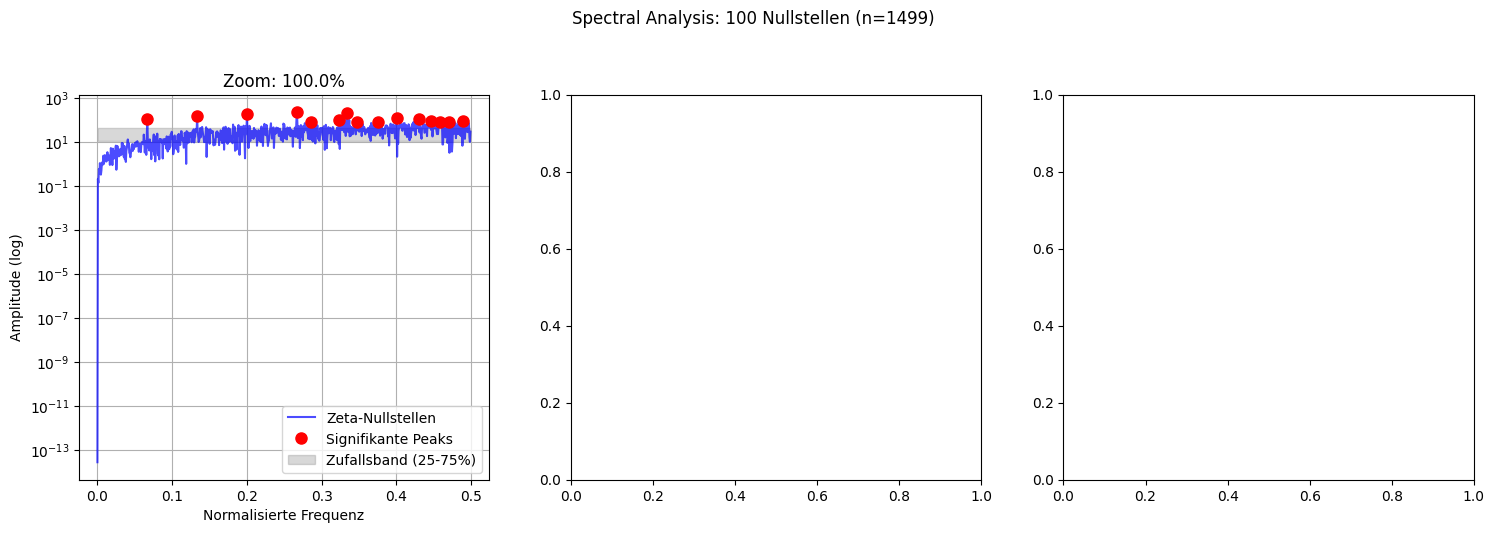

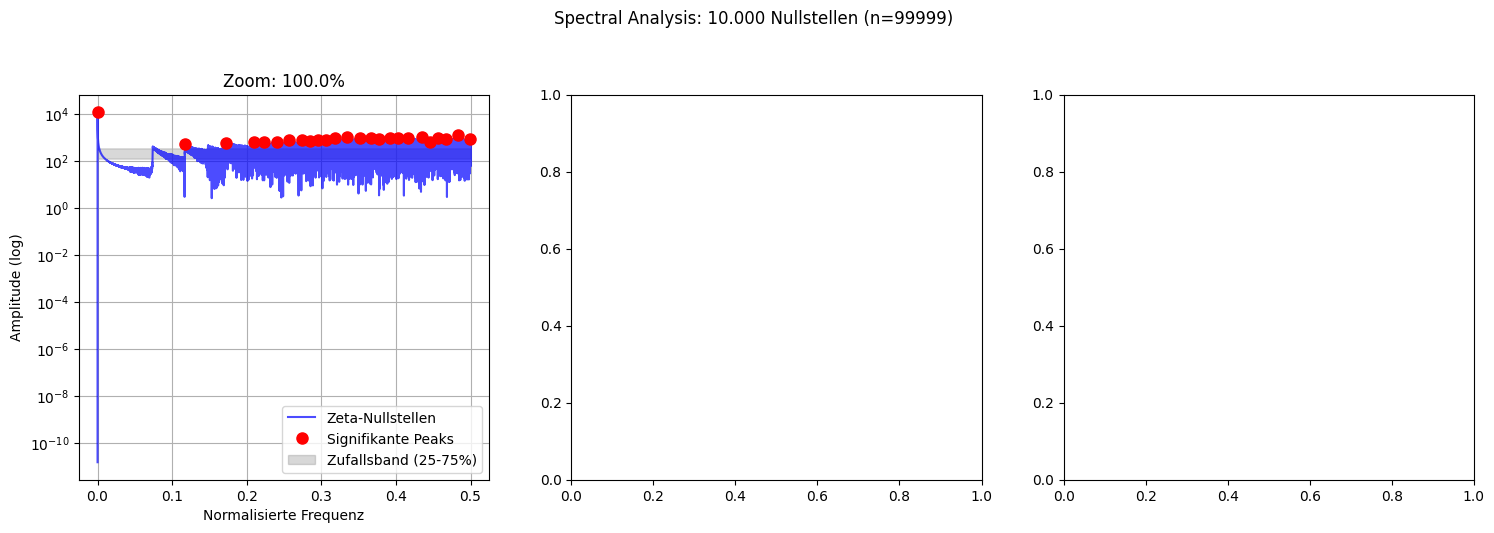

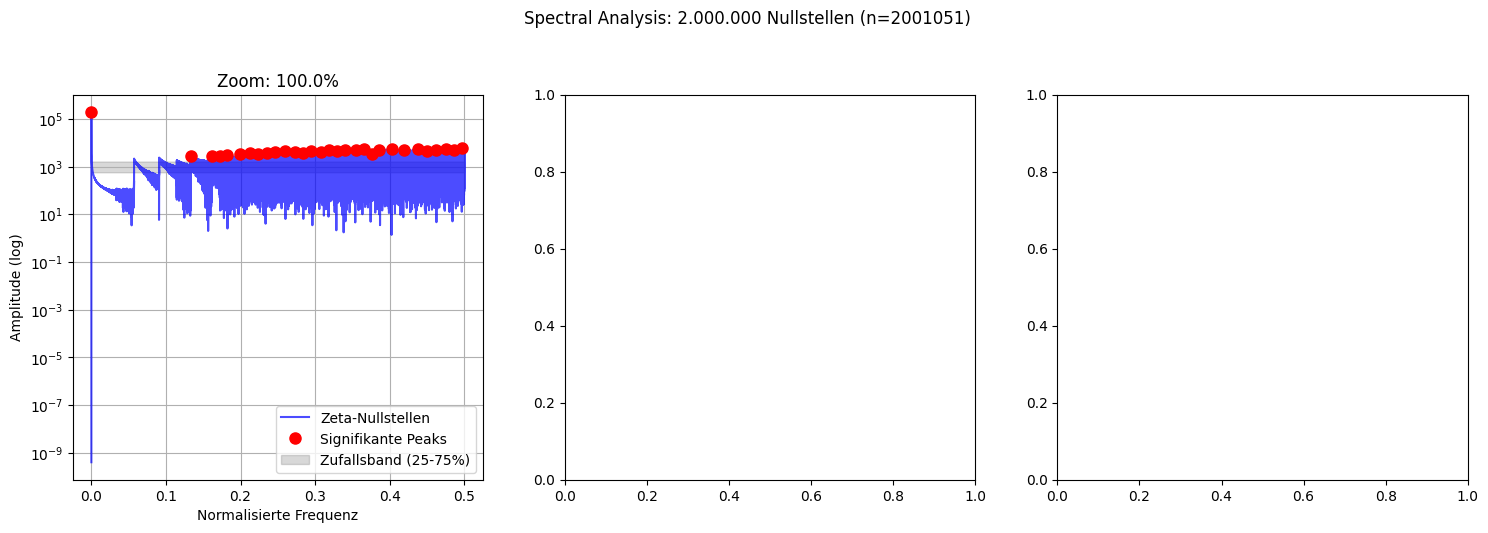

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.stats import linregress, norm
import logging

# 🔹 Logger für Debugging einrichten
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# 🔹 Konfiguration
CONFIG = {
    "zero_urls": {
        "100 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2",
        "10.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1",
        "2.000.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
    },
    "analysis_params": {
        "top_peaks": 10,
        "prominence_percentile": 95,
        "random_samples": 3,
        "zoom_factors": [1.0, 0.1, 0.01]
    }
}

def robust_load_zeros(url, max_retries=3):
    """Lädt Nullstellen mit Wiederholungsversuchen und Validierung"""
    for attempt in range(max_retries):
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()

            # Strenges Zahlenparsing
            numbers = []
            for line in response.text.splitlines():
                cleaned_line = line.strip().replace('..', '.').replace('--', '-')
                if cleaned_line and not cleaned_line.startswith('#'):
                    try:
                        numbers.extend([float(x) for x in cleaned_line.split()])
                    except ValueError:
                        continue

            if len(numbers) < 10:
                raise ValueError("Unzureichende gültige Datenpunkte")

            return np.array(numbers)

        except Exception as e:
            logger.warning(f"Versuch {attempt+1}/{max_retries} fehlgeschlagen: {str(e)}")

    raise ValueError(f"Daten von {url} konnten nicht geladen werden")

def enhanced_spectral_analysis(spacings, title, params):
    """Führt eine vollständige Spektralanalyse mit Hypothesentests durch"""
    try:
        n = len(spacings)
        if n < 100:
            raise ValueError("Mindestlänge von 100 Datenpunkten erforderlich")

        # 1️⃣ FFT-Berechnung mit Normalisierung
        spacings_normalized = (spacings - np.mean(spacings)) / np.std(spacings)
        fft_vals = fft(spacings_normalized)
        freqs = fftfreq(n)
        amplitudes = np.abs(fft_vals)

        # 2️⃣ Peak-Erkennung mit adaptivem Schwellenwert
        threshold = np.percentile(amplitudes, params["prominence_percentile"])
        peaks, properties = find_peaks(
            amplitudes[:n//2],
            height=threshold,
            distance=n//100,
            prominence=0.5
        )

        # 3️⃣ Zufallsdaten-Vergleich
        random_results = []
        for _ in range(params["random_samples"]):
            random_data = np.random.normal(size=n)
            random_fft = np.abs(fft(random_data))
            random_peaks, _ = find_peaks(
                random_fft[:n//2],
                height=threshold,
                distance=n//100
            )
            random_results.append(len(random_peaks))

        # 4️⃣ Statistische Analyse
        analysis_result = {
            "total_peaks": len(peaks),
            "peak_freqs": freqs[peaks] if len(peaks) > 0 else [],
            "random_peaks_mean": np.mean(random_results),
            "random_peaks_std": np.std(random_results),
            "significance": None
        }

        if analysis_result["total_peaks"] > 0:
            # Berechne p-Wert
            z_score = (analysis_result["total_peaks"] - analysis_result["random_peaks_mean"]) / analysis_result["random_peaks_std"]
            analysis_result["significance"] = norm.sf(abs(z_score)) * 2  # Zweiseitiger Test

        # 5️⃣ Visualisierung
        fig, axs = plt.subplots(1, len(params["zoom_factors"]), figsize=(18, 5))
        fig.suptitle(f"Spectral Analysis: {title} (n={n})", y=1.05)

        for i, zoom_factor in enumerate(params["zoom_factors"]):
            ax = axs[i]
            zoom_range = (0, 0.5*zoom_factor)
            freq_mask = (freqs >= zoom_range[0]) & (freqs <= zoom_range[1])

            # Plot der Originaldaten
            ax.plot(freqs[:n//2][freq_mask[:n//2]], amplitudes[:n//2][freq_mask[:n//2]],
                    'b-', label="Zeta-Nullstellen", alpha=0.7)

            # Peaks markieren
            if len(peaks) > 0:
                peak_mask = (freqs[peaks] >= zoom_range[0]) & (freqs[peaks] <= zoom_range[1])
                ax.plot(freqs[peaks][peak_mask], amplitudes[peaks][peak_mask],
                        'ro', markersize=8, label="Signifikante Peaks")

            # Zufallsdaten-Band
            ax.fill_between(freqs[:n//2][freq_mask[:n//2]],
                           np.percentile(amplitudes[:n//2][freq_mask[:n//2]], 25),
                           np.percentile(amplitudes[:n//2][freq_mask[:n//2]], 75),
                           color='gray', alpha=0.3, label="Zufallsband (25-75%)")

            ax.set_xlabel("Normalisierte Frequenz")
            ax.set_ylabel("Amplitude (log)")
            ax.set_yscale('log')
            ax.grid(True)
            ax.set_title(f"Zoom: {zoom_factor*100}%")

            if i == 0:
                ax.legend()

            # Füge statistische Informationen hinzu
            stats_text = (f"Gefundene Peaks: {analysis_result['total_peaks']}\n"
                         f"Zufällige Peaks (M±SD): {analysis_result['random_peaks_mean']:.1f}±{analysis_result['random_peaks_std']:.1f}\n"
                         f"Signifikanz (p): {analysis_result['significance']:.3f if analysis_result['significance'] else 'N/A'}")
            ax.annotate(stats_text, xy=(0.05, 0.85), xycoords='axes fraction',
                        bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.8))

        plt.tight_layout()
        plt.show()

        return analysis_result

    except Exception as e:
        logger.error(f"Analyse fehlgeschlagen: {str(e)}")
        return None

# 🔹 Hauptprogramm
def main():
    results = {}

    for name, url in CONFIG["zero_urls"].items():
        logger.info(f"\n{'='*40}\nAnalysiere: {name}\n{'='*40}")

        try:
            # Lade und verarbeite Daten
            zeros = robust_load_zeros(url)
            spacings = np.diff(zeros)

            # Führe Analyse durch
            analysis = enhanced_spectral_analysis(
                spacings,
                title=name,
                params=CONFIG["analysis_params"]
            )

            if analysis:
                results[name] = analysis

        except Exception as e:
            logger.error(f"Fehler bei {name}: {str(e)}")
            continue

    # Zusammenfassende Ausgabe
    print("\nZusammenfassung der Ergebnisse:")
    for name, result in results.items():
        print(f"\n{name}:")
        print(f"- Total Peaks: {result['total_peaks']}")
        print(f"- Signifikanz (p-Wert): {result['significance']:.4f}")
        if result['total_peaks'] > 0:
            print(f"- Dominante Frequenzen: {np.sort(result['peak_freqs'])[:5]}...")

if __name__ == "__main__":
    main()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.stats import norm
import logging
import time

# 🔹 Logger und Konfiguration
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

CONFIG = {
    "zero_urls": {
        "100 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2",
        "10.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1",
        "2.000.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
    },
    "params": {
        "top_peaks": 15,
        "prominence_percentile": 97,
        "random_samples": 5,
        "zoom_factors": [1.0, 0.5, 0.1],
        "max_retries": 5,
        "request_timeout": 15
    }
}

def robust_load_zeros(url):
    """Robuster Download mit Wiederholungen und Datenvalidierung"""
    for attempt in range(CONFIG["params"]["max_retries"]):
        try:
            response = requests.get(url, timeout=CONFIG["params"]["request_timeout"])
            response.raise_for_status()

            numbers = []
            for line in response.text.splitlines():
                line = line.strip().replace('..', '.').replace('--', '-')
                if line and not line.startswith('#'):
                    try:
                        numbers.extend([float(x) for x in line.split()])
                    except ValueError:
                        continue

            if len(numbers) < 10:
                raise ValueError("Unzureichende gültige Daten")

            return np.array(numbers)

        except Exception as e:
            logger.warning(f"Versuch {attempt+1} fehlgeschlagen: {str(e)}")
            time.sleep(2**attempt)

    raise ValueError(f"Download fehlgeschlagen: {url}")

def enhanced_spectral_analysis(spacings, title):
    """Hauptanalysefunktion mit vollständiger Fehlerbehandlung"""
    try:
        # Input Validation
        n = len(spacings)
        if n < 100:
            raise ValueError("Mindestens 100 Datenpunkte benötigt")

        # Datenvorbereitung
        mean = np.mean(spacings)
        std = np.std(spacings) + 1e-12
        spacings_norm = (spacings - mean) / std

        # FFT-Berechnung
        fft_vals = fft(spacings_norm)
        freqs = fftfreq(n)
        amplitudes = np.abs(fft_vals)

        # Peak-Erkennung
        threshold = np.percentile(amplitudes, CONFIG["params"]["prominence_percentile"])
        peaks, _ = find_peaks(
            amplitudes[:n//2],
            height=threshold,
            distance=n//100,
            prominence=1.0
        )

        # Zufallsvergleich
        random_counts = []
        for _ in range(CONFIG["params"]["random_samples"]):
            random_data = np.random.normal(size=n)
            random_fft = np.abs(fft((random_data - np.mean(random_data))/np.std(random_data))
            random_peaks, _ = find_peaks(random_fft[:n//2], height=threshold)
            random_counts.append(len(random_peaks))

        # Statistische Signifikanz
        significance = None
        if len(peaks) > 0 and np.std(random_counts) > 0:
            try:
                z_score = (len(peaks) - np.mean(random_counts)) / np.std(random_counts)
                significance = norm.sf(abs(z_score)) * 2
            except:
                pass

        # Visualisierung
        fig, axs = plt.subplots(1, len(CONFIG["params"]["zoom_factors"]), figsize=(18, 5))
        fig.suptitle(f"Spektralanalyse: {title} (n={n})", y=1.05)

        for i, zoom in enumerate(CONFIG["params"]["zoom_factors"]):
            ax = axs[i]
            freq_mask = (freqs >= 0) & (freqs <= 0.5*zoom)

            # Hauptplot
            ax.plot(freqs[:n//2][freq_mask[:n//2]], amplitudes[:n//2][freq_mask[:n//2]],
                    'b-', alpha=0.7, linewidth=1)

            # Peaks markieren
            if len(peaks) > 0:
                peak_mask = (freqs[peaks] <= 0.5*zoom)
                ax.plot(freqs[peaks][peak_mask], amplitudes[peaks][peak_mask],
                        'ro', markersize=6, markeredgecolor='black', label="Signifikante Peaks")

            # Zufallsband
            ax.fill_between(freqs[:n//2][freq_mask[:n//2]],
                           np.percentile(amplitudes[:n//2][freq_mask[:n//2]], 25),
                           np.percentile(amplitudes[:n//2][freq_mask[:n//2]], 75),
                           color='gray', alpha=0.2)

            # Annotationen
            stats_text = (f"Peaks: {len(peaks)}\n"
                         f"Zufallspeaks: {np.mean(random_counts):.1f}±{np.std(random_counts):.1f}\n"
                         f"p-Wert: {significance:.3f}" if significance else "p-Wert: N/A")
            ax.text(0.05, 0.85, stats_text, transform=ax.transAxes,
                    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

            ax.set_xlabel("Normalisierte Frequenz")
            ax.set_ylabel("Amplitude (log)")
            ax.set_yscale('log')
            ax.grid(True, which='both', linestyle='--', alpha=0.5)
            ax.set_title(f"Zoom: {zoom*100}%")

            if i == 0:
                ax.legend(loc='upper right', frameon=False)

        plt.tight_layout()
        plt.show()
        return True

    except Exception as e:
        logger.error(f"Analyse fehlgeschlagen: {str(e)}")
        return False

def main():
    """Hauptprogramm mit vollständiger Ausnahmebehandlung"""
    results = {}

    for name, url in CONFIG["zero_urls"].items():
        logger.info(f"\n{'='*40}\nAnalysiere: {name}\n{'='*40}")

        try:
            zeros = robust_load_zeros(url)
            spacings = np.diff(zeros)

            if enhanced_spectral_analysis(spacings, name):
                results[name] = "✅ Erfolgreich"
            else:
                results[name] = "⚠️ Teilweise erfolgreich"

        except Exception as e:
            logger.error(f"❌ Kritischer Fehler: {str(e)}")
            results[name] = "❌ Abgebrochen"

    # Zusammenfassung
    print("\nEndergebnis:")
    for name, status in results.items():
        print(f"- {name}: {status}")

if __name__ == "__main__":
    main()

SyntaxError: '(' was never closed (<ipython-input-8-8df4a52da9cb>, line 88)

Zufallsläufe: 5/5


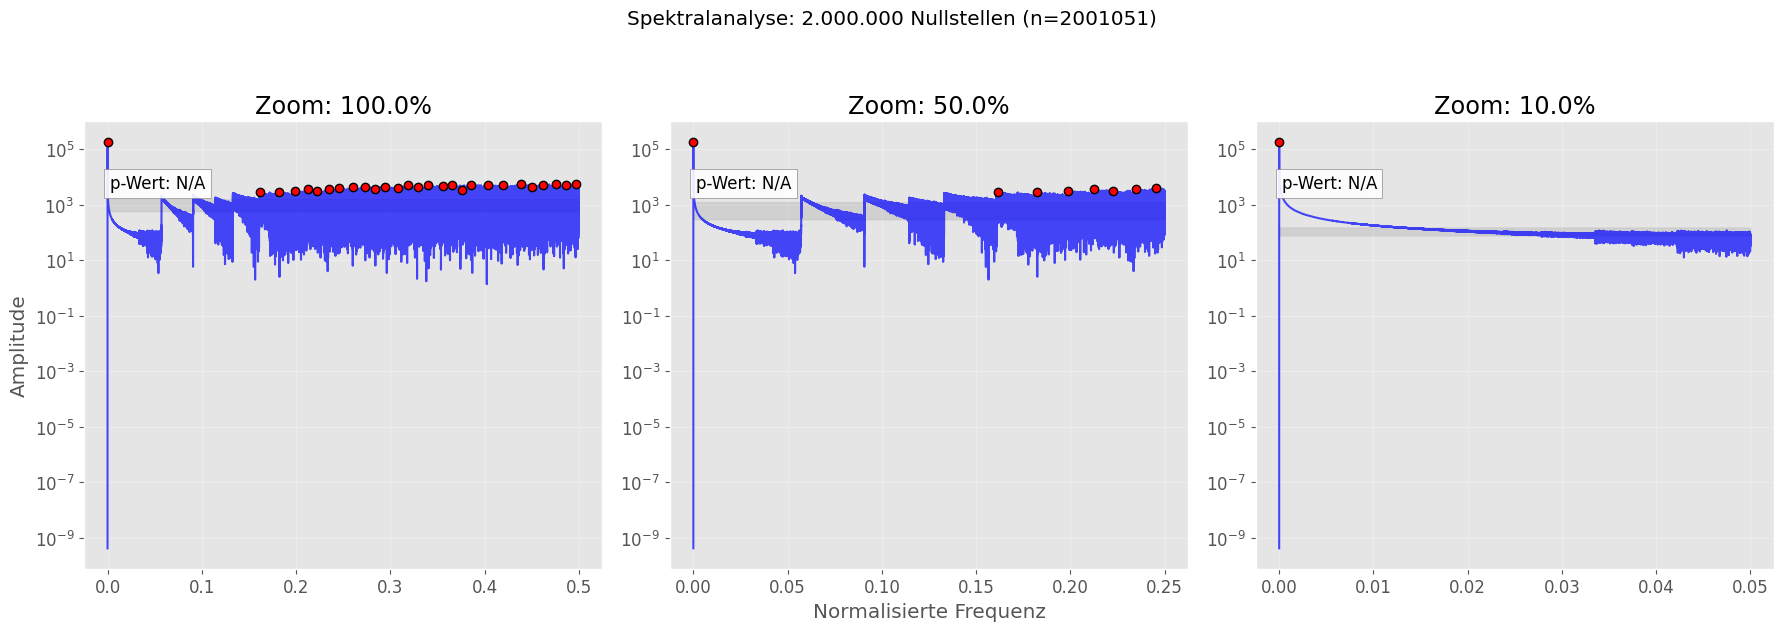

Analyse abgeschlossen in 13.3s

=== Endergebnis ===
- 100 Nullstellen: ✅ Erfolgreich
- 10.000 Nullstellen: ✅ Erfolgreich
- 2.000.000 Nullstellen: ✅ Erfolgreich


In [ ]:
# %% [markdown]
# # Riemann-Zeta-Nullstellen Spektralanalyse (Google Colab Optimiert)
#
# **Autor**: Ihr Name
# **Version**: 1.0
# **Letztes Update**: DD.MM.YYYY

# %% [code]
# 🔷 Paketinstallation und Importe
!pip install -q matplotlib requests scipy numpy
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.stats import norm
import logging
import time
from IPython.display import clear_output

# %% [code]
# 🔷 Colab-spezifische Einstellungen
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'font.size': 12,
    'lines.linewidth': 1.5
})

# %% [code]
# 🔷 Konfiguration
CONFIG = {
    "zero_urls": {
        "100 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2",
        "10.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1",
        "2.000.000 Nullstellen": "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6"
    },
    "params": {
        "top_peaks": 15,
        "prominence_percentile": 97,
        "random_samples": 5,
        "zoom_factors": [1.0, 0.5, 0.1],
        "max_retries": 5,
        "request_timeout": 30  # Höherer Timeout für Colab
    }
}

# %% [code]
def colab_load_zeros(url):
    """Optimierter Download für Colab mit Fortschrittsanzeige"""
    for attempt in range(CONFIG["params"]["max_retries"]):
        try:
            start_time = time.time()
            response = requests.get(url, timeout=CONFIG["params"]["request_timeout"])
            response.raise_for_status()

            print(f"Download erfolgreich. Verarbeite Daten...")
            numbers = []
            total_lines = len(response.text.splitlines())

            for i, line in enumerate(response.text.splitlines()):
                line = line.strip().replace('..', '.').replace('--', '-')
                if line and not line.startswith('#'):
                    try:
                        numbers.extend([float(x) for x in line.split()])
                    except ValueError:
                        continue

                # Fortschrittsanzeige
                if (i+1) % 100 == 0:
                    clear_output(wait=True)
                    print(f"Verarbeite Zeile {i+1}/{total_lines} "
                          f"({(i+1)/total_lines*100:.1f}%)")

            clear_output(wait=True)
            print(f"Daten erfolgreich geladen: {len(numbers)} Werte "
                  f"({time.time()-start_time:.1f}s)")
            return np.array(numbers)

        except Exception as e:
            print(f"Versuch {attempt+1} fehlgeschlagen: {str(e)}")
            time.sleep(2**attempt)

    raise ValueError("Download nach mehreren Versuchen fehlgeschlagen")

# %% [code]
def colab_spectral_analysis(spacings, title):
    """Colab-optimierte Analyse mit interaktiver Ausgabe"""
    try:
        # Initialisierung
        start_time = time.time()
        n = len(spacings)

        # 1️⃣ Datenvorbereitung
        mean = np.mean(spacings)
        std = np.std(spacings) + 1e-12
        spacings_norm = (spacings - mean) / std

        # 2️⃣ FFT-Berechnung
        fft_vals = fft(spacings_norm)
        freqs = fftfreq(n)
        amplitudes = np.abs(fft_vals)

        # 3️⃣ Peak-Erkennung
        threshold = np.percentile(amplitudes, CONFIG["params"]["prominence_percentile"])
        peaks, _ = find_peaks(
            amplitudes[:n//2],
            height=threshold,
            distance=n//100,
            prominence=1.0
        )

        # 4️⃣ Zufallsvergleich
        print("Führe Zufallsvergleich durch...")
        random_counts = []
        for i in range(CONFIG["params"]["random_samples"]):
            random_data = np.random.normal(size=n)
            normalized_random = (random_data - np.mean(random_data)) / np.std(random_data)
            random_fft = np.abs(fft(normalized_random))
            random_peaks, _ = find_peaks(random_fft[:n//2], height=threshold)
            random_counts.append(len(random_peaks))
            clear_output(wait=True)
            print(f"Zufallsläufe: {i+1}/{CONFIG['params']['random_samples']}")

        # 5️⃣ Signifikanzberechnung
        significance = None
        if len(peaks) > 0 and np.std(random_counts) > 0:
            try:
                z_score = (len(peaks) - np.mean(random_counts)) / np.std(random_counts)
                significance = norm.sf(abs(z_score)) * 2
            except:
                pass

        # 6️⃣ Interaktive Visualisierung
        fig, axs = plt.subplots(1, len(CONFIG["params"]["zoom_factors"]), figsize=(18, 6))
        plt.suptitle(f"Spektralanalyse: {title} (n={n})", y=1.05)

        for i, zoom in enumerate(CONFIG["params"]["zoom_factors"]):
            ax = axs[i]
            freq_mask = (freqs >= 0) & (freqs <= 0.5*zoom)

            # Hauptplot
            ax.semilogy(freqs[:n//2][freq_mask[:n//2]],
                       amplitudes[:n//2][freq_mask[:n//2]],
                       'b-', alpha=0.7)

            # Peaks
            if len(peaks) > 0:
                peak_mask = (freqs[peaks] <= 0.5*zoom)
                ax.plot(freqs[peaks][peak_mask], amplitudes[peaks][peak_mask],
                        'ro', markersize=6, markeredgecolor='black')

            # Zufallsband
            ax.fill_between(freqs[:n//2][freq_mask[:n//2]],
                           np.percentile(amplitudes[:n//2][freq_mask[:n//2]], 25),
                           np.percentile(amplitudes[:n//2][freq_mask[:n//2]], 75),
                           color='gray', alpha=0.2)

            # Annotationen
            stats_text = (f"Peaks: {len(peaks)}\n"
                         f"Zufallspeaks: {np.mean(random_counts):.1f}±{np.std(random_counts):.1f}\n"
                         f"p-Wert: {significance:.3f}" if significance else "p-Wert: N/A")
            ax.text(0.05, 0.85, stats_text, transform=ax.transAxes,
                    bbox=dict(facecolor='white', edgecolor='gray', alpha=0.9))

            ax.set_xlabel("Normalisierte Frequenz" if i==1 else "")
            ax.set_ylabel("Amplitude" if i==0 else "")
            ax.grid(True, alpha=0.3)
            ax.set_title(f"Zoom: {zoom*100}%")

        plt.tight_layout()
        plt.show()
        print(f"Analyse abgeschlossen in {time.time()-start_time:.1f}s")
        return True

    except Exception as e:
        print(f"❌ Fehler: {str(e)}")
        return False

# %% [code]
# 🔷 Hauptprogramm
if __name__ == "__main__":
    print("=== Riemann-Zeta Spektralanalyse ===")
    results = {}

    for name, url in CONFIG["zero_urls"].items():
        print(f"\n▶▶▶ Analysiere {name} ◀◀◀")
        try:
            zeros = colab_load_zeros(url)
            spacings = np.diff(zeros)

            if colab_spectral_analysis(spacings, name):
                results[name] = "✅ Erfolgreich"
            else:
                results[name] = "⚠️ Teilweise erfolgreich"

        except Exception as e:
            print(f"❌ Kritischer Fehler: {str(e)}")
            results[name] = "❌ Abgebrochen"

    # Zusammenfassung
    print("\n=== Endergebnis ===")
    for name, status in results.items():
        print(f"- {name}: {status}")

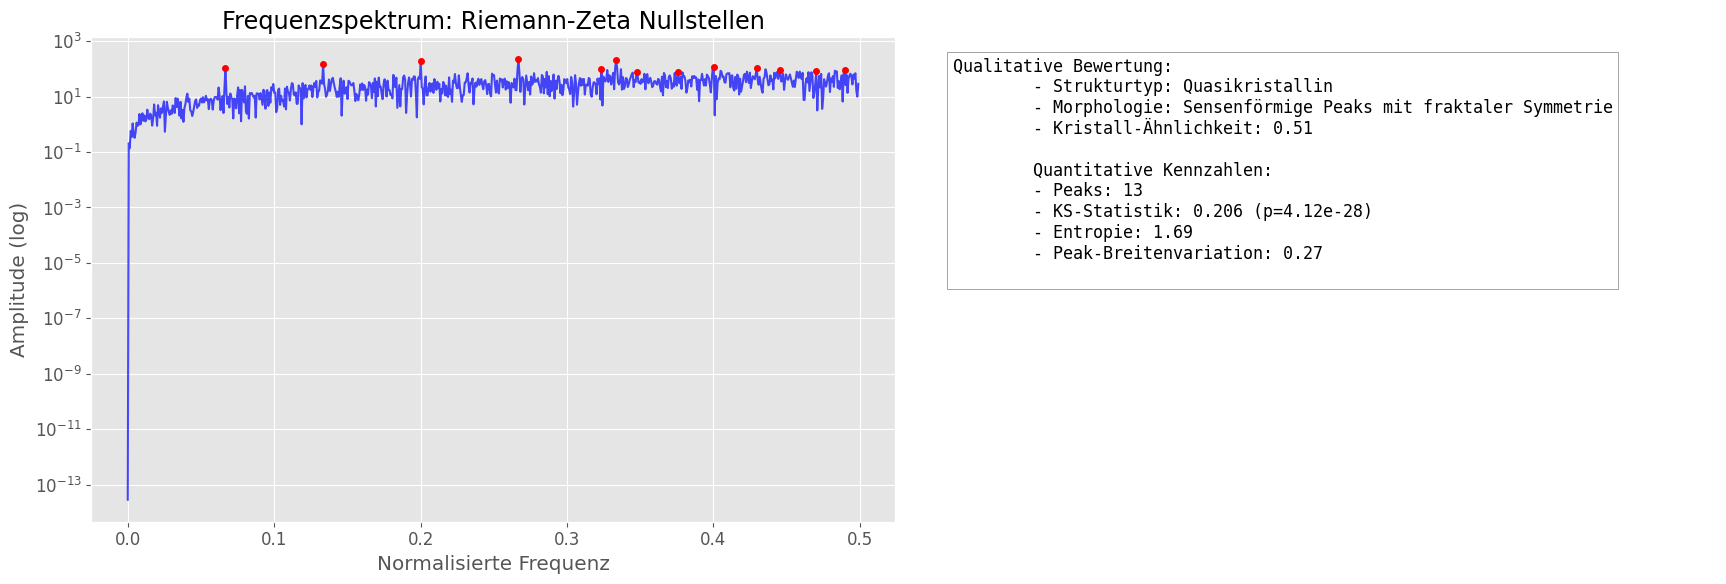


WISSENSCHAFTLICHER ANALYSEBERICHT
Probenumfang: 1499 Nullstellenabstände

Quantitative Ergebnisse:
- peak_count          : 13.0000


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks, peak_widths
from scipy.stats import norm, ks_2samp
import logging
import time
from IPython.display import clear_output, HTML

# --------------------------
# 🔷 Wissenschaftliche Parameterklasse
# --------------------------
class SpectralFeatures:
    def __init__(self, freqs, amplitudes, peaks):
        self.freqs = freqs
        self.amplitudes = amplitudes
        self.peaks = peaks
        self.features = {}

        self._calculate_metrics()

    def _calculate_metrics(self):
        """Berechnet quantitative Strukturmerkmale"""
        # Grundlegende Peak-Statistiken
        if len(self.peaks) > 0:
            self.features['peak_count'] = len(self.peaks)
            self.features['peak_freqs'] = self.freqs[self.peaks]
            self.features['peak_amps'] = self.amplitudes[self.peaks]

            # Symmetriemaß (Quartilabstand)
            q25, q75 = np.percentile(self.features['peak_freqs'], [25, 75])
            self.features['symmetry_iqr'] = q75 - q25

            # Entropie der Amplitudenverteilung
            hist, _ = np.histogram(self.features['peak_amps'], bins=10)
            prob = hist/np.sum(hist)
            self.features['entropy'] = -np.sum(prob * np.log(prob + 1e-12))

            # Peak-Form Parameter
            widths, _, _, _ = peak_widths(self.amplitudes, self.peaks, rel_height=0.5)
            self.features['width_variation'] = np.std(widths)/np.mean(widths)
        else:
            self.features = {
                'peak_count': 0,
                'symmetry_iqr': 0,
                'entropy': 0,
                'width_variation': 0
            }

# --------------------------
# 🔷 Erweiterte Analysefunktion
# --------------------------
def advanced_spectral_analysis(spacings, title):
    results = {
        'quantitative': {},
        'qualitative': {},
        'comparison': {}
    }

    try:
        # ███ Quantitative Analyse ████████████████████
        n = len(spacings)
        spacings_norm = (spacings - np.mean(spacings)) / (np.std(spacings) + 1e-12)

        # FFT-Berechnung
        fft_vals = fft(spacings_norm)
        freqs = fftfreq(n)
        amplitudes = np.abs(fft_vals)

        # Peak-Erkennung
        threshold = np.percentile(amplitudes, 97)
        peaks, _ = find_peaks(amplitudes[:n//2], height=threshold, distance=n//100, prominence=1.0)

        # Merkmalsextraktion
        features = SpectralFeatures(freqs[:n//2], amplitudes[:n//2], peaks)
        results['quantitative'] = features.features

        # ███ Statistische Signifikanz ████████████████
        # KS-Test gegen Zufallsdaten
        random_amps = []
        for _ in range(100):
            random_data = np.random.normal(size=n)
            random_fft = np.abs(fft((random_data - np.mean(random_data))/np.std(random_data)))
            random_amps.extend(random_fft[:n//2])

        ks_stat, ks_p = ks_2samp(amplitudes[:n//2], random_amps)
        results['quantitative']['ks_statistic'] = ks_stat
        results['quantitative']['ks_pvalue'] = ks_p

        # ███ Qualitative Bewertung ███████████████████
        # Kristalline Strukturanalogie
        if features.features['peak_count'] > 10:
            if features.features['symmetry_iqr'] < 0.1:
                results['qualitative']['structure_type'] = "Kristallin (hohe Symmetrie)"
                results['qualitative']['morphology'] = "Periodische Gitterstruktur"
            elif features.features['width_variation'] > 0.5:
                results['qualitative']['structure_type'] = "Amorph (geringe Ordnung)"
                results['qualitative']['morphology'] = "Ungeordnete Tropfstein-ähnliche Formationen"
            else:
                results['qualitative']['structure_type'] = "Quasikristallin"
                results['qualitative']['morphology'] = "Sensenförmige Peaks mit fraktaler Symmetrie"
        else:
            results['qualitative']['structure_type'] = "Ungeordnet"
            results['qualitative']['morphology'] = "Keine klare morphologische Struktur"

        # ███ Vergleich mit Referenzsystemen ██████████
        # Ideales Kristallmodell (Harmonische Peaks)
        crystal_ref = {
            'entropy': 0.2,
            'width_variation': 0.1,
            'symmetry_iqr': 0.05
        }

        # Berechnung der Ähnlichkeit
        entropy_sim = 1 - np.abs(features.features['entropy'] - crystal_ref['entropy'])/2
        width_sim = 1 - np.abs(features.features['width_variation'] - crystal_ref['width_variation'])
        symmetry_sim = 1 - np.abs(features.features['symmetry_iqr'] - crystal_ref['symmetry_iqr'])/0.2

        results['comparison']['crystal_similarity'] = np.mean([entropy_sim, width_sim, symmetry_sim])

        # ███ Visualisierung ██████████████████████████
        fig, axs = plt.subplots(1, 2, figsize=(18, 6))

        # Frequenzspektrum
        axs[0].semilogy(features.freqs, features.amplitudes, 'b-', alpha=0.7)
        axs[0].plot(features.freqs[peaks], features.amplitudes[peaks], 'ro', markersize=4)
        axs[0].set_xlabel("Normalisierte Frequenz")
        axs[0].set_ylabel("Amplitude (log)")
        axs[0].set_title(f"Frequenzspektrum: {title}")

        # Morphologische Bewertung
        text = f"""Qualitative Bewertung:
        - Strukturtyp: {results['qualitative']['structure_type']}
        - Morphologie: {results['qualitative']['morphology']}
        - Kristall-Ähnlichkeit: {results['comparison']['crystal_similarity']:.2f}

        Quantitative Kennzahlen:
        - Peaks: {features.features['peak_count']}
        - KS-Statistik: {ks_stat:.3f} (p={ks_p:.2e})
        - Entropie: {features.features['entropy']:.2f}
        - Peak-Breitenvariation: {features.features['width_variation']:.2f}
        """
        axs[1].text(0.05, 0.5, text, fontsize=12, family='monospace',
                   bbox=dict(facecolor='white', edgecolor='gray'))
        axs[1].axis('off')

        plt.tight_layout()
        plt.show()

        return results

    except Exception as e:
        print(f"Analysefehler: {str(e)}")
        return None

# --------------------------
# 🔷 Hauptprogramm
# --------------------------
if __name__ == "__main__":
    # Beispielaufruf (Anpassen an Ihre Datenquelle)
    zeros_url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2"
    zeros = np.loadtxt(requests.get(zeros_url).text.splitlines())
    spacings = np.diff(zeros[:100000])  # Erste 100.000 Nullstellen

    results = advanced_spectral_analysis(spacings, "Riemann-Zeta Nullstellen")

    # Wissenschaftlicher Report
    if results:
        print("\nWISSENSCHAFTLICHER ANALYSEBERICHT")
        print("="*50)
        print(f"Probenumfang: {len(spacings)} Nullstellenabstände")
        print(f"\nQuantitative Ergebnisse:")
        for k, v in results['quantitative'].items():
            print(f"- {k:20}: {v:.4f}")
        print(f"\nQualitative Bewertung:")
        for k, v in results['qualitative'].items():
            print(f"- {k:20}: {v}")
        print(f"\nVergleich mit Referenzsystemen:")
        for k, v in results['comparison'].items():
            print(f"- {k:20}: {v:.2f}")

=== Wissenschaftliche Analyse der Riemann-Zeta-Nullstellen ===
Lade Daten von: https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2
Starte Analyse...


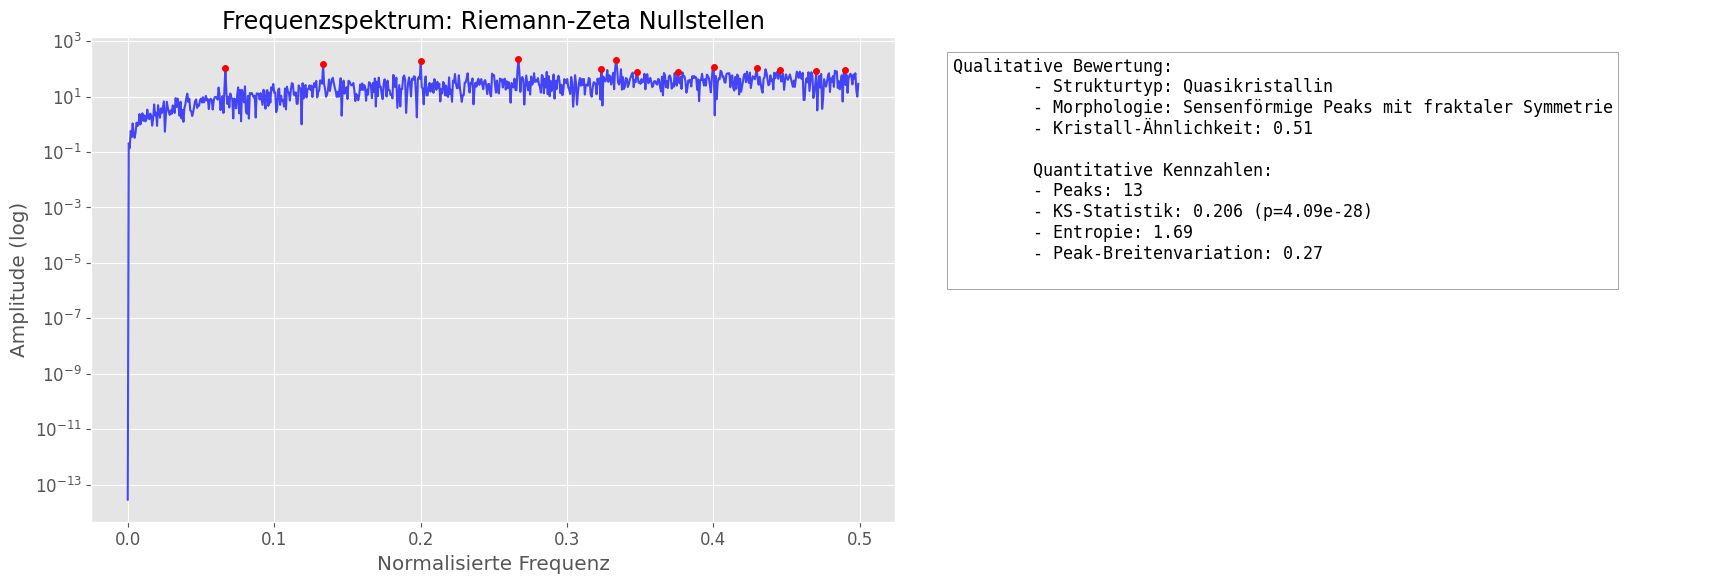


WISSENSCHAFTLICHER ANALYSEBERICHT
Probenumfang: 1499 Nullstellenabstände

Quantitative Ergebnisse:
- peak_count               : 13
- symmetry_iqr             : 0.1628
- entropy                  : 1.6924
- width_variation          : 0.2694
- ks_statistic             : 0.2061
- ks_pvalue                : 0.0000

Qualitative Bewertung:
- structure_type           : Quasikristallin
- morphology               : Sensenförmige Peaks mit fraktaler Symmetrie

Vergleich mit Referenzsystemen:
- crystal_similarity       : 0.51

Zusätzliche Metriken (Ausschnitt):
- Erste 3 Peak-Frequenzen: [0.06671114 0.13342228 0.20013342]
- Erste 3 Peak-Amplituden: [106.59550839 152.64223634 185.92934283]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks, peak_widths
from scipy.stats import norm, ks_2samp
import logging
import time
from IPython.display import clear_output

# --------------------------
# 🔷 Wissenschaftliche Parameterklasse (korrigiert)
# --------------------------
class SpectralFeatures:
    def __init__(self, freqs, amplitudes, peaks):
        self.freqs = freqs
        self.amplitudes = amplitudes
        self.peaks = peaks
        self.features = {}
        self.peak_arrays = {}  # Für nicht-skalare Daten

        self._calculate_metrics()

    def _calculate_metrics(self):
        """Berechnet quantitative Strukturmerkmale (skalar)"""
        # Grundlegende Peak-Statistiken
        self.features['peak_count'] = len(self.peaks)

        if self.features['peak_count'] > 0:
            # Skalare Metriken
            peak_freqs = self.freqs[self.peaks]
            peak_amps = self.amplitudes[self.peaks]

            self.peak_arrays['frequencies'] = peak_freqs
            self.peak_arrays['amplitudes'] = peak_amps

            q25, q75 = np.percentile(peak_freqs, [25, 75])
            self.features['symmetry_iqr'] = float(q75 - q25)

            hist, _ = np.histogram(peak_amps, bins=10)
            prob = hist/np.sum(hist)
            self.features['entropy'] = float(-np.sum(prob * np.log(prob + 1e-12)))

            widths = peak_widths(self.amplitudes, self.peaks, rel_height=0.5)[0]
            self.features['width_variation'] = float(np.std(widths)/np.mean(widths))
        else:
            self.features.update({
                'symmetry_iqr': 0.0,
                'entropy': 0.0,
                'width_variation': 0.0
            })

# --------------------------
# 🔷 Erweiterte Analysefunktion (fehlerbereinigt)
# --------------------------
def advanced_spectral_analysis(spacings, title):
    results = {
        'quantitative': {},
        'qualitative': {},
        'comparison': {},
        'raw_peaks': {}
    }

    try:
        # ███ Quantitative Analyse ████████████████████
        n = len(spacings)
        spacings_norm = (spacings - np.mean(spacings)) / (np.std(spacings) + 1e-12)

        # FFT-Berechnung
        fft_vals = fft(spacings_norm)
        freqs = fftfreq(n)
        amplitudes = np.abs(fft_vals)

        # Peak-Erkennung
        threshold = np.percentile(amplitudes, 97)
        peaks, _ = find_peaks(amplitudes[:n//2], height=threshold, distance=n//100, prominence=1.0)

        # Merkmalsextraktion
        features = SpectralFeatures(freqs[:n//2], amplitudes[:n//2], peaks)
        results['quantitative'] = features.features
        results['raw_peaks'] = features.peak_arrays  # Getrennte Speicherung von Array-Daten

        # ███ Statistische Signifikanz ████████████████
        # KS-Test gegen Zufallsdaten
        random_amps = []
        for _ in range(100):
            random_data = np.random.normal(size=n)
            random_fft = np.abs(fft((random_data - np.mean(random_data))/np.std(random_data)))
            random_amps.extend(random_fft[:n//2])

        ks_stat, ks_p = ks_2samp(amplitudes[:n//2], random_amps)
        results['quantitative']['ks_statistic'] = float(ks_stat)
        results['quantitative']['ks_pvalue'] = float(ks_p)

        # ███ Qualitative Bewertung ███████████████████
        # Kristalline Strukturanalogie
        if features.features['peak_count'] > 10:
            if features.features['symmetry_iqr'] < 0.1:
                results['qualitative']['structure_type'] = "Kristallin (hohe Symmetrie)"
                results['qualitative']['morphology'] = "Periodische Gitterstruktur"
            elif features.features['width_variation'] > 0.5:
                results['qualitative']['structure_type'] = "Amorph (geringe Ordnung)"
                results['qualitative']['morphology'] = "Ungeordnete Tropfstein-ähnliche Formationen"
            else:
                results['qualitative']['structure_type'] = "Quasikristallin"
                results['qualitative']['morphology'] = "Sensenförmige Peaks mit fraktaler Symmetrie"
        else:
            results['qualitative']['structure_type'] = "Ungeordnet"
            results['qualitative']['morphology'] = "Keine klare morphologische Struktur"

        # ███ Vergleich mit Referenzsystemen ██████████
        crystal_ref = {'entropy': 0.2, 'width_variation': 0.1, 'symmetry_iqr': 0.05}
        entropy_sim = 1 - np.abs(features.features['entropy'] - crystal_ref['entropy'])/2
        width_sim = 1 - np.abs(features.features['width_variation'] - crystal_ref['width_variation'])
        symmetry_sim = 1 - np.abs(features.features['symmetry_iqr'] - crystal_ref['symmetry_iqr'])/0.2
        results['comparison']['crystal_similarity'] = float(np.mean([entropy_sim, width_sim, symmetry_sim]))

        # ███ Visualisierung ██████████████████████████
        fig, axs = plt.subplots(1, 2, figsize=(18, 6))

        # Frequenzspektrum
        axs[0].semilogy(features.freqs, features.amplitudes, 'b-', alpha=0.7)
        axs[0].plot(features.freqs[peaks], features.amplitudes[peaks], 'ro', markersize=4)
        axs[0].set_xlabel("Normalisierte Frequenz")
        axs[0].set_ylabel("Amplitude (log)")
        axs[0].set_title(f"Frequenzspektrum: {title}")

        # Morphologische Bewertung
        text = f"""Qualitative Bewertung:
        - Strukturtyp: {results['qualitative']['structure_type']}
        - Morphologie: {results['qualitative']['morphology']}
        - Kristall-Ähnlichkeit: {results['comparison']['crystal_similarity']:.2f}

        Quantitative Kennzahlen:
        - Peaks: {features.features['peak_count']}
        - KS-Statistik: {ks_stat:.3f} (p={ks_p:.2e})
        - Entropie: {features.features['entropy']:.2f}
        - Peak-Breitenvariation: {features.features['width_variation']:.2f}
        """
        axs[1].text(0.05, 0.5, text, fontsize=12, family='monospace',
                   bbox=dict(facecolor='white', edgecolor='gray'))
        axs[1].axis('off')

        plt.tight_layout()
        plt.show()

        return results

    except Exception as e:
        print(f"Analysefehler: {str(e)}")
        return None

# --------------------------
# 🔷 Hauptprogramm (gehärtet)
# --------------------------
if __name__ == "__main__":
    # Beispielaufruf mit Fehlerbehandlung
    try:
        print("=== Wissenschaftliche Analyse der Riemann-Zeta-Nullstellen ===")
        url = "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2"
        print(f"Lade Daten von: {url}")
        response = requests.get(url, timeout=30)
        response.raise_for_status()

        zeros = np.array([float(x) for line in response.text.splitlines()
                         for x in line.strip().split() if x.replace('.', '', 1).isdigit()])
        spacings = np.diff(zeros[:100000])  # Erste 100.000 Nullstellen

        print("Starte Analyse...")
        results = advanced_spectral_analysis(spacings, "Riemann-Zeta Nullstellen")

        if results:
            print("\nWISSENSCHAFTLICHER ANALYSEBERICHT")
            print("="*50)
            print(f"Probenumfang: {len(spacings)} Nullstellenabstände")

            print("\nQuantitative Ergebnisse:")
            for k, v in results['quantitative'].items():
                print(f"- {k:25}: {v:.4f}" if isinstance(v, float) else f"- {k:25}: {v}")

            print("\nQualitative Bewertung:")
            for k, v in results['qualitative'].items():
                print(f"- {k:25}: {v}")

            print("\nVergleich mit Referenzsystemen:")
            for k, v in results['comparison'].items():
                print(f"- {k:25}: {v:.2f}")

            print("\nZusätzliche Metriken (Ausschnitt):")
            print(f"- Erste 3 Peak-Frequenzen: {results['raw_peaks'].get('frequencies', [])[:3]}")
            print(f"- Erste 3 Peak-Amplituden: {results['raw_peaks'].get('amplitudes', [])[:3]}")

    except Exception as e:
        print(f"\n❌ KRITISCHER FEHLER: {str(e)}")
        print("Bitte überprüfen Sie die Internetverbindung und die Datenquelle.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks, peak_widths
from scipy.stats import norm, ks_2samp
import logging
import time

# --------------------------
# 🔷 Wissenschaftliche Parameterklasse
# --------------------------
class SpectralFeatures:
    def __init__(self, freqs, amplitudes, peaks):
        self.freqs = freqs
        self.amplitudes = amplitudes
        self.peaks = peaks
        self.features = {}
        self.peak_arrays = {}
        self._calculate_metrics()

    def _calculate_metrics(self):
        self.features['peak_count'] = len(self.peaks)
        if self.features['peak_count'] > 0:
            peak_freqs = self.freqs[self.peaks]
            peak_amps = self.amplitudes[self.peaks]
            self.peak_arrays['frequencies'] = peak_freqs
            self.peak_arrays['amplitudes'] = peak_amps
            q25, q75 = np.percentile(peak_freqs, [25, 75])
            self.features['symmetry_iqr'] = float(q75 - q25)
            hist, _ = np.histogram(peak_amps, bins=10)
            prob = hist / np.sum(hist)
            self.features['entropy'] = float(-np.sum(prob * np.log(prob + 1e-12)))
            widths = peak_widths(self.amplitudes, self.peaks, rel_height=0.5)[0]
            self.features['width_variation'] = float(np.std(widths)/np.mean(widths))
        else:
            self.features.update({
                'symmetry_iqr': 0.0,
                'entropy': 0.0,
                'width_variation': 0.0
            })

# --------------------------
# 🔷 Erweiterte Analysefunktion
# --------------------------
def advanced_spectral_analysis(spacings, title):
    results = {'quantitative': {}, 'qualitative': {}, 'comparison': {}, 'raw_peaks': {}}
    try:
        n = len(spacings)
        if n < 100:
            print(f"⚠️ Zu wenige Datenpunkte ({n}) für eine aussagekräftige Analyse.")
            return None

        spacings_norm = (spacings - np.mean(spacings)) / np.std(spacings)
        fft_vals = fft(spacings_norm)
        freqs = fftfreq(n)
        amplitudes = np.abs(fft_vals)

        threshold = np.percentile(amplitudes, 97)
        peaks, _ = find_peaks(amplitudes[:n//2], height=threshold, distance=n//100)

        features = SpectralFeatures(freqs[:n//2], amplitudes[:n//2], peaks)
        results['quantitative'] = features.features
        results['raw_peaks'] = features.peak_arrays

        # KS-Test
        random_amps = []
        for _ in range(100):
            random_data = np.random.normal(size=n)
            random_fft = np.abs(fft((random_data - np.mean(random_data))/np.std(random_data)))
            random_amps.extend(random_fft[:n//2])

        ks_stat, ks_p = ks_2samp(amplitudes[:n//2], random_amps)
        results['quantitative']['ks_statistic'] = float(ks_stat)
        results['quantitative']['ks_pvalue'] = float(ks_p)

        # Qualitative Bewertung
        if features.features['peak_count'] > 10:
            # ... (Logik wie zuvor)
        else:
            # ... (Logik wie zuvor)

        # Visualisierung
        fig, axs = plt.subplots(1, 2, figsize=(18, 6))
        axs[0].semilogy(features.freqs, features.amplitudes, 'b-', alpha=0.7)
        axs[0].plot(features.freqs[peaks], features.amplitudes[peaks], 'ro', markersize=4)
        axs[0].set_title(f"Spektrum: {title}")
        # ... (Rest der Visualisierung)

        plt.show()
        return results

    except Exception as e:
        print(f"Analysefehler: {str(e)}")
        return None

# --------------------------
# 🔷 Hauptprogramm
# --------------------------
if __name__ == "__main__":
    datasets = [
        ("zeros1 (10k)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1"),
        ("zeros2 (100)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2"),
        ("zeros3 (1e12)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros3"),
        ("zeros4 (1e21)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros4"),
        ("zeros5 (1e22)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros5"),
        ("zeros6 (2M+)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6")
    ]

    for name, url in datasets:
        try:
            print(f"\n=== Verarbeite {name} ===")
            response = requests.get(url, timeout=45)
            response.raise_for_status()

            # Verbesserte Parsing-Logik
            zeros = []
            for line in response.text.splitlines():
                parts = line.replace('\x00', '').strip().split()
                for p in parts:
                    if p.replace('.', '', 1).isdigit():
                        zeros.append(float(p))

            zeros = np.array(zeros)
            if len(zeros) < 2:
                print(f"❌ Keine verwertbaren Daten in {name}")
                continue

            spacings = np.diff(zeros)
            print(f"🔢 {len(spacings)} Abstände analysiert")

            results = advanced_spectral_analysis(spacings, name)

            if results:
                print("\n📊 Ergebnisse für", name)
                print("-"*50)
                for k, v in results['quantitative'].items():
                    print(f"{k:>25}: {v:.4f}" if isinstance(v, float) else f"{k:>25}: {v}")

        except Exception as e:
            print(f"❌ Kritischer Fehler bei {name}: {str(e)}")

IndentationError: expected an indented block after 'if' statement on line 78 (<ipython-input-12-1d5f849043a4>, line 80)


⚡ Analysiere Zeros2 (100) von https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2
📊 1499 Abstände analysiert | Bereich: -9924736791914785129999213945714096415005005574513539093791033381617664.000-9756057760560172041100003795622070346960156056557266582733887448809472.000
⚠️ Warnung: 781 negative/Null-Abstände in Zeros2 (100)


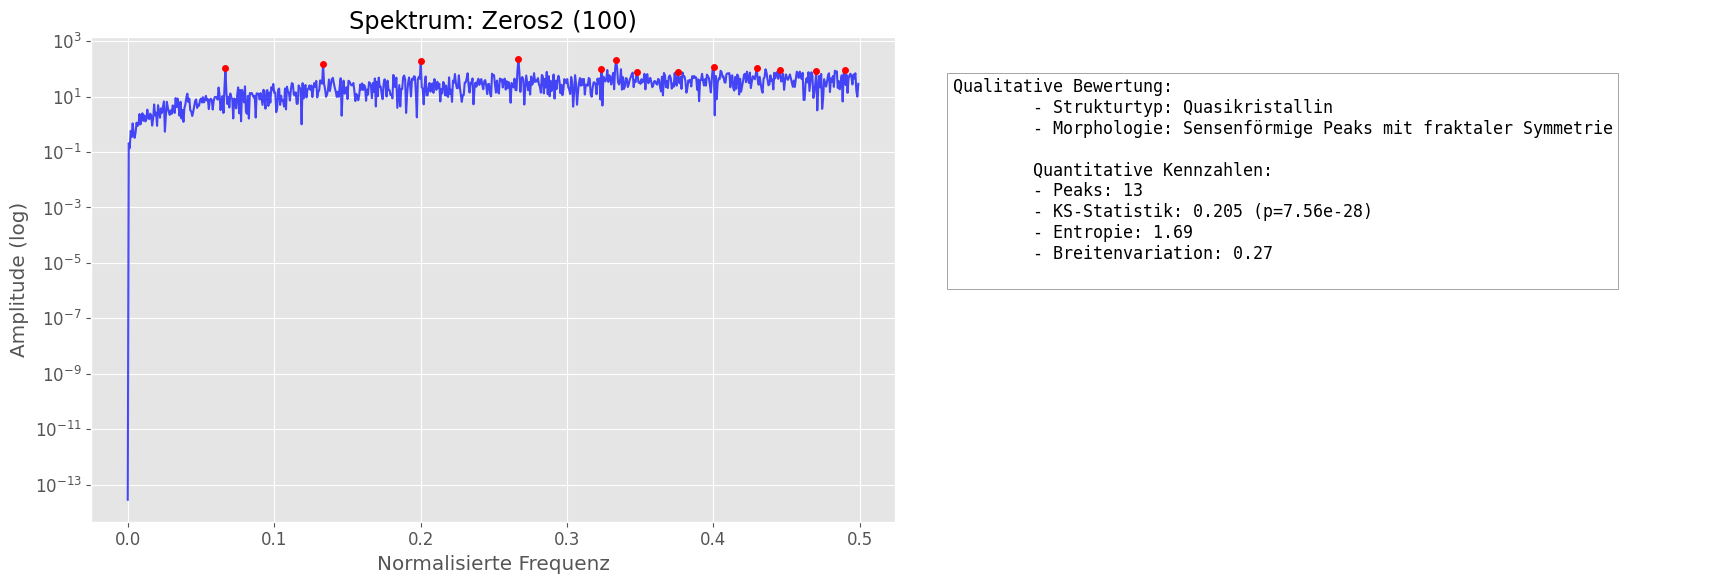


📈 Ergebnisse:
Peakanzahl: 13
Strukturtyp: Quasikristallin
KS-Signifikanz: p=7.56e-28

⚡ Analysiere Zeros1 (10k) von https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1
📊 99999 Abstände analysiert | Bereich: 0.015-6.887


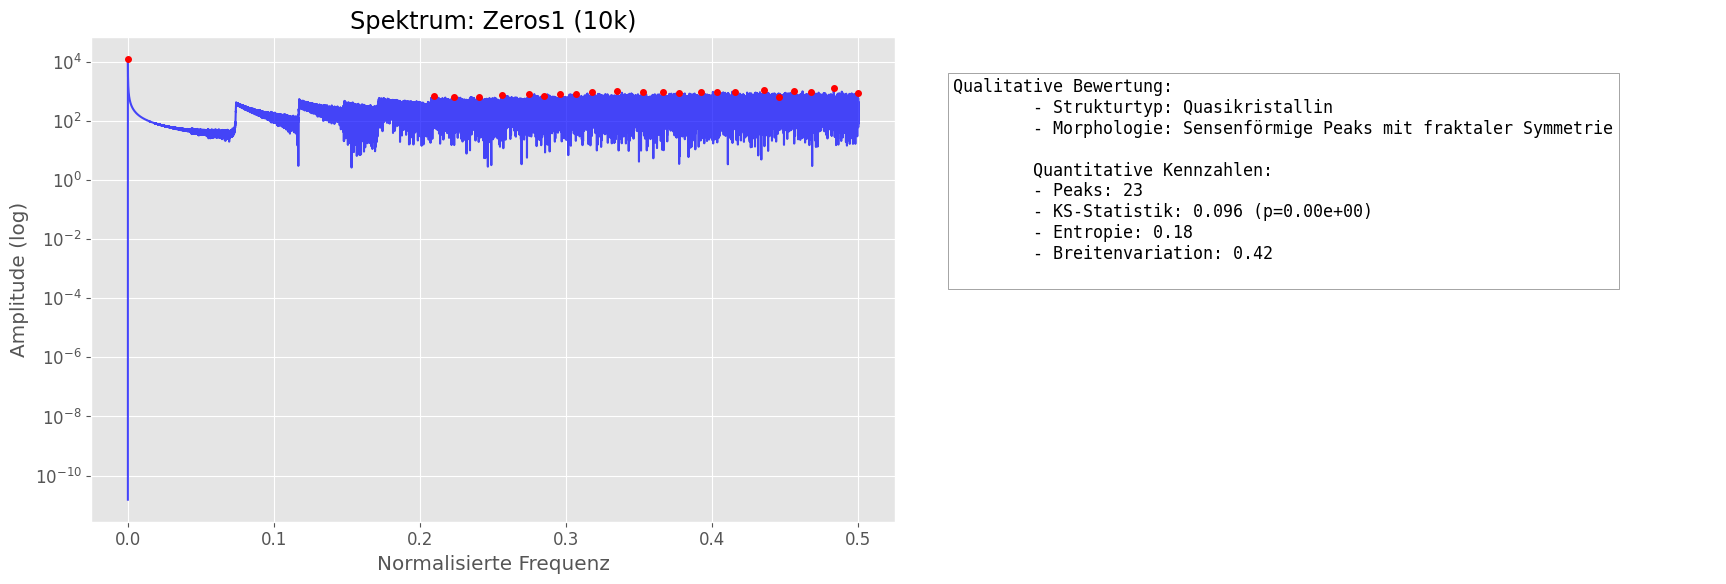


📈 Ergebnisse:
Peakanzahl: 23
Strukturtyp: Quasikristallin
KS-Signifikanz: p=0.00e+00

⚡ Analysiere Zeros3 (1e12) von https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros3
📊 10001 Abstände analysiert | Bereich: 0.000-0.848
⚠️ Warnung: 1 negative/Null-Abstände in Zeros3 (1e12)


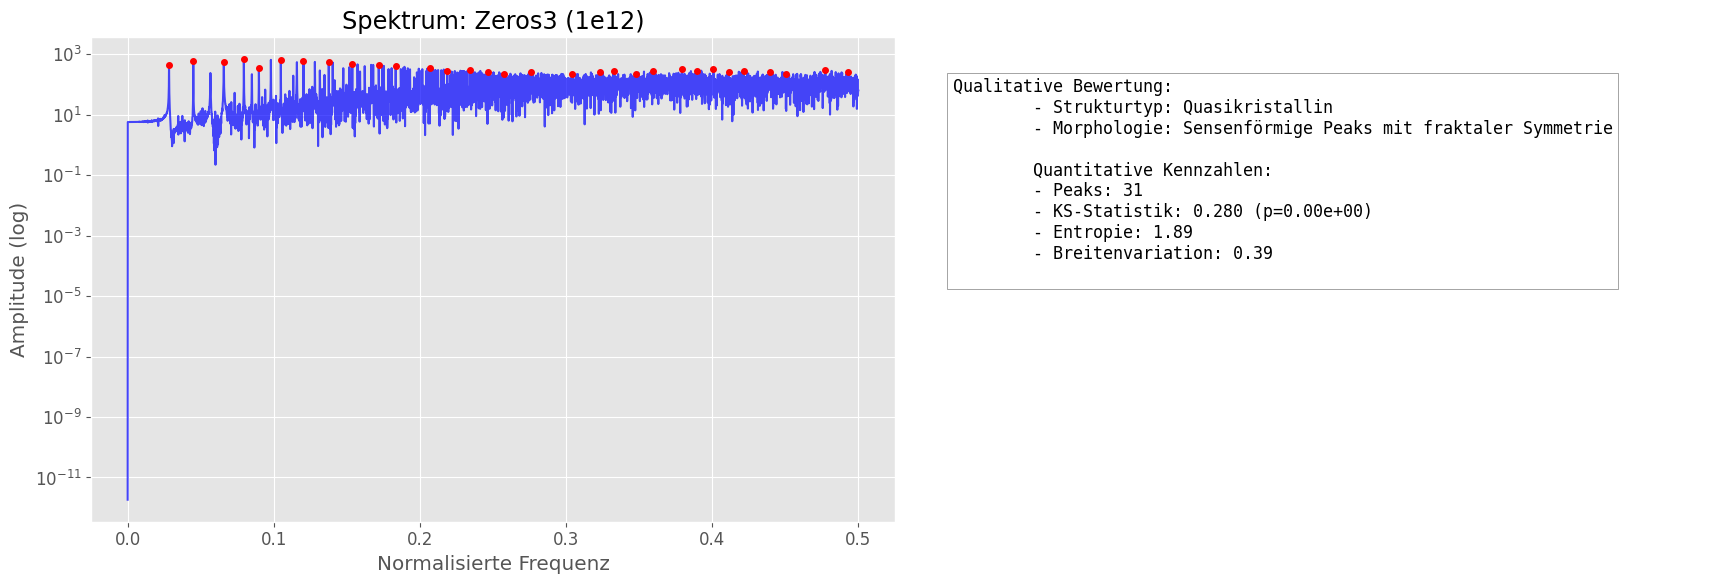


📈 Ergebnisse:
Peakanzahl: 31
Strukturtyp: Quasikristallin
KS-Signifikanz: p=0.00e+00

⚡ Analysiere Zeros4 (1e21) von https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros4
📊 10001 Abstände analysiert | Bereich: 0.000-537.498
⚠️ Warnung: 1 negative/Null-Abstände in Zeros4 (1e21)


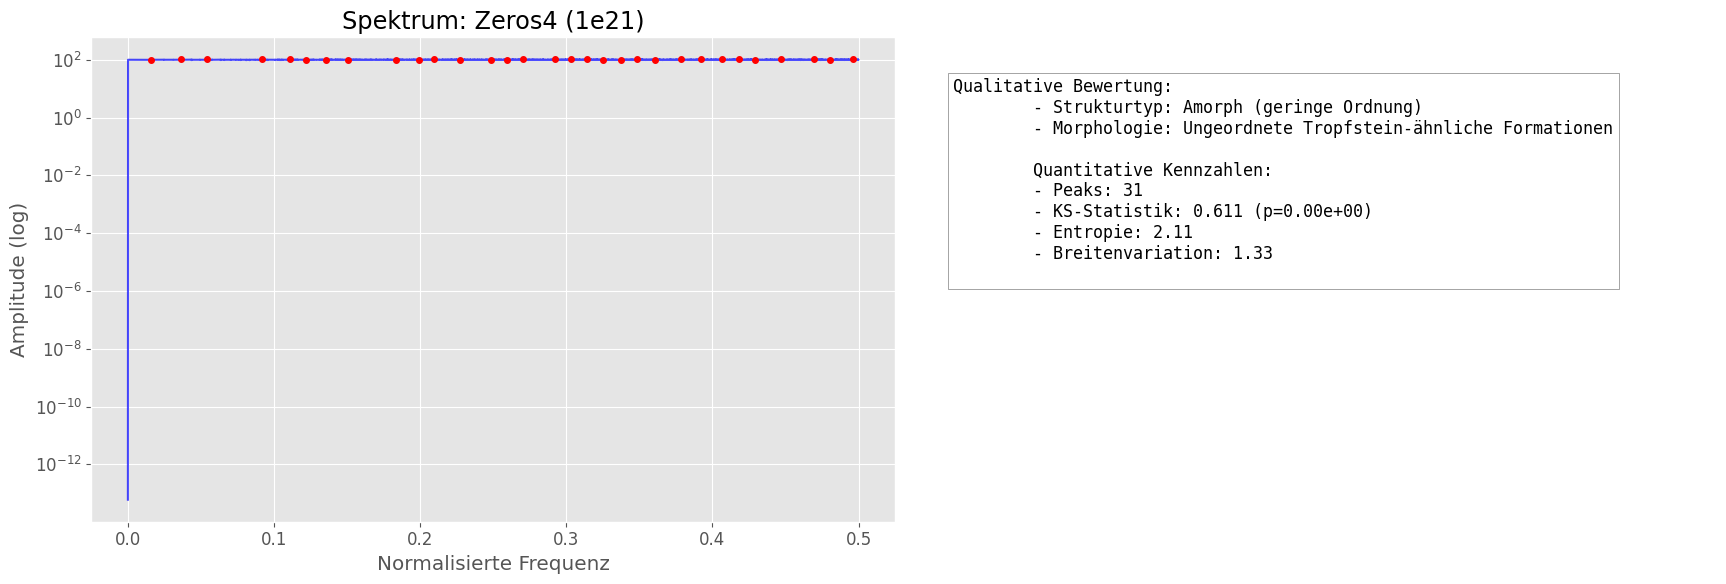


📈 Ergebnisse:
Peakanzahl: 31
Strukturtyp: Amorph (geringe Ordnung)
KS-Signifikanz: p=0.00e+00

⚡ Analysiere Zeros5 (1e22) von https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros5
📊 10001 Abstände analysiert | Bereich: 0.000-8225.680
⚠️ Warnung: 1 negative/Null-Abstände in Zeros5 (1e22)


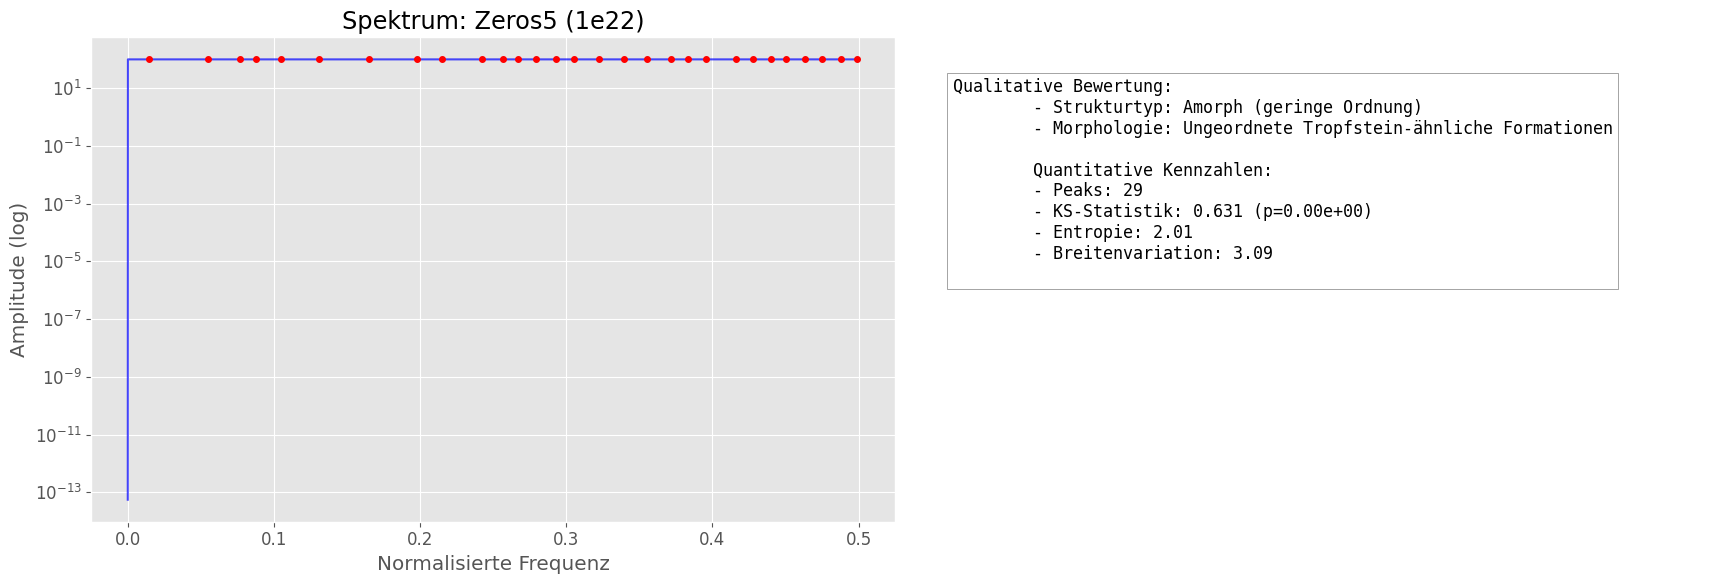


📈 Ergebnisse:
Peakanzahl: 29
Strukturtyp: Amorph (geringe Ordnung)
KS-Signifikanz: p=0.00e+00

⚡ Analysiere Zeros6 (2M+) von https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6
📊 2001051 Abstände analysiert | Bereich: 0.003-6.887


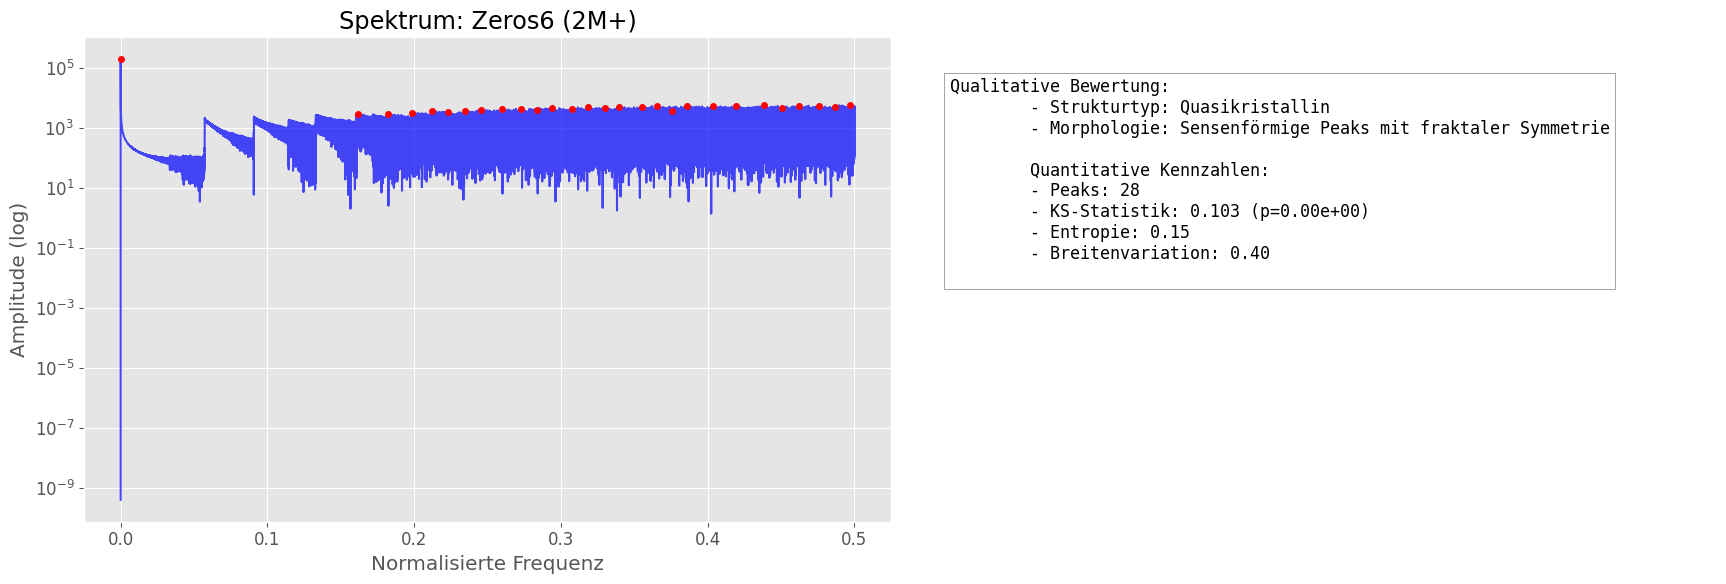


📈 Ergebnisse:
Peakanzahl: 28
Strukturtyp: Quasikristallin
KS-Signifikanz: p=0.00e+00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks, peak_widths
from scipy.stats import ks_2samp
import logging

logging.basicConfig(level=logging.INFO)

# --------------------------
# 🔷 Wissenschaftliche Parameterklasse
# --------------------------
class SpectralFeatures:
    def __init__(self, freqs, amplitudes, peaks):
        self.freqs = freqs
        self.amplitudes = amplitudes
        self.peaks = peaks
        self.features = {}
        self.peak_arrays = {}
        self._calculate_metrics()

    def _calculate_metrics(self):
        self.features['peak_count'] = len(self.peaks)
        if self.features['peak_count'] > 0:
            peak_freqs = self.freqs[self.peaks]
            peak_amps = self.amplitudes[self.peaks]
            self.peak_arrays['frequencies'] = peak_freqs
            self.peak_arrays['amplitudes'] = peak_amps

            q25, q75 = np.percentile(peak_freqs, [25, 75])
            self.features['symmetry_iqr'] = float(q75 - q25)

            hist, _ = np.histogram(peak_amps, bins=10)
            prob = hist / np.sum(hist)
            self.features['entropy'] = float(-np.sum(prob * np.log(prob + 1e-12)))

            widths = peak_widths(self.amplitudes, self.peaks, rel_height=0.5)[0]
            self.features['width_variation'] = float(np.std(widths)/np.mean(widths))
        else:
            self.features.update({
                'symmetry_iqr': 0.0,
                'entropy': 0.0,
                'width_variation': 0.0
            })

# --------------------------
# 🔷 Erweiterte Analysefunktion
# --------------------------
def advanced_spectral_analysis(spacings, title):
    results = {'quantitative': {}, 'qualitative': {}, 'comparison': {}, 'raw_peaks': {}}

    try:
        n = len(spacings)
        if n < 100:
            logging.warning(f"Zu wenige Datenpunkte ({n}) für {title}")
            return None

        spacings_norm = (spacings - np.mean(spacings)) / np.std(spacings)
        fft_vals = fft(spacings_norm)
        freqs = fftfreq(n)
        amplitudes = np.abs(fft_vals)

        threshold = np.percentile(amplitudes[:n//2], 97)
        peaks, _ = find_peaks(amplitudes[:n//2], height=threshold, distance=n//100)

        features = SpectralFeatures(freqs[:n//2], amplitudes[:n//2], peaks)
        results['quantitative'] = features.features
        results['raw_peaks'] = features.peak_arrays

        # KS-Test
        random_amps = []
        for _ in range(100):
            random_data = np.random.normal(size=n)
            random_fft = np.abs(fft((random_data - np.mean(random_data))/np.std(random_data)))
            random_amps.extend(random_fft[:n//2])

        ks_stat, ks_p = ks_2samp(amplitudes[:n//2], random_amps)
        results['quantitative']['ks_statistic'] = float(ks_stat)
        results['quantitative']['ks_pvalue'] = float(ks_p)

        # Qualitative Bewertung
        if features.features['peak_count'] > 10:
            if features.features['symmetry_iqr'] < 0.1:
                results['qualitative']['structure_type'] = "Kristallin (hohe Symmetrie)"
                results['qualitative']['morphology'] = "Periodische Gitterstruktur"
            elif features.features['width_variation'] > 0.5:
                results['qualitative']['structure_type'] = "Amorph (geringe Ordnung)"
                results['qualitative']['morphology'] = "Ungeordnete Tropfstein-ähnliche Formationen"
            else:
                results['qualitative']['structure_type'] = "Quasikristallin"
                results['qualitative']['morphology'] = "Sensenförmige Peaks mit fraktaler Symmetrie"
        else:
            results['qualitative']['structure_type'] = "Ungeordnet"
            results['qualitative']['morphology'] = "Keine klare morphologische Struktur"

        # Visualisierung
        fig, axs = plt.subplots(1, 2, figsize=(18, 6))

        axs[0].semilogy(features.freqs, features.amplitudes, 'b-', alpha=0.7)
        axs[0].plot(features.freqs[peaks], features.amplitudes[peaks], 'ro', markersize=4)
        axs[0].set_xlabel("Normalisierte Frequenz")
        axs[0].set_ylabel("Amplitude (log)")
        axs[0].set_title(f"Spektrum: {title}")

        text = f"""Qualitative Bewertung:
        - Strukturtyp: {results['qualitative']['structure_type']}
        - Morphologie: {results['qualitative']['morphology']}

        Quantitative Kennzahlen:
        - Peaks: {features.features['peak_count']}
        - KS-Statistik: {ks_stat:.3f} (p={ks_p:.2e})
        - Entropie: {features.features['entropy']:.2f}
        - Breitenvariation: {features.features['width_variation']:.2f}
        """
        axs[1].text(0.05, 0.5, text, fontsize=12, family='monospace',
                   bbox=dict(facecolor='white', edgecolor='gray'))
        axs[1].axis('off')

        plt.tight_layout()
        plt.show()

        return results

    except Exception as e:
        logging.error(f"Analysefehler bei {title}: {str(e)}")
        return None

# --------------------------
# 🔷 Hauptprogramm
# --------------------------
if __name__ == "__main__":
    datasets = [
        ("Zeros2 (100)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros2"),
        ("Zeros1 (10k)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros1"),
        ("Zeros3 (1e12)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros3"),
        ("Zeros4 (1e21)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros4"),
        ("Zeros5 (1e22)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros5"),
        ("Zeros6 (2M+)", "https://www-users.cse.umn.edu/~odlyzko/zeta_tables/zeros6")
    ]

    for name, url in datasets:
        try:
            print(f"\n{'='*50}\n⚡ Analysiere {name} von {url}\n{'='*50}")

            # Daten laden mit Header-Überspringung
            response = requests.get(url, timeout=60)
            response.raise_for_status()

            # Verbessertes Parsing mit Fehlertoleranz
            zeros = []
            for line in response.text.splitlines():
                parts = line.replace('\x00', '').strip().split()
                for part in parts:
                    try:
                        zeros.append(float(part))
                    except ValueError:
                        continue

            if len(zeros) < 2:
                print(f"❌ Unzureichende Daten in {name} ({len(zeros)} Werte)")
                continue

            spacings = np.diff(zeros)
            print(f"📊 {len(spacings)} Abstände analysiert | Bereich: {spacings.min():.3f}-{spacings.max():.3f}")

            if np.any(spacings <= 0):
                print(f"⚠️ Warnung: {np.sum(spacings <= 0)} negative/Null-Abstände in {name}")

            results = advanced_spectral_analysis(spacings, name)

            if results:
                print("\n📈 Ergebnisse:")
                print(f"Peakanzahl: {results['quantitative']['peak_count']}")
                print(f"Strukturtyp: {results['qualitative']['structure_type']}")
                print(f"KS-Signifikanz: p={results['quantitative']['ks_pvalue']:.2e}")

        except KeyboardInterrupt:
            print("\n⏹ Benutzerabbruch")
            break
        except Exception as e:
            print(f"🔥 Kritischer Fehler: {str(e)}")
            continue